In [146]:
import pandas as pd
import numpy as np
import math
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
import random
import os

In [147]:
df = pd.read_csv("population.csv")
df.head()

AAGE                          ACLSWKR  ADTIND  ...  VETYN WKSWORK  YEAR
0    73                  Not in universe       0  ...      2       0    95
1    58   Self-employed-not incorporated       4  ...      2      52    94
2    18                  Not in universe       0  ...      2       0    95
3     9                  Not in universe       0  ...      0       0    94
4    10                  Not in universe       0  ...      0       0    94

[5 rows x 40 columns]

In [148]:
df = df.replace(' ?',np.nan)
df.head()

AAGE                          ACLSWKR  ADTIND  ...  VETYN WKSWORK  YEAR
0    73                  Not in universe       0  ...      2       0    95
1    58   Self-employed-not incorporated       4  ...      2      52    94
2    18                  Not in universe       0  ...      2       0    95
3     9                  Not in universe       0  ...      0       0    94
4    10                  Not in universe       0  ...      0       0    94

[5 rows x 40 columns]

<BarContainer object of 8 artists>

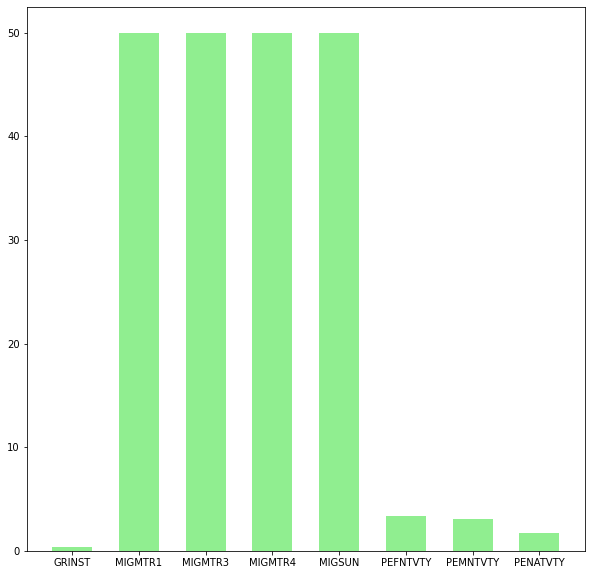

In [149]:
df_columns = list(df.columns)
df_columns
col_nan_vals = []
col_total_vals = []
col_nan_percent = {}


for val in df_columns:
  col_nan_vals.append(df[val].isna().sum())
  col_total_vals.append(len(df[val]))

for i in range(0,len(df_columns)):
  if(col_nan_vals[i] > 0):
    tmpPercent = (col_nan_vals[i]/col_total_vals[i])*100
    col_nan_percent[df_columns[i]] = tmpPercent
fig = plt.figure(figsize = (10, 10))
plt.bar(list(col_nan_percent.keys()),list(col_nan_percent.values()),width=0.6,color = 'lightgreen')

In [150]:
cols_to_remove = []
cols_missing_dict = dict(df.isnull().sum())

for key in cols_missing_dict.keys():
  if(cols_missing_dict[key] >= ((40/100)*len(df))):
    cols_to_remove.append(key)

df = df.drop(cols_to_remove,axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ee4e3c950>,
      dtype=object)

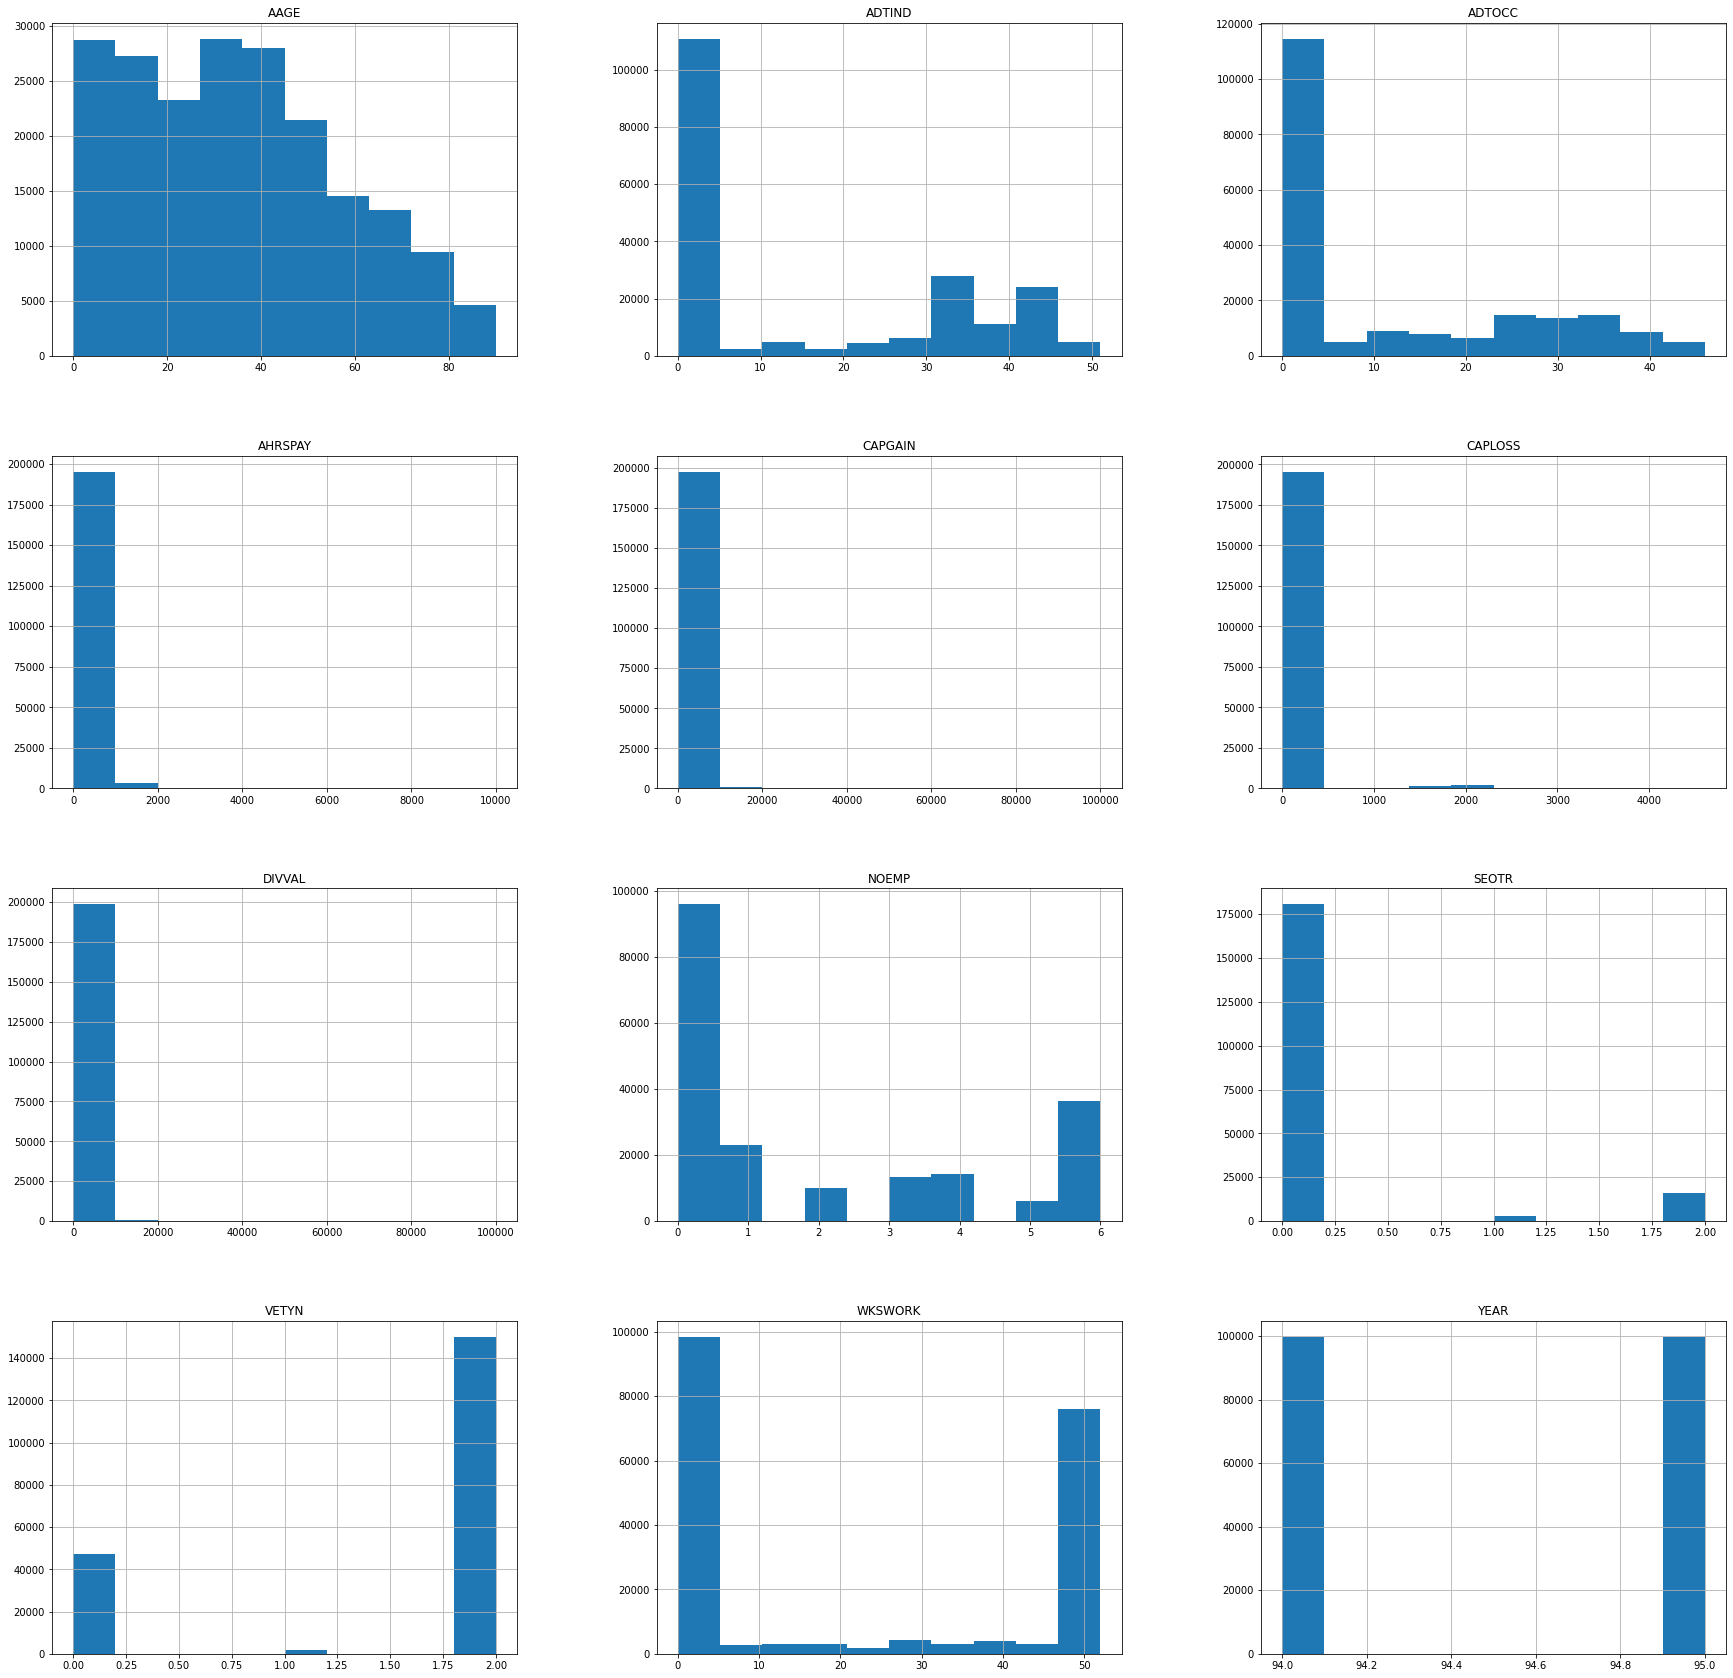

In [151]:
fig = plt.figure(figsize=(30,30))
df.hist(ax=fig.gca())

['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

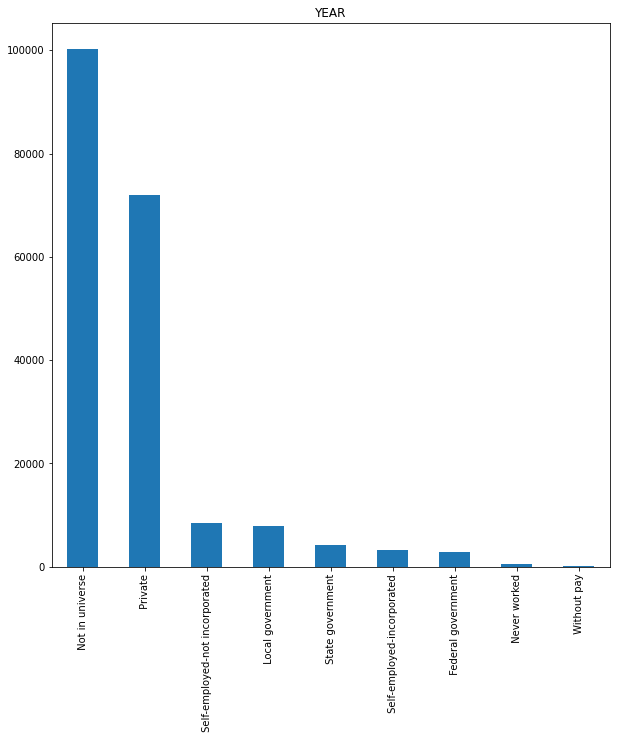

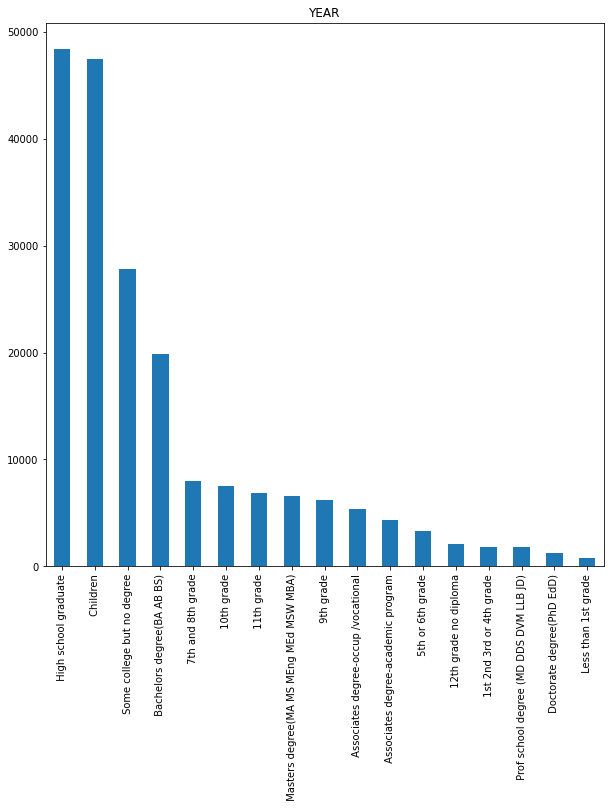

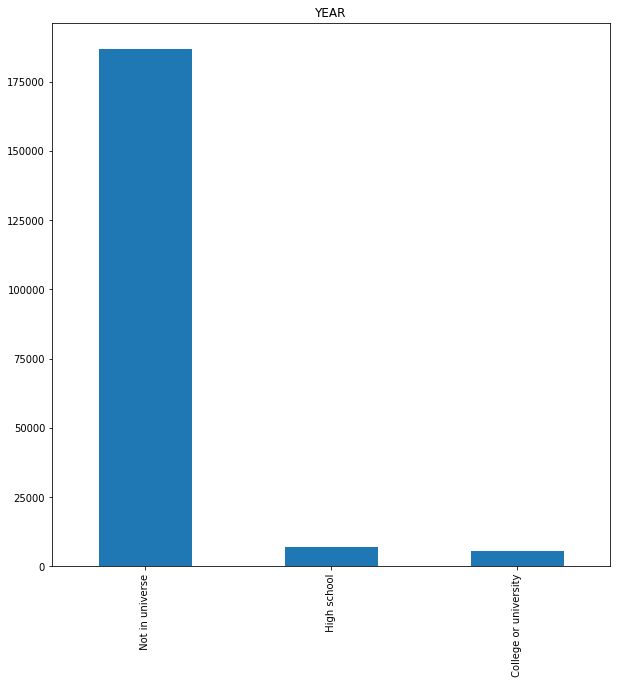

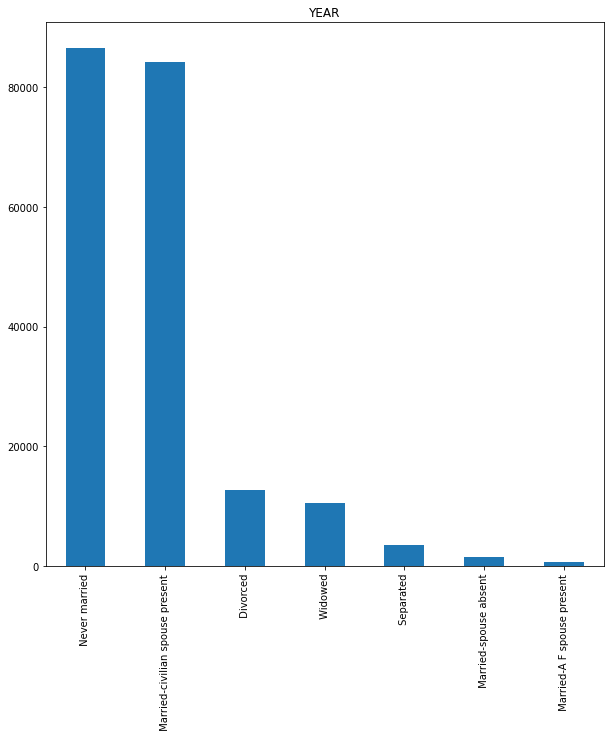

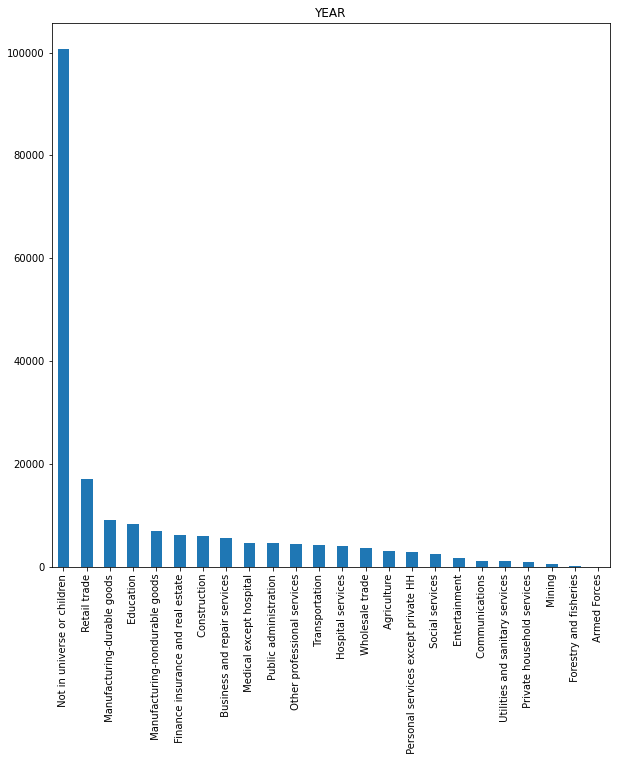

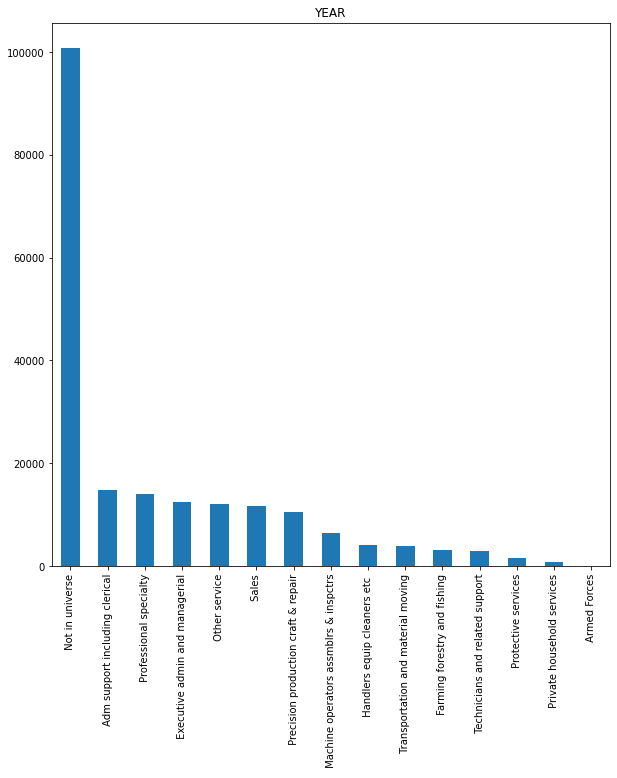

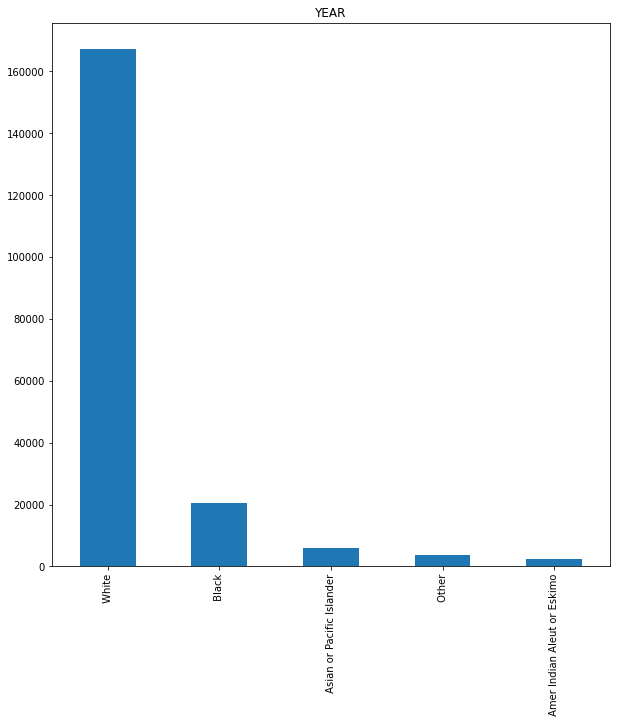

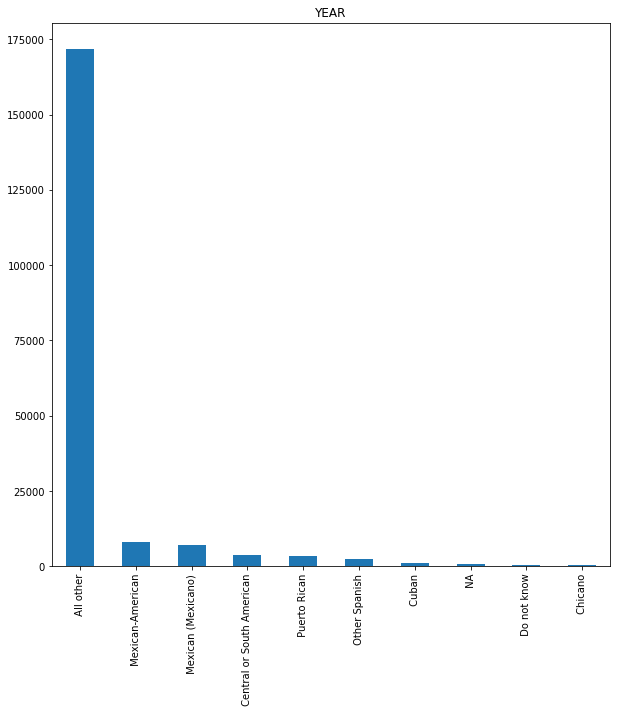

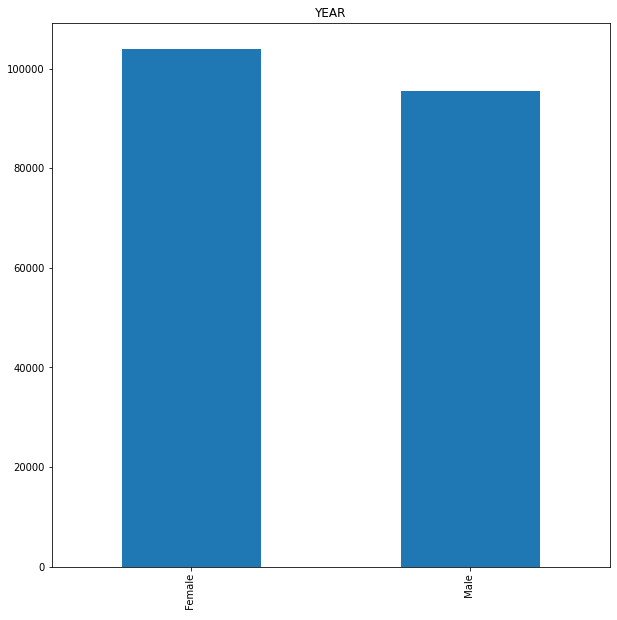

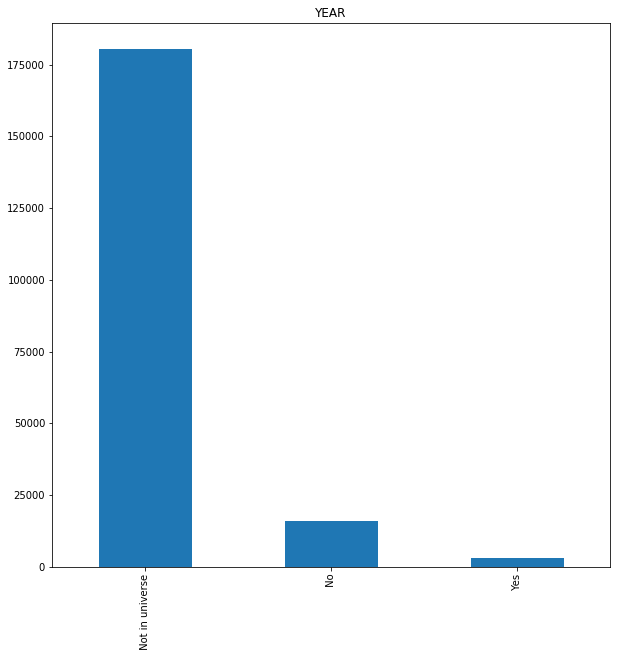

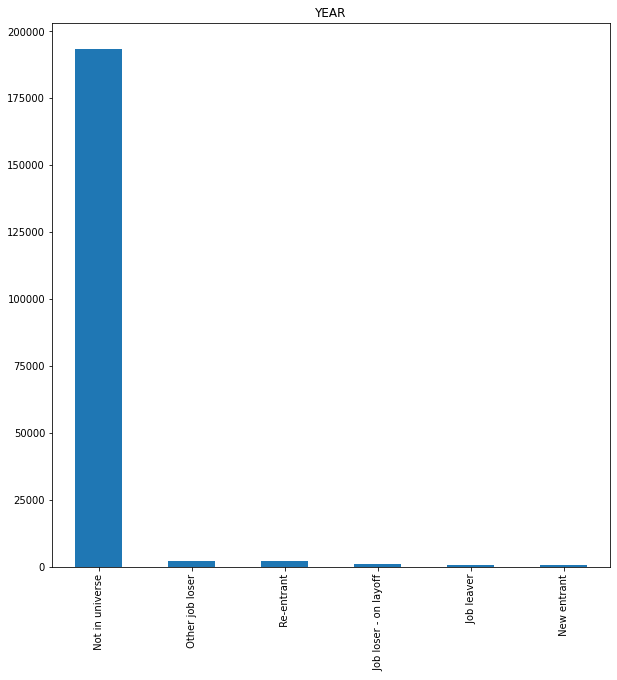

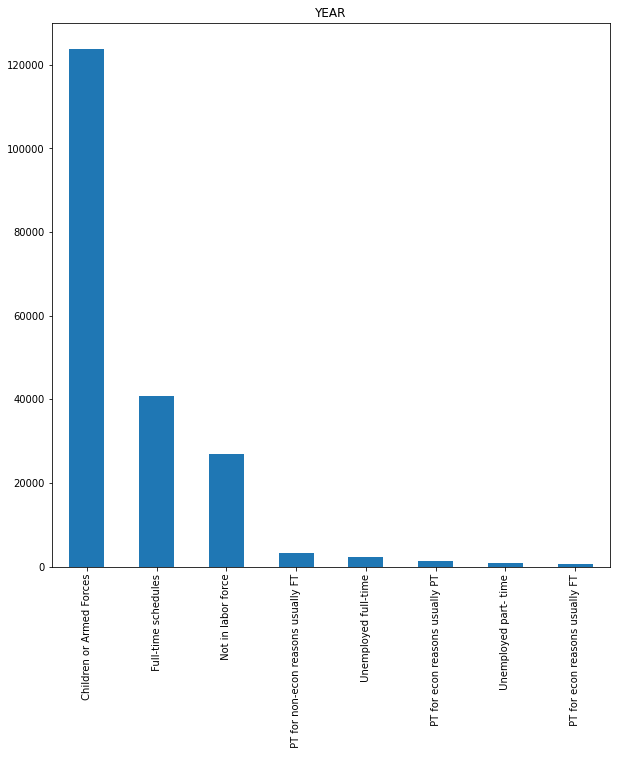

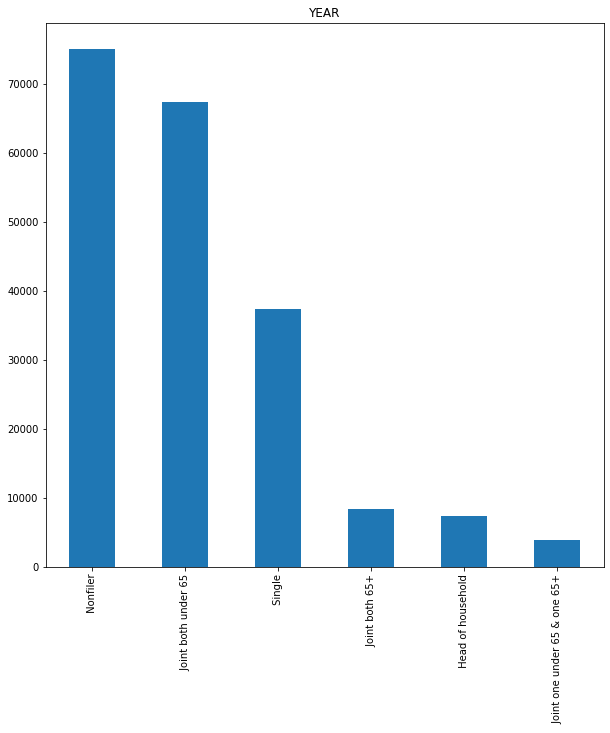

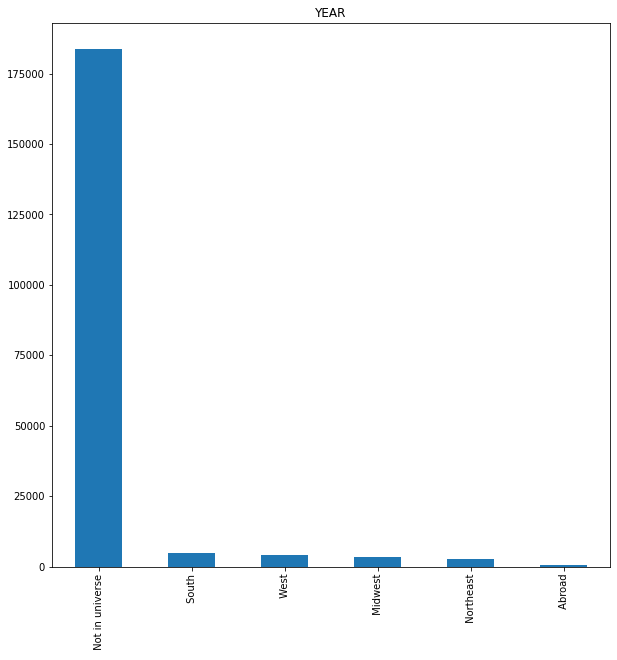

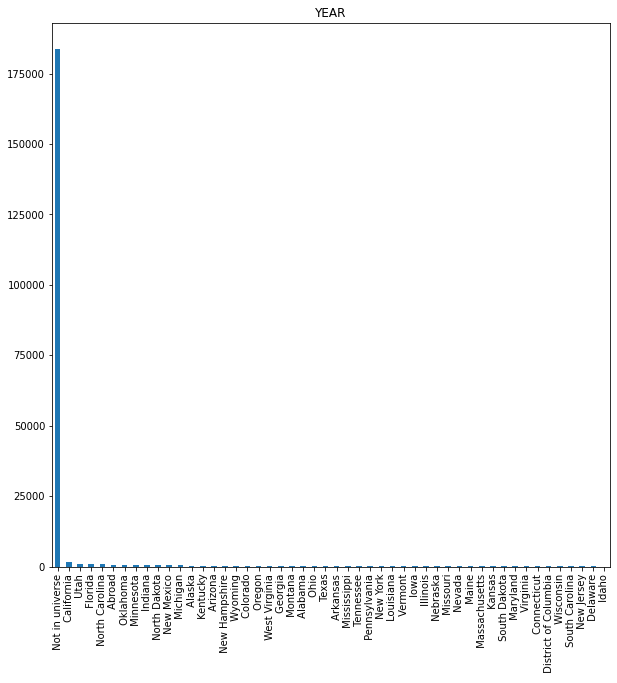

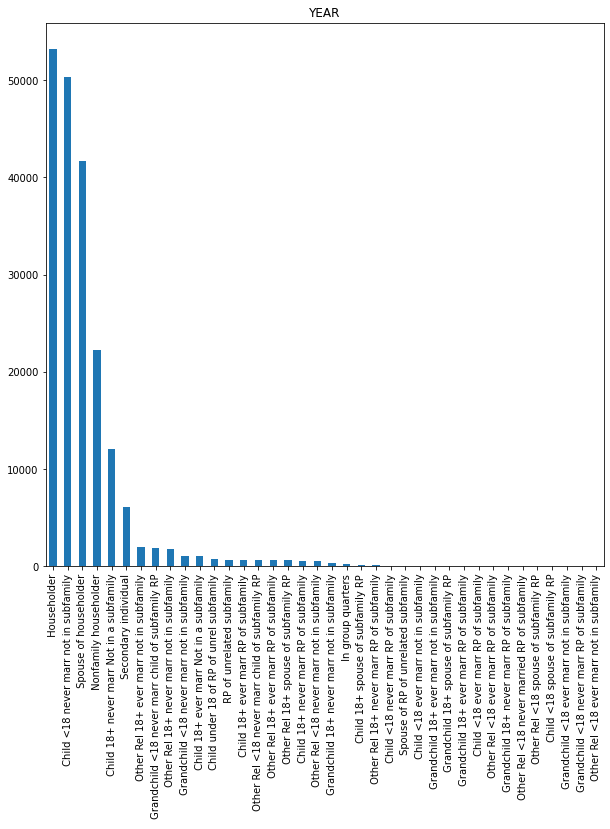

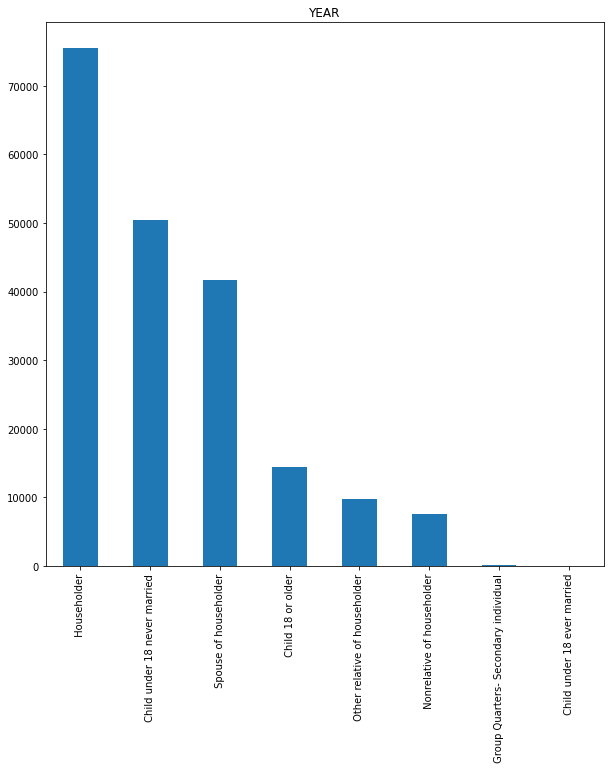

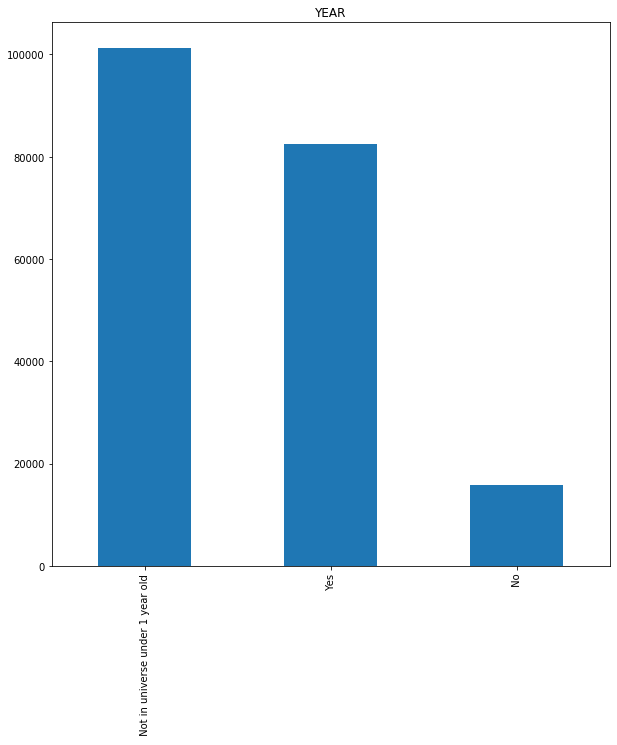

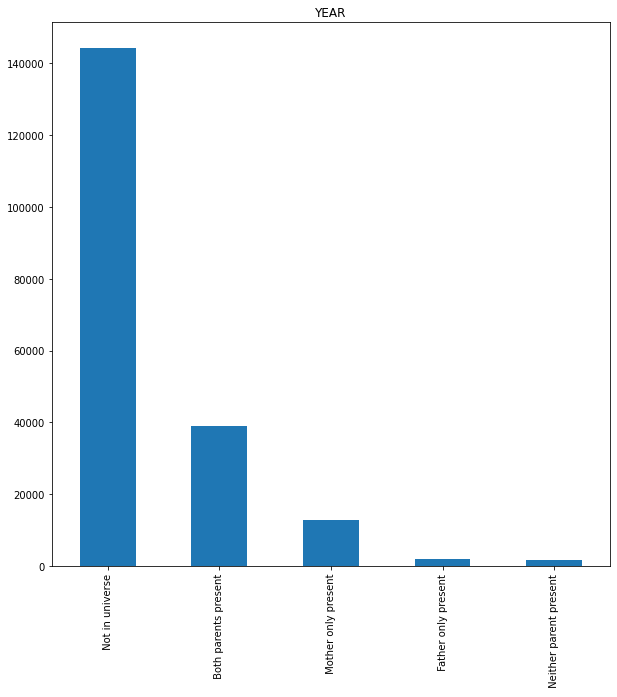

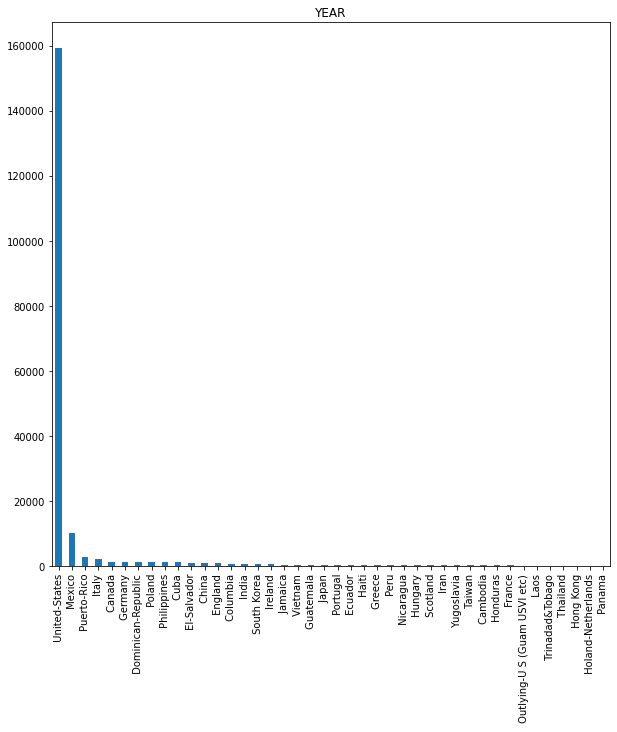

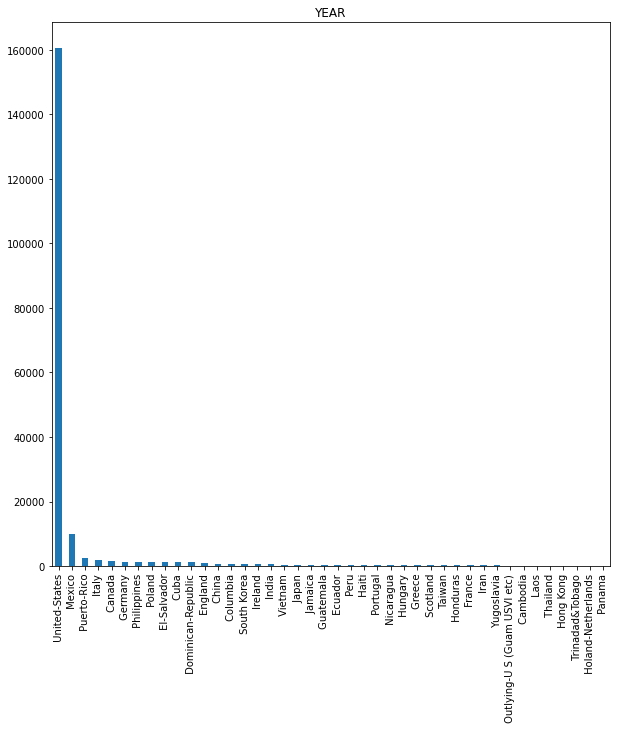

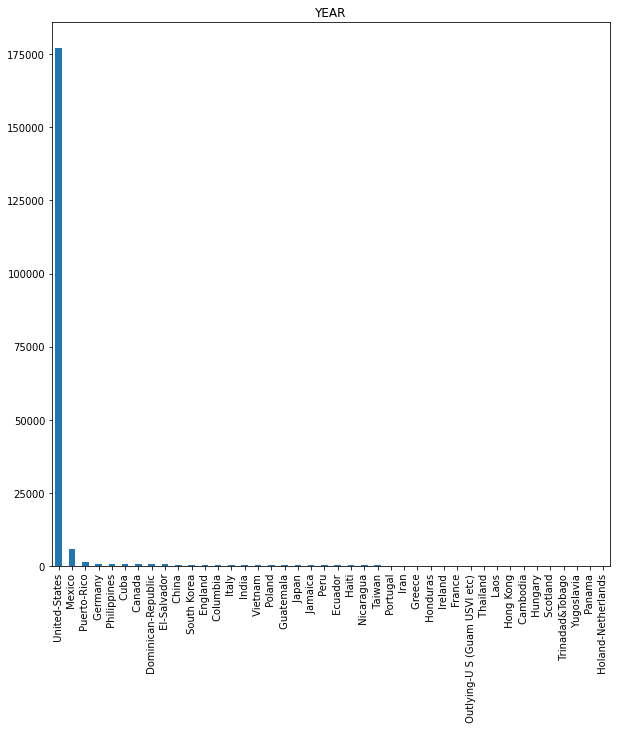

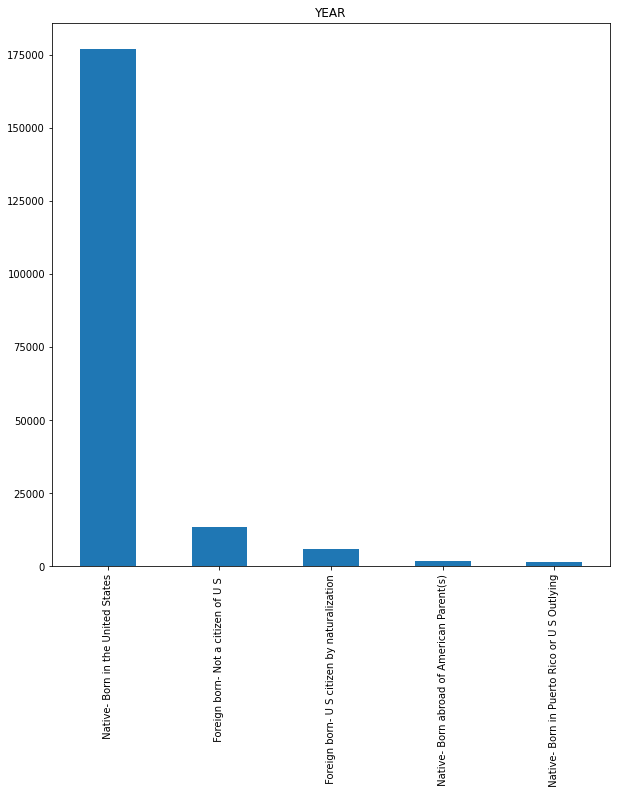

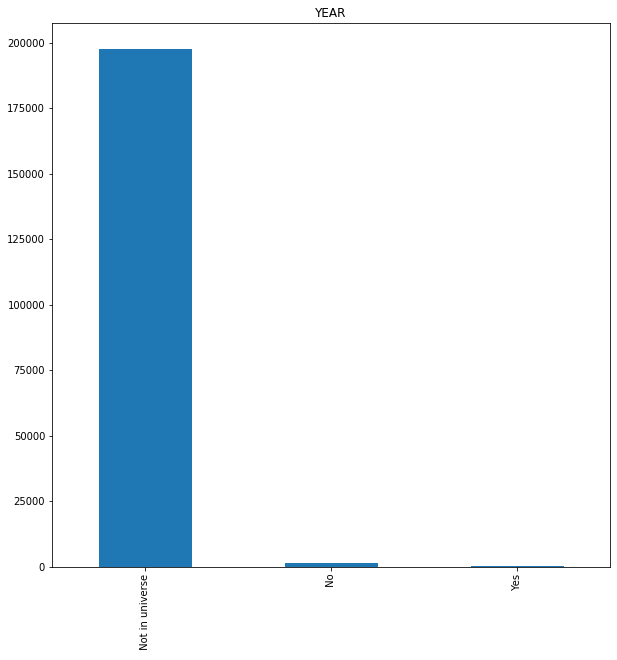

In [152]:
column_names = list(df)
categorical_data_cols = []
for i in range(len(column_names)):
  if type(df.iat[0,i]) == type("abcd"):
    categorical_data_cols.append(column_names[i])

print(categorical_data_cols)

for val in categorical_data_cols:
  fig = plt.figure(figsize=(10,10))
  df[val].value_counts().plot(kind = 'bar',title = column_names[i])

In [153]:
numerical_data_cols =[]
for val in list(df.columns):
  if(type(df.iloc[0][val]) == type(np.int64(0))):
    numerical_data_cols.append(val)

for val in numerical_data_cols:
  tmp_name = val + "_GROUP"
  df[tmp_name] = pd.cut(df[val],10)

df.head()


AAGE                          ACLSWKR  ...  WKSWORK_GROUP      YEAR_GROUP
0    73                  Not in universe  ...  (-0.052, 5.2]    (94.9, 95.0]
1    58   Self-employed-not incorporated  ...   (46.8, 52.0]  (93.999, 94.1]
2    18                  Not in universe  ...  (-0.052, 5.2]    (94.9, 95.0]
3     9                  Not in universe  ...  (-0.052, 5.2]  (93.999, 94.1]
4    10                  Not in universe  ...  (-0.052, 5.2]  (93.999, 94.1]

[5 rows x 48 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA', 'AAGE_GROUP', 'ADTIND_GROUP', 'ADTOCC_GROUP', 'AHRSPAY_GROUP', 'CAPGAIN_GROUP', 'CAPLOSS_GROUP', 'DIVVAL_GROUP', 'NOEMP_GROUP', 'SEOTR_GROUP', 'VETYN_GROUP', 'WKSWORK_GROUP', 'YEAR_GROUP']


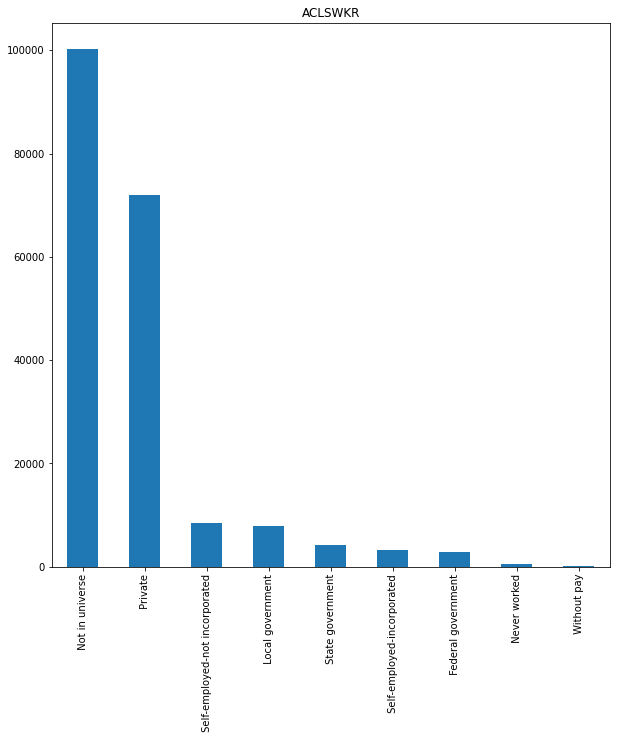

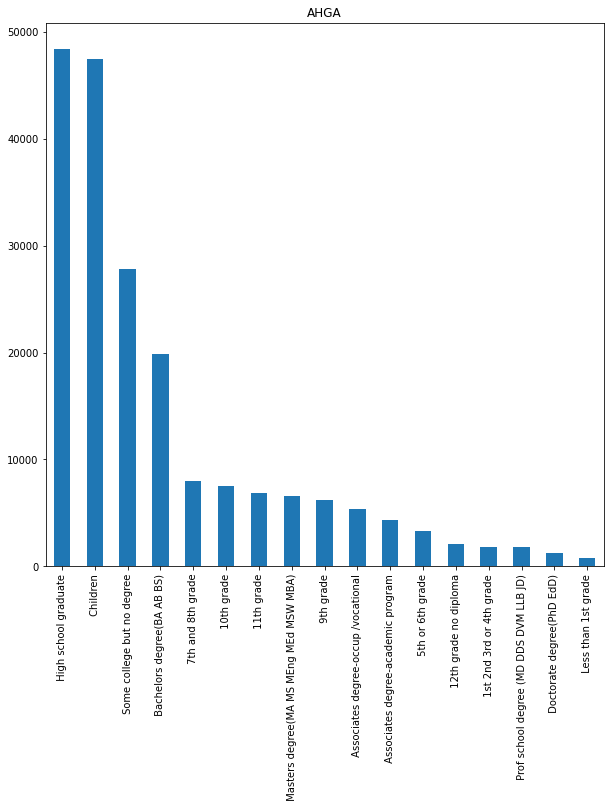

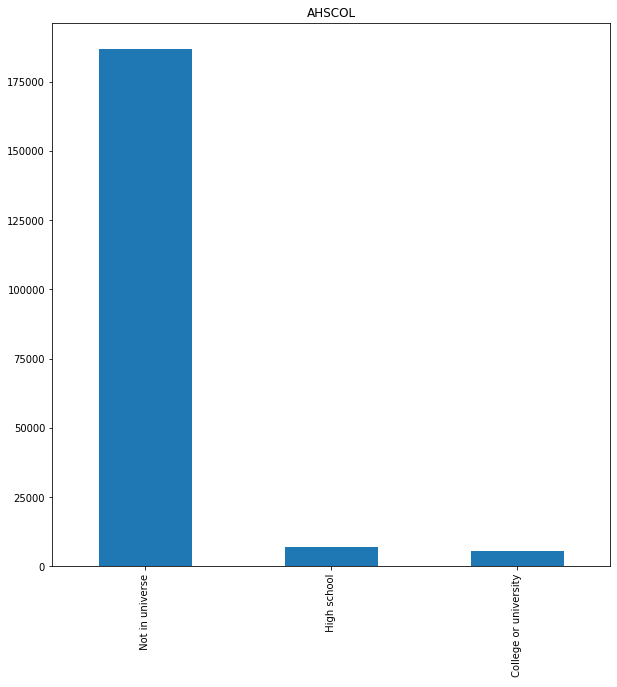

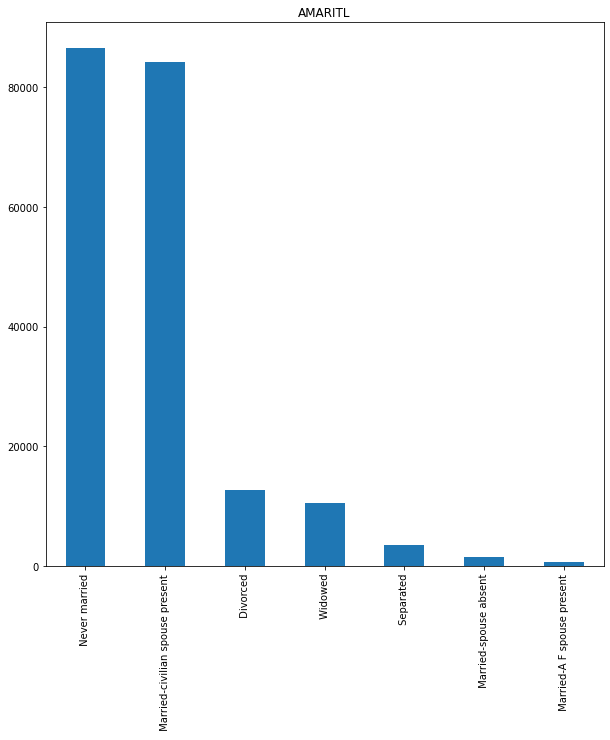

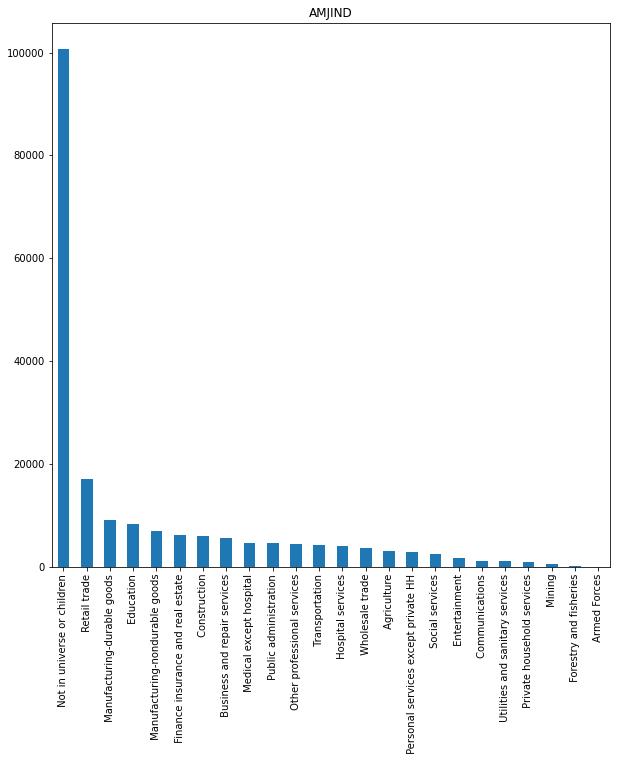

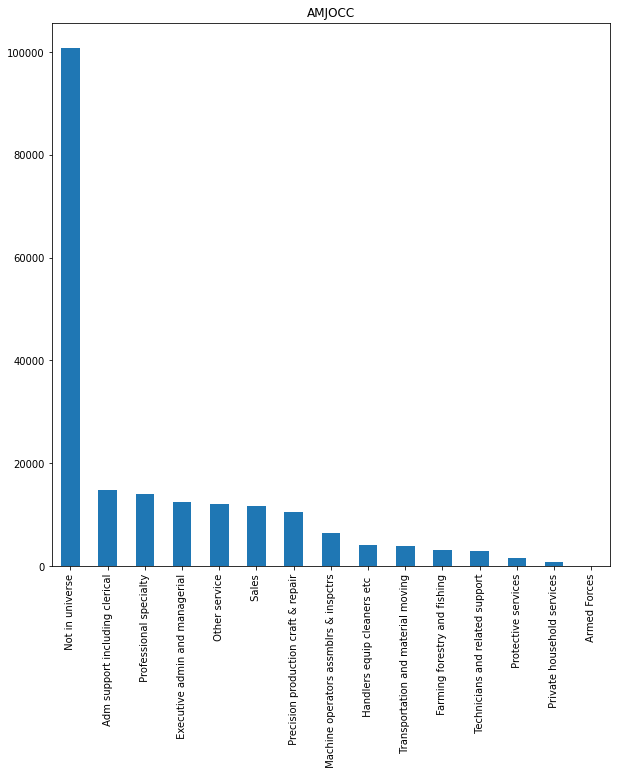

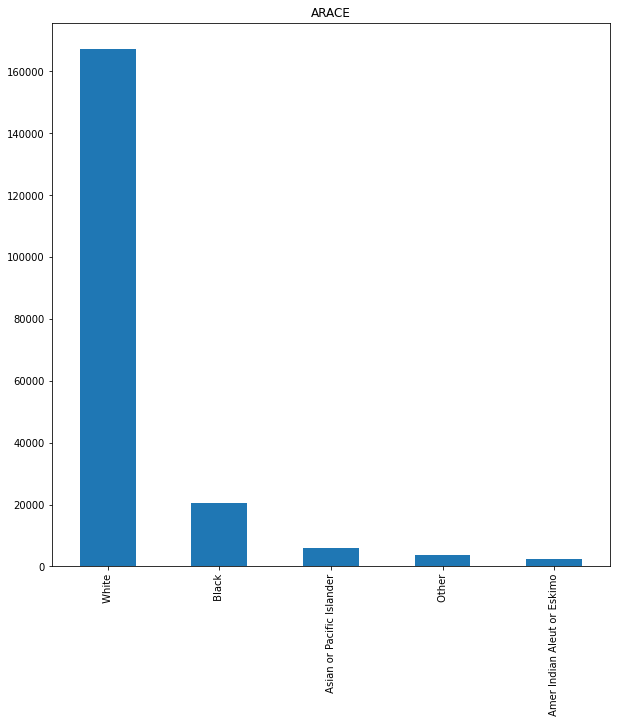

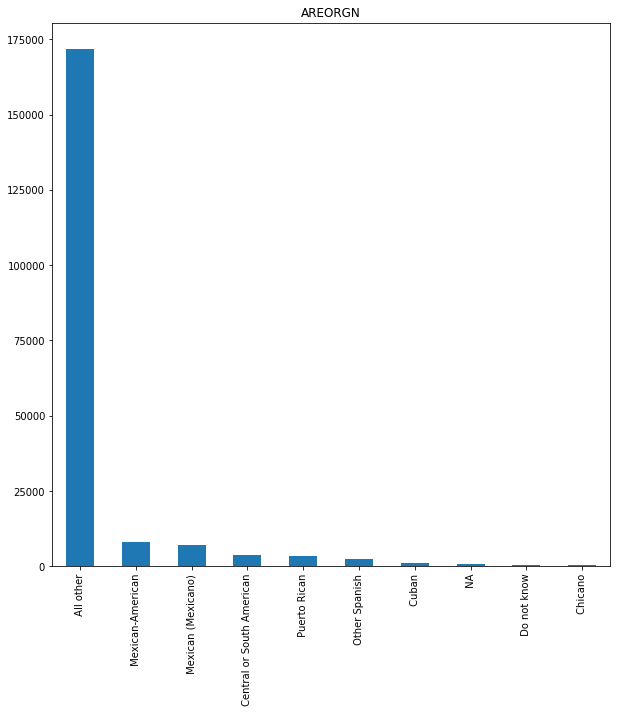

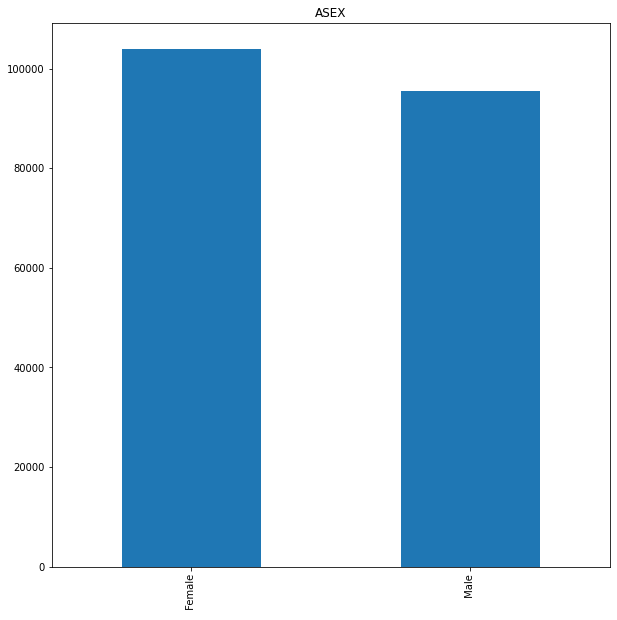

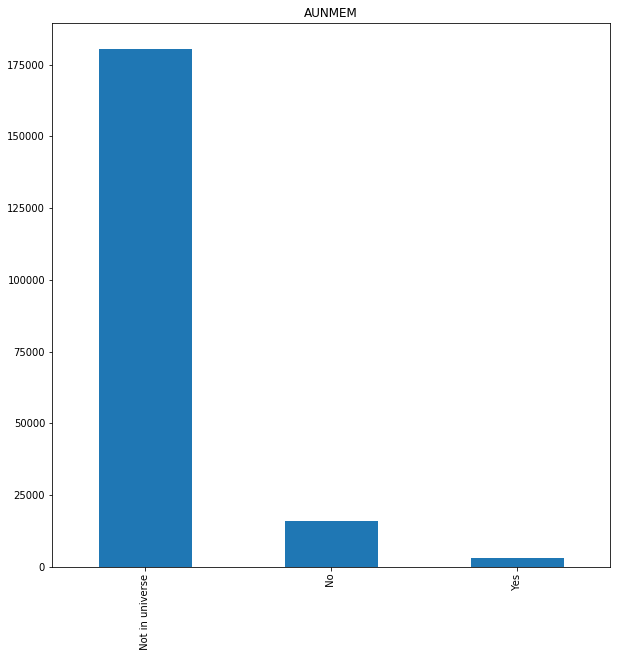

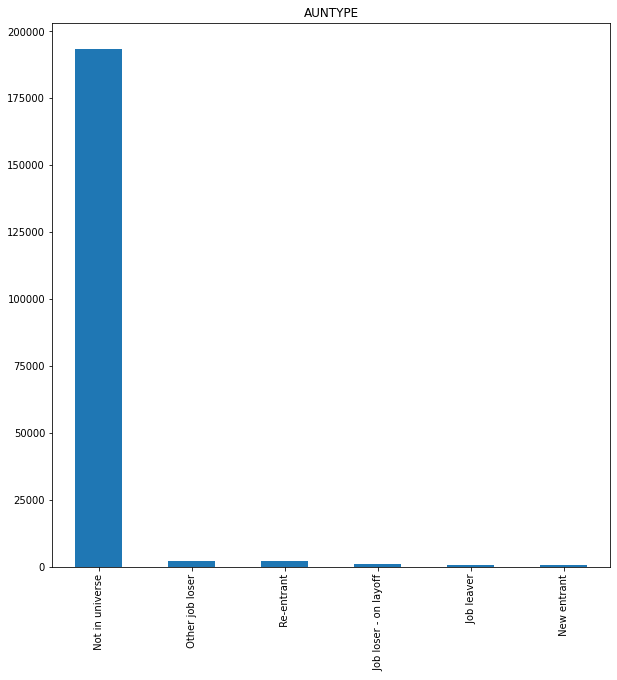

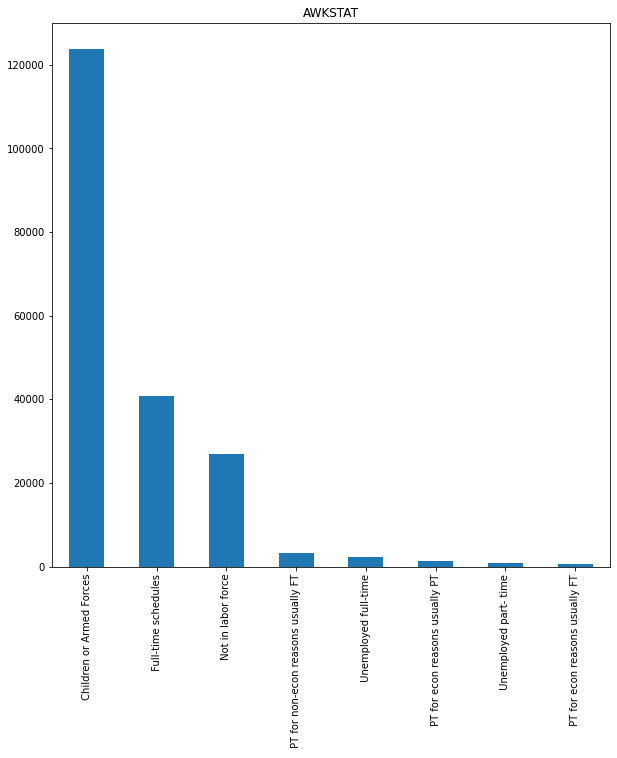

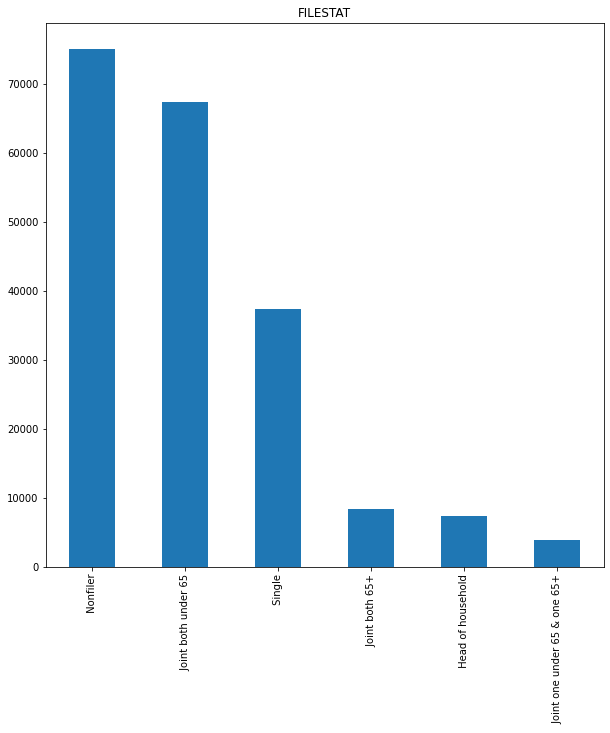

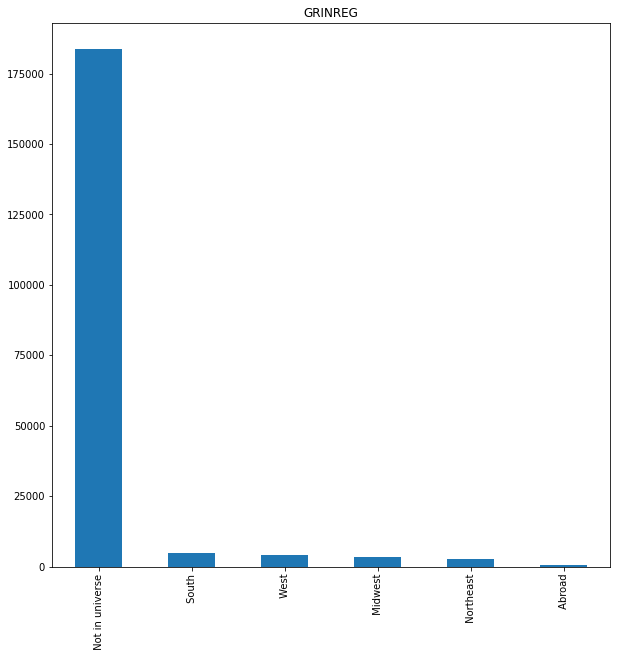

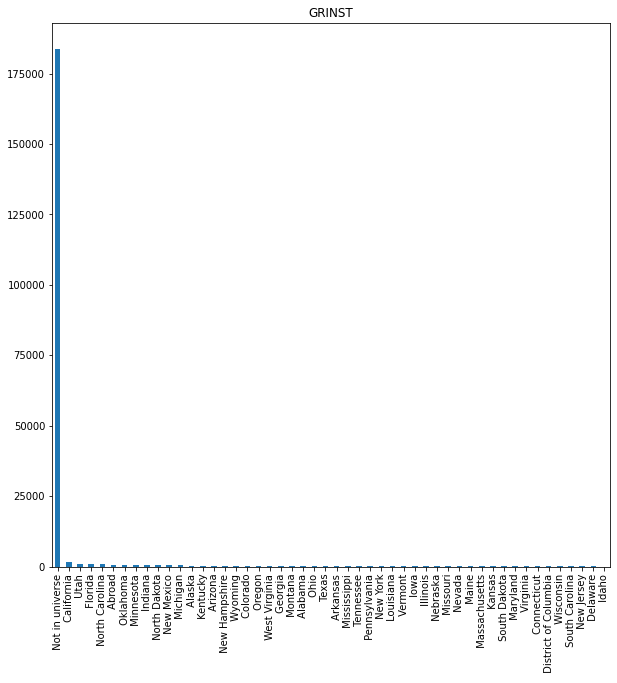

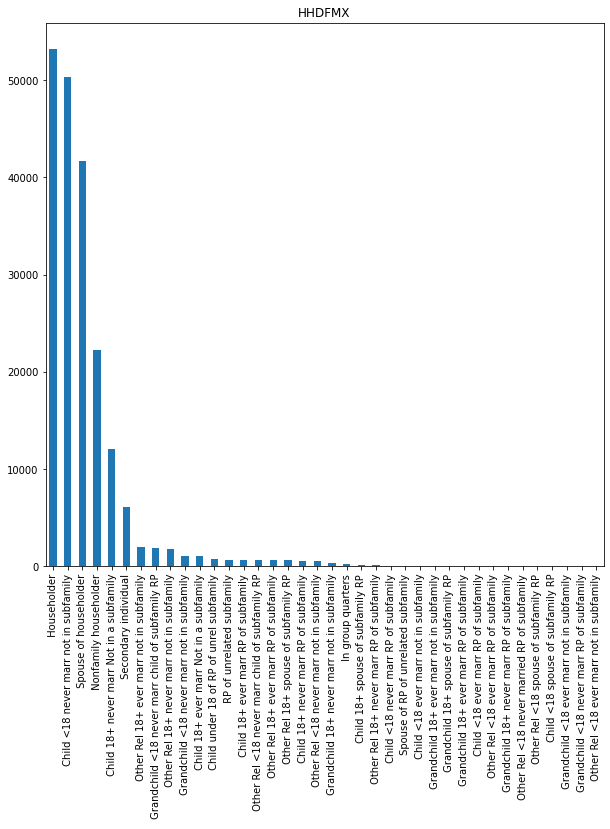

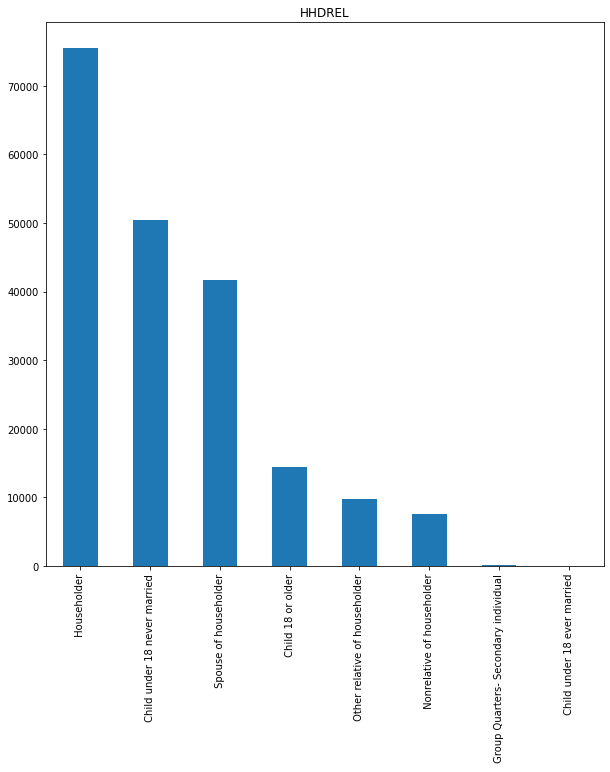

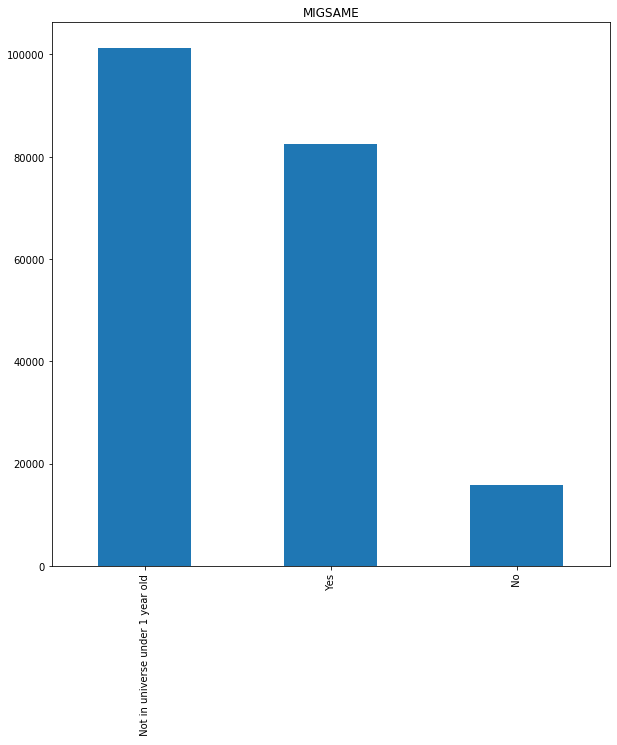

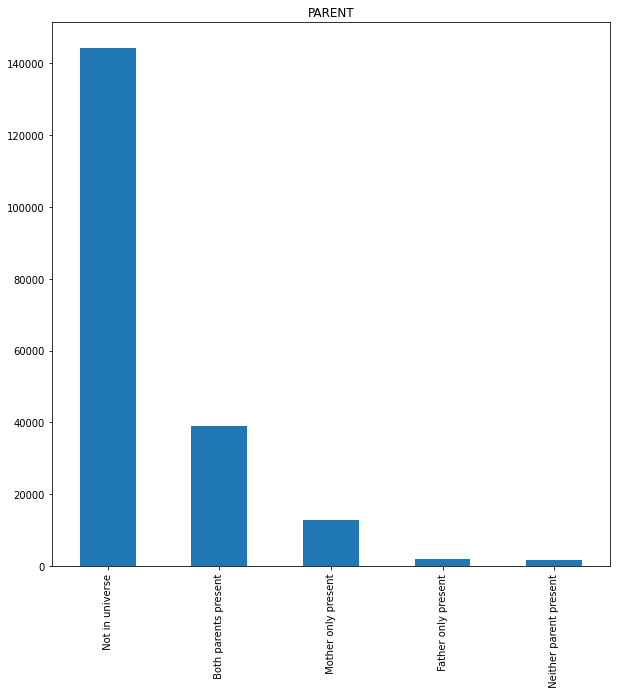

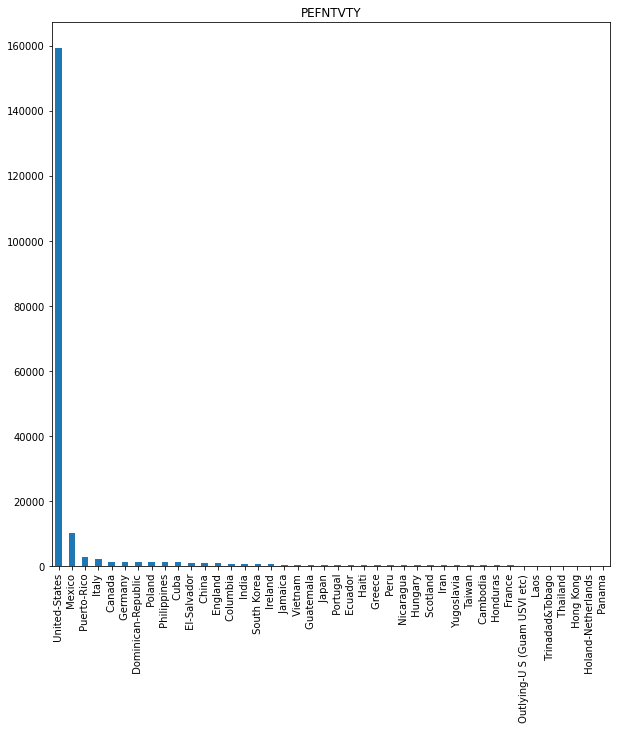

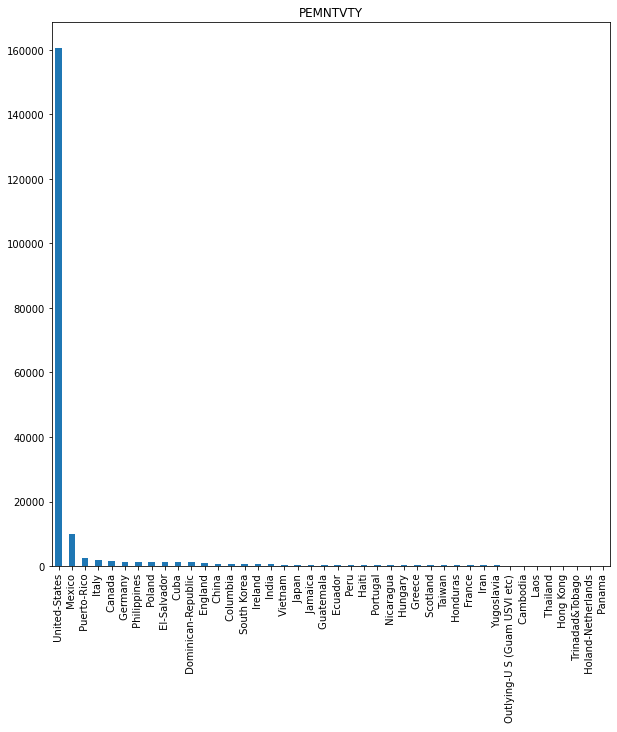

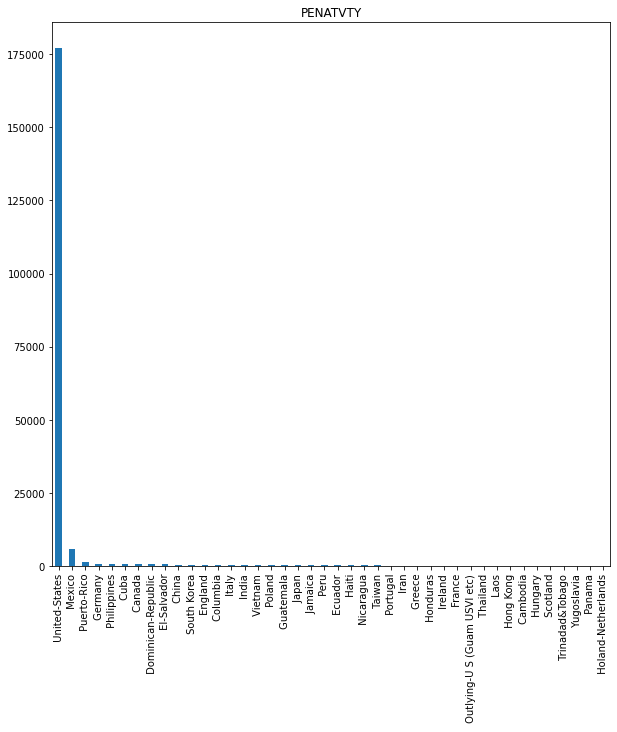

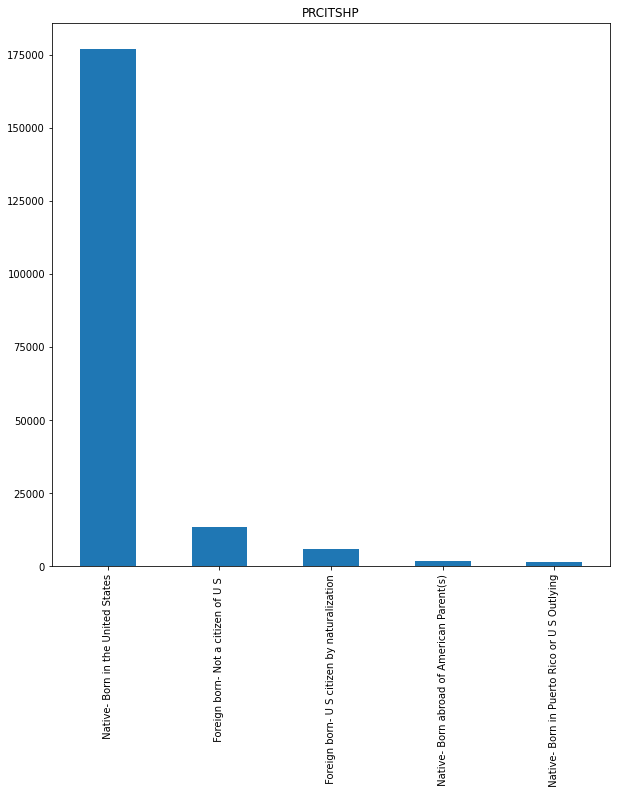

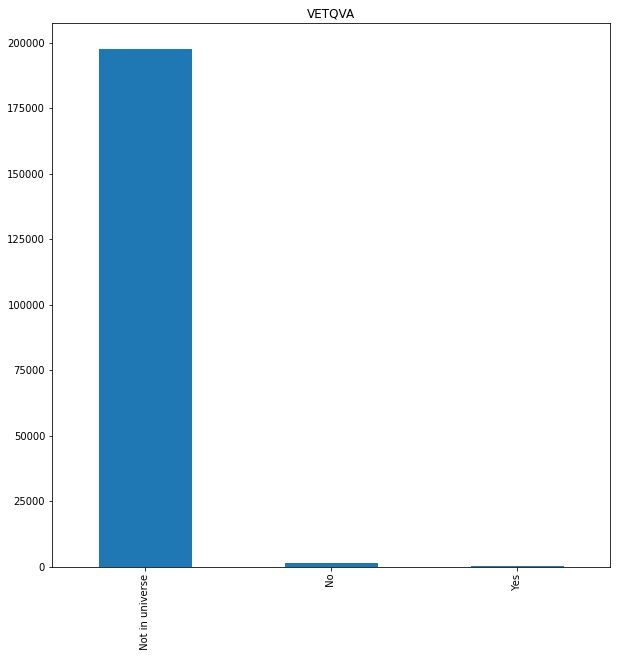

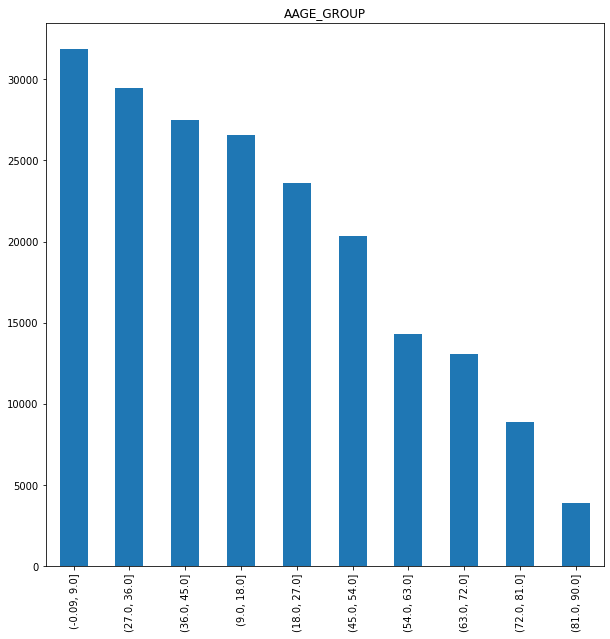

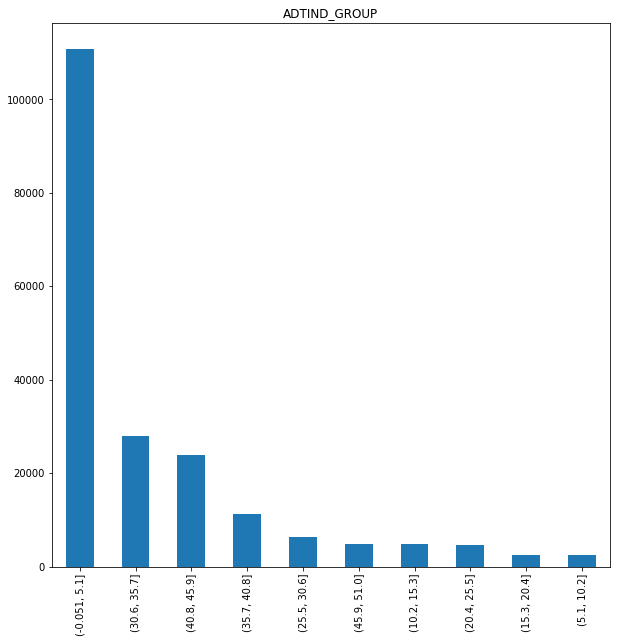

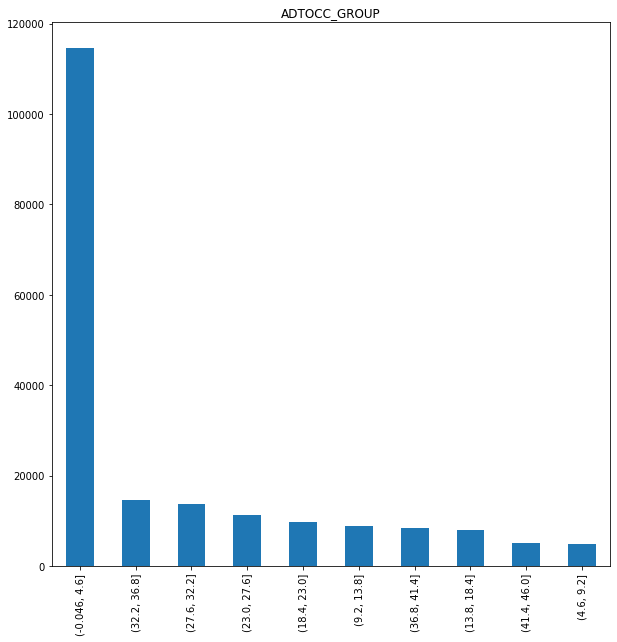

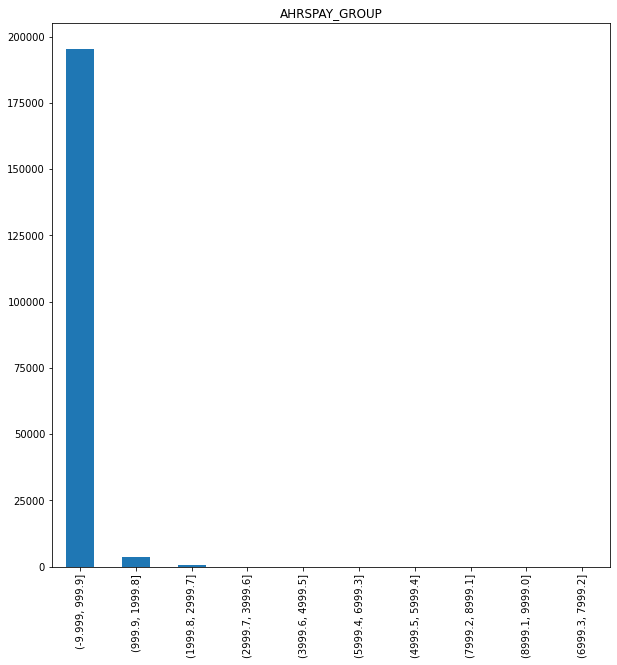

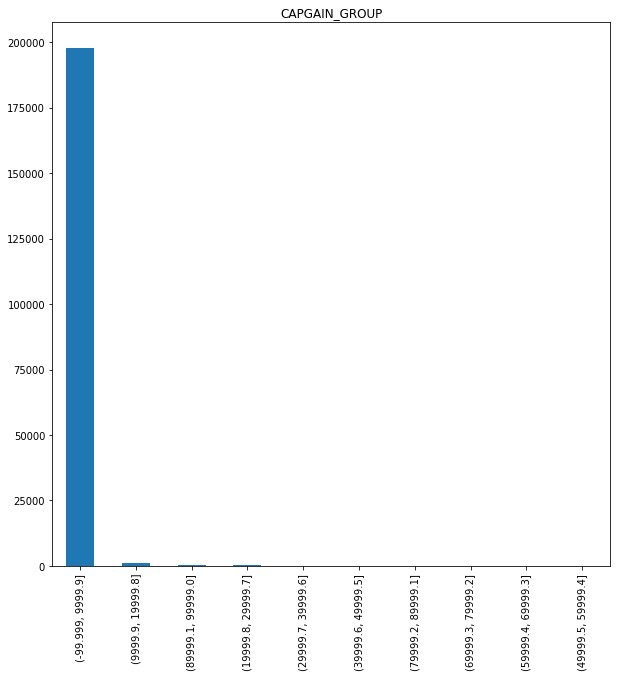

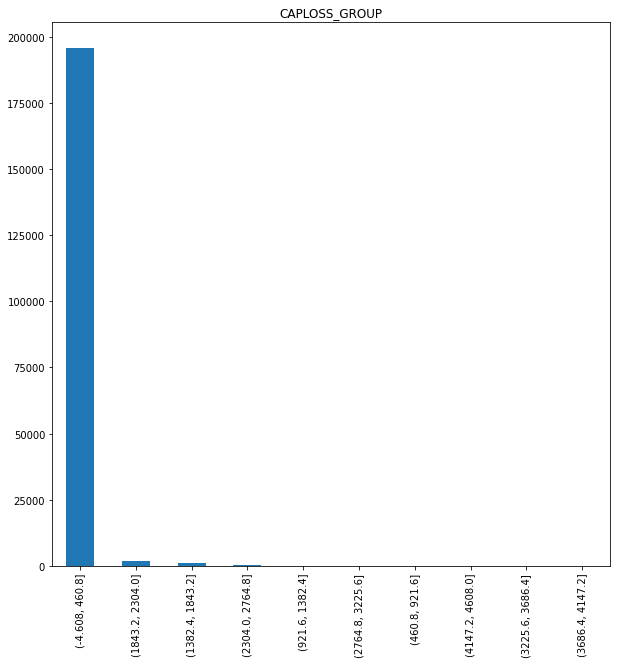

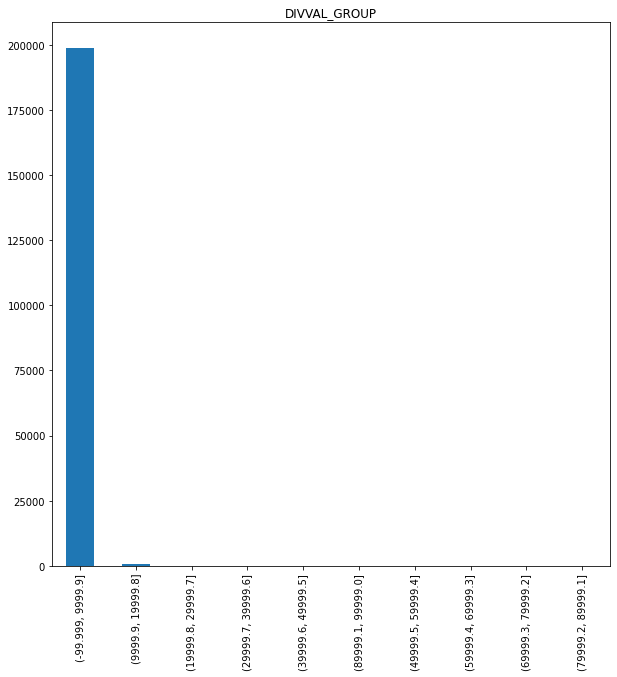

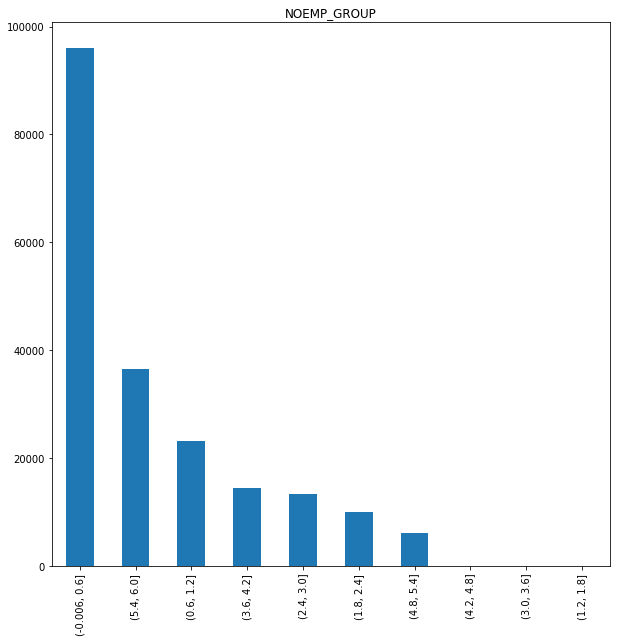

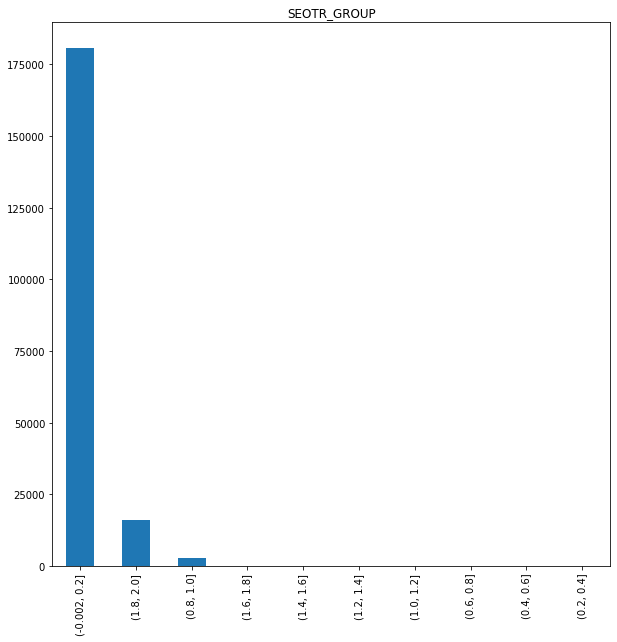

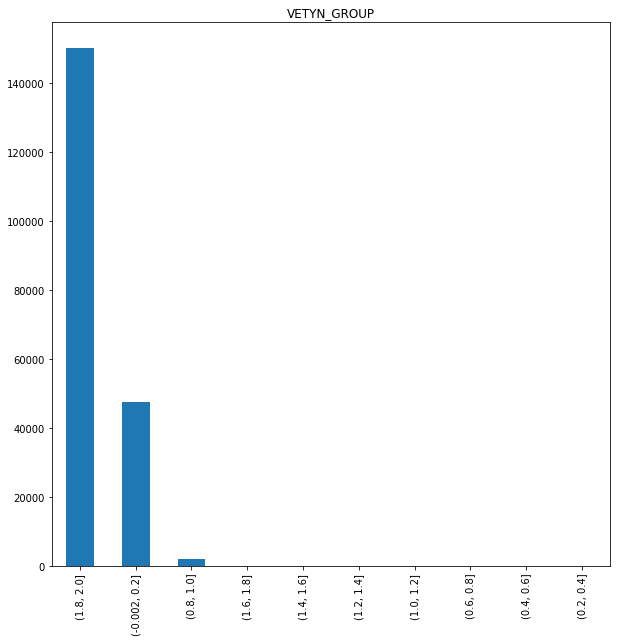

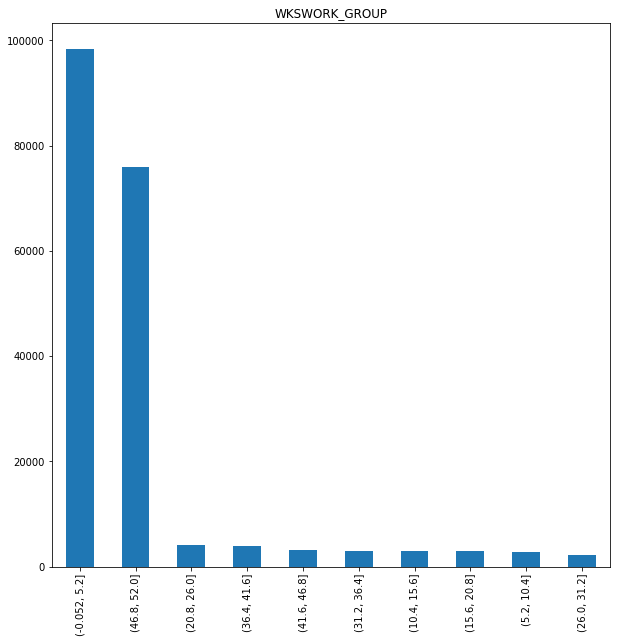

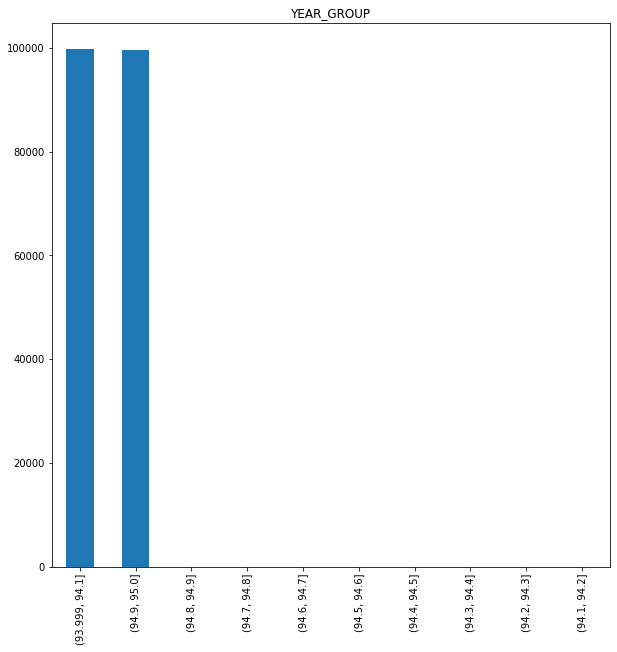

In [154]:
tmp_cols = []
for i in list(df):
  if type(df.iloc[0][i]) == type("abcd") or "_GROUP" in i:
    tmp_cols.append(i)

for val in tmp_cols:
  fig = plt.figure(figsize = (10,10))
  df[val].value_counts().plot(kind='bar', title = val)
print(tmp_cols)

In [155]:
columns_to_drop = ['AUNTYPE', 'GRINST', 'GRINREG','PENATVTY', 'PEFNTVTY','PEMNTVTY', 'VETQVA', 'AHSCOL', 'AHRSPAY_GROUP','AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'CAPGAIN_GROUP', 'CAPLOSS_GROUP', 'DIVVAL_GROUP', 'AAGE', 'ADTIND','ADTOCC', 'NOEMP', 'SEOTR','VETYN','WKSWORK','YEAR']
columns_to_keep = []
for val in list(df.columns):
  if val in columns_to_drop:
    continue
  else:
    columns_to_keep.append(val)

print(columns_to_keep)
df = df[columns_to_keep]

['ACLSWKR', 'AHGA', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT', 'PRCITSHP', 'AAGE_GROUP', 'ADTIND_GROUP', 'ADTOCC_GROUP', 'NOEMP_GROUP', 'SEOTR_GROUP', 'VETYN_GROUP', 'WKSWORK_GROUP', 'YEAR_GROUP']


In [156]:
for val in list(df.columns):
  df[val].fillna(df[val].mode()[0],inplace=True)

In [157]:
df = pd.get_dummies(df)
df.head()

ACLSWKR_ Federal government  ...  YEAR_GROUP_(94.9, 95.0]
0                            0  ...                        1
1                            0  ...                        0
2                            0  ...                        1
3                            0  ...                        0
4                            0  ...                        0

[5 rows x 245 columns]

In [158]:
pca_vals = []
for var in [0.99, 0.95, 0.9, 0.75, 0.5, 0.45, 0.4, 0.35, 0.25, 0.1]:
  pca = PCA(var)
  pca.fit(df)
  pca_vals.append(pca.n_components_)

In [159]:
pca = PCA(n_components=35)
finalDf = pca.fit(df).transform(df)
print(finalDf)

[[ 0.97241121  1.43663179 -1.36431692 ...  0.26034939  0.16068327
  -0.0803127 ]
 [-1.22443544 -0.90528769  0.31945045 ...  0.41817216  0.48316084
  -0.08413865]
 [ 1.23801385  1.42164541 -0.68228517 ... -0.44525796  0.16151861
  -0.46128486]
 ...
 [-0.55808933  0.70206706 -0.71349672 ... -0.36664716 -0.33374244
   0.16225122]
 [ 2.00084461  1.3568642  -0.0655084  ...  0.21822564 -0.04491313
  -0.05029173]
 [-1.60226281 -1.27997359  0.80062534 ... -0.32086374 -0.5146999
  -0.22827957]]


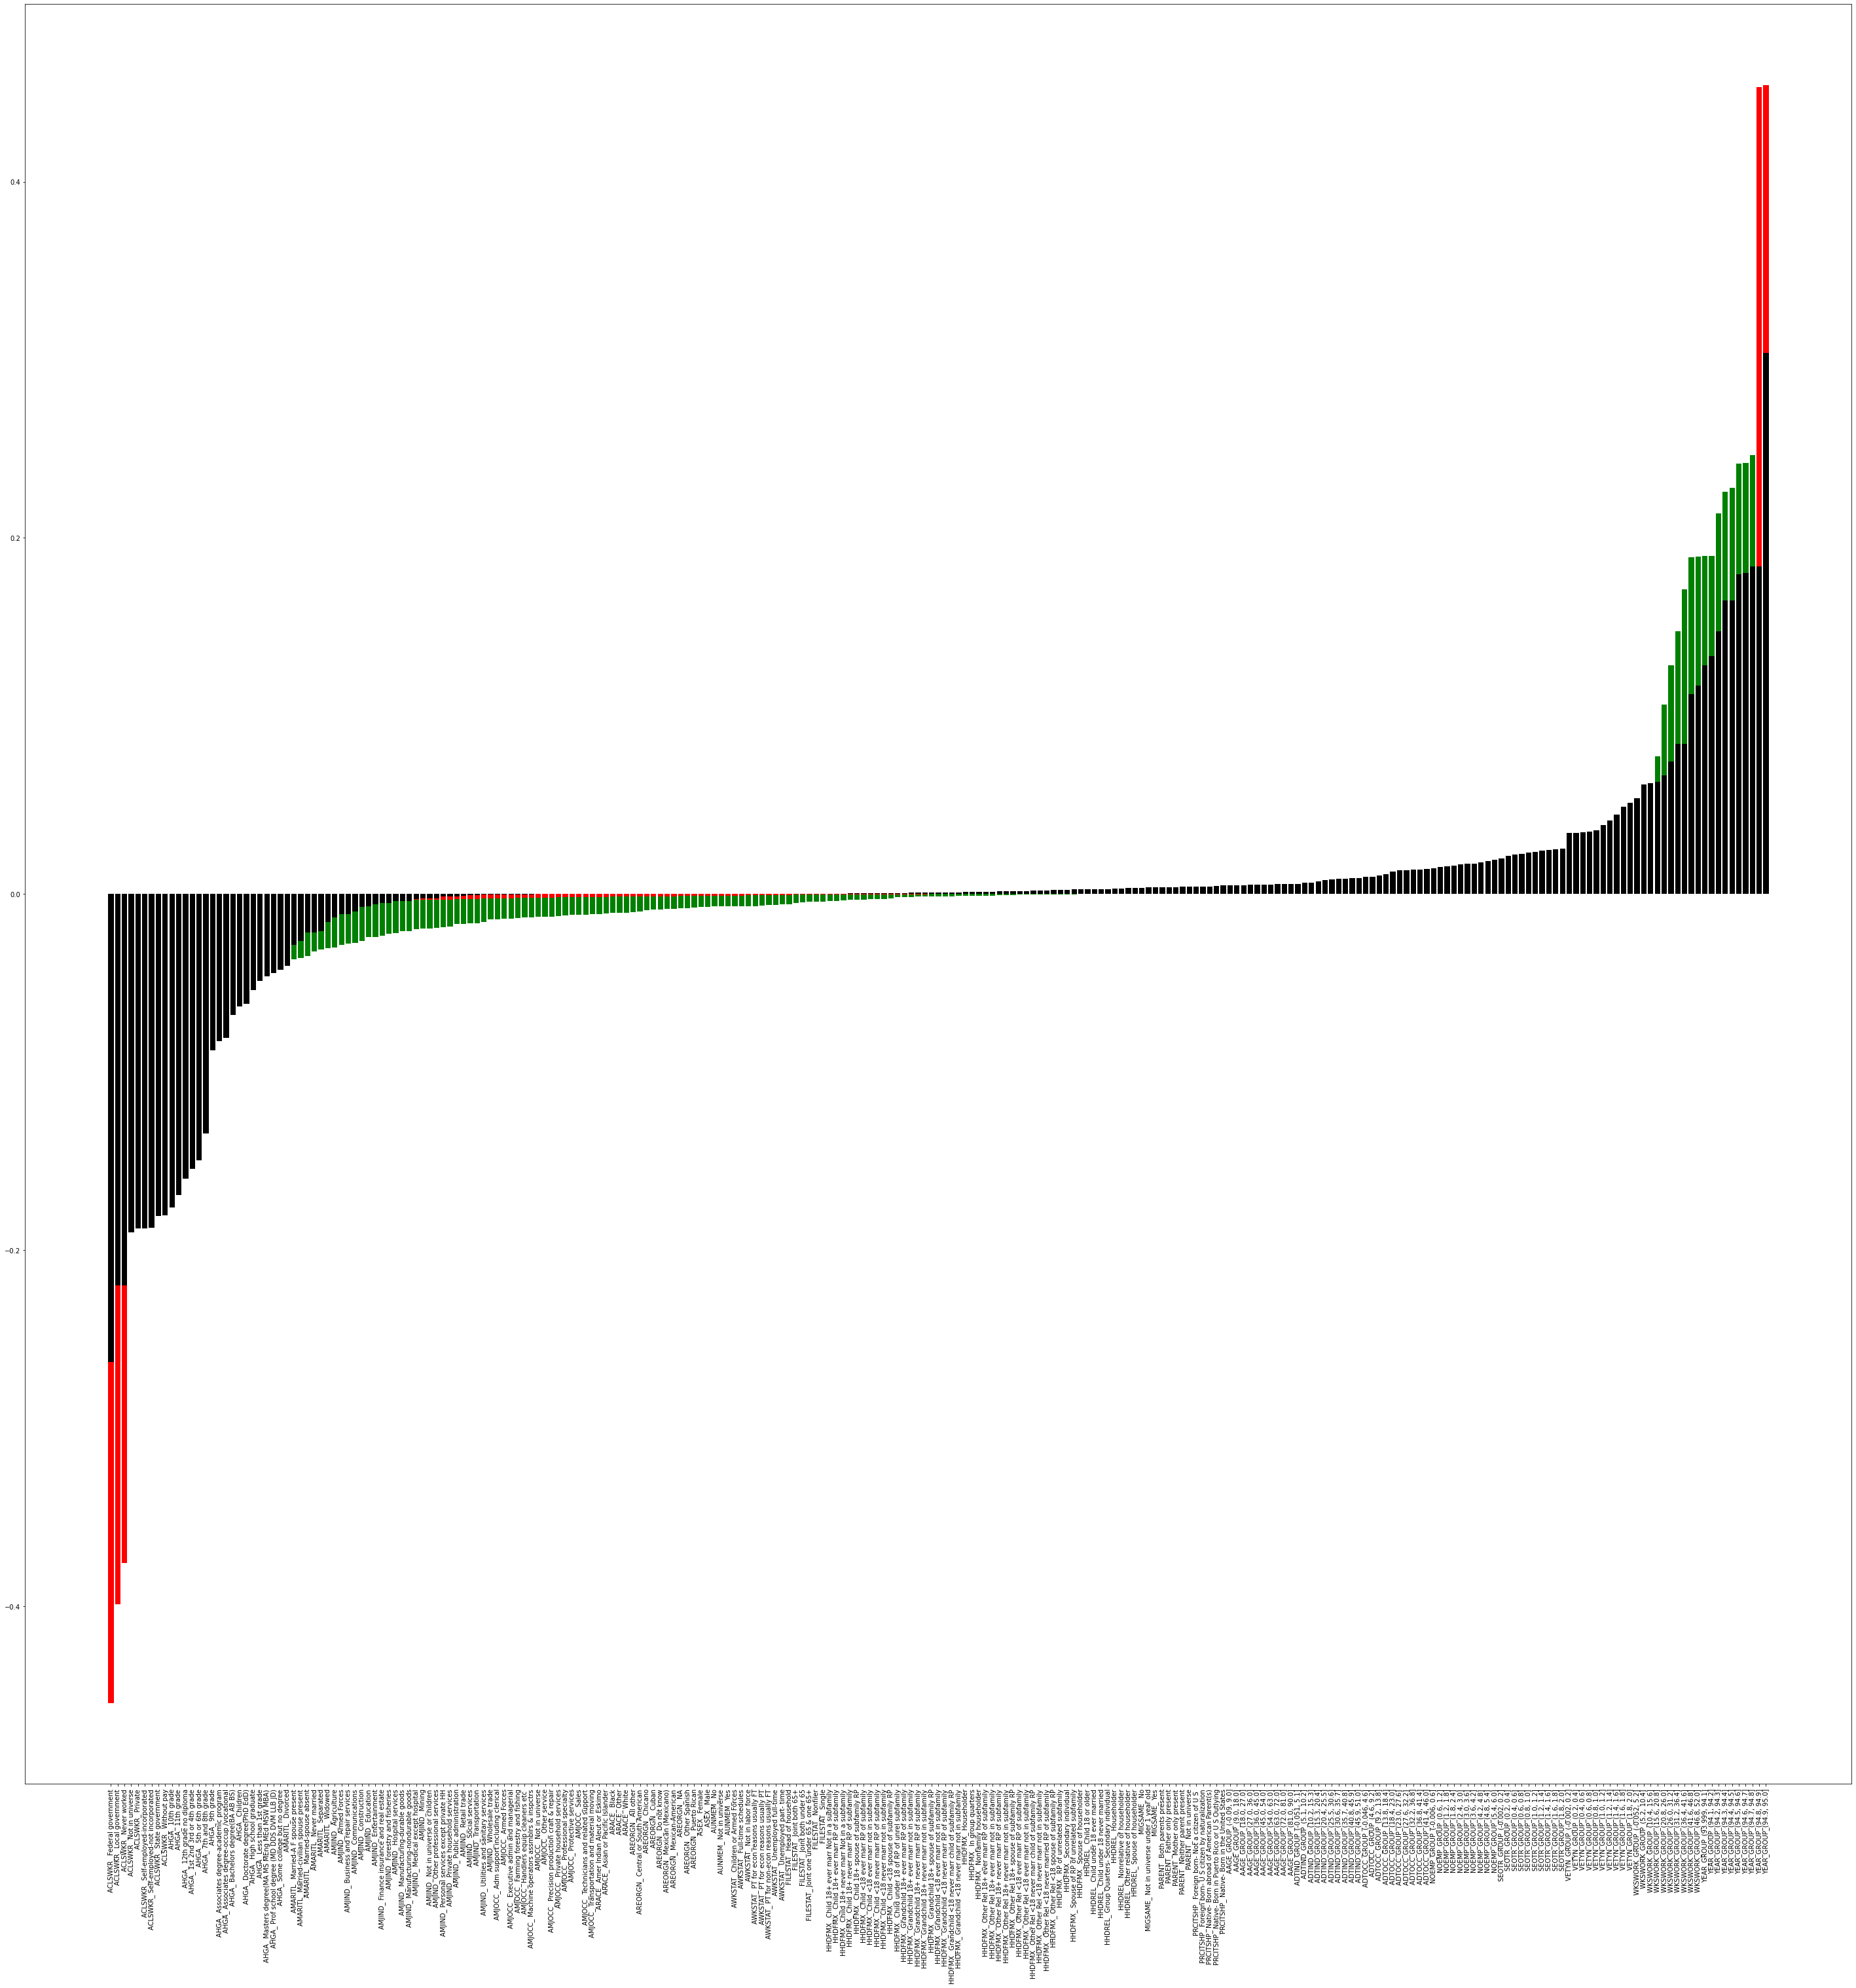

In [160]:
pca_components = pca.components_
for val in pca_components:
  val = val.sort()
figure = plt.figure(figsize = (50,50))
plt.bar(list(df.columns),pca_components[0],color = 'green')
plt.bar(list(df.columns),pca_components[1], color = 'red')
plt.bar(list(df.columns),pca_components[2], color = 'black')
plt.xticks(rotation = 'vertical')
plt.show()

In [161]:
avg_dist = []
num_clusters = [n for n in range(10,25)]
for k in range(10,25):
  print(k)
  k_med = kmedians(finalDf, (finalDf[random.sample(range(0,finalDf.shape[0]),k)]))
  k_med.process()
  avg_dist.append(k_med.get_total_wce()/k)


10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


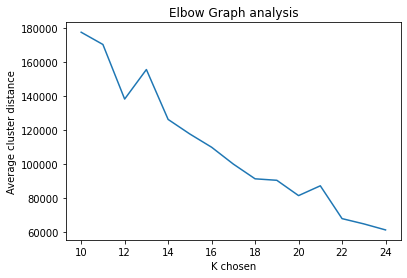

In [162]:
plt.plot(num_clusters, avg_dist)
plt.xlabel('K chosen')
plt.ylabel('Average cluster distance')
plt.title('Elbow Graph analysis')
plt.show()

In [163]:
rand_index = random.sample(range(0,finalDf.shape[0]),18)
initial_medians = finalDf[rand_index]
k_med_instance = kmedians(finalDf, initial_medians)
k_med_instance.process()

(199523, 2)


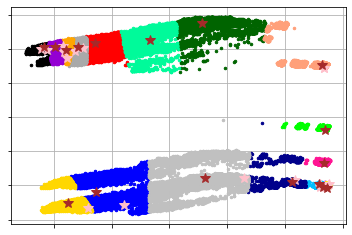

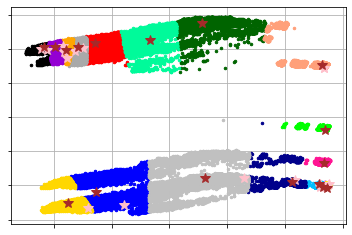

In [164]:
from pyclustering.cluster import cluster_visualizer_multidim

pca = PCA(n_components = 2)
pca.fit(finalDf)
temp_dataset = pca.transform(finalDf)
print(temp_dataset.shape)

random_index = random.sample(range(0,temp_dataset.shape[0]),18)
initial_medians = temp_dataset[random_index]
temp_k_median = kmedians(temp_dataset, initial_medians)
temp_k_median.process()

clusters = temp_k_median.get_clusters()
medians = temp_k_median.get_medians()
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, temp_dataset)
visualizer.append_cluster(initial_medians, marker='*', markersize=10)
visualizer.append_cluster(medians, marker='*', markersize=10)
visualizer.show()

In [193]:
pca = PCA(0.75)
finalDfTmp = pca.fit(df).transform(df)
tmpCluster = kmedians(finalDfTmp, (finalDfTmp[random.sample(range(0,finalDfTmp.shape[0]),16)]))
tmpCluster.process()
print(len(tmpCluster.get_clusters()))

16


In [166]:
clusterLst = tmpCluster.get_clusters()
clusterLens = []
totalLength = 0
for val in clusterLst:
  clusterLens.append(len(val))
  totalLength += len(val)

i = 1
totalPerc = 0
clusterPercent = []
for val in clusterLens:
  print("CLUSTER-"+str(i)+": "+str((val/totalLength)*100)+"%")
  clusterPercent.append((val/totalLength)*100)
  totalPerc +=  ((val/totalLength)*100)
  i += 1

print("TOTAL %: "+str(totalPerc)+"%")

CLUSTER-1: 8.056715265909194%
CLUSTER-2: 4.689183703131969%
CLUSTER-3: 4.239110278013062%
CLUSTER-4: 4.891666624900388%
CLUSTER-5: 3.797557173859655%
CLUSTER-6: 6.364178565879623%
CLUSTER-7: 5.858973652160403%
CLUSTER-8: 7.025756429083365%
CLUSTER-9: 4.626534284267978%
CLUSTER-10: 4.294241766613373%
CLUSTER-11: 9.787844007958983%
CLUSTER-12: 13.84902993639831%
CLUSTER-13: 5.007442750961042%
CLUSTER-14: 8.149937601178811%
CLUSTER-15: 9.361827959683847%
TOTAL %: 100.0%


In [167]:
print("Maximum Value of percentage from all clusters is: "+str(max(clusterPercent))+"% "+" from cluster: "+str(clusterPercent.index(max(clusterPercent))+1))

Maximum Value of percentage from all clusters is: 13.84902993639831%  from cluster: 12


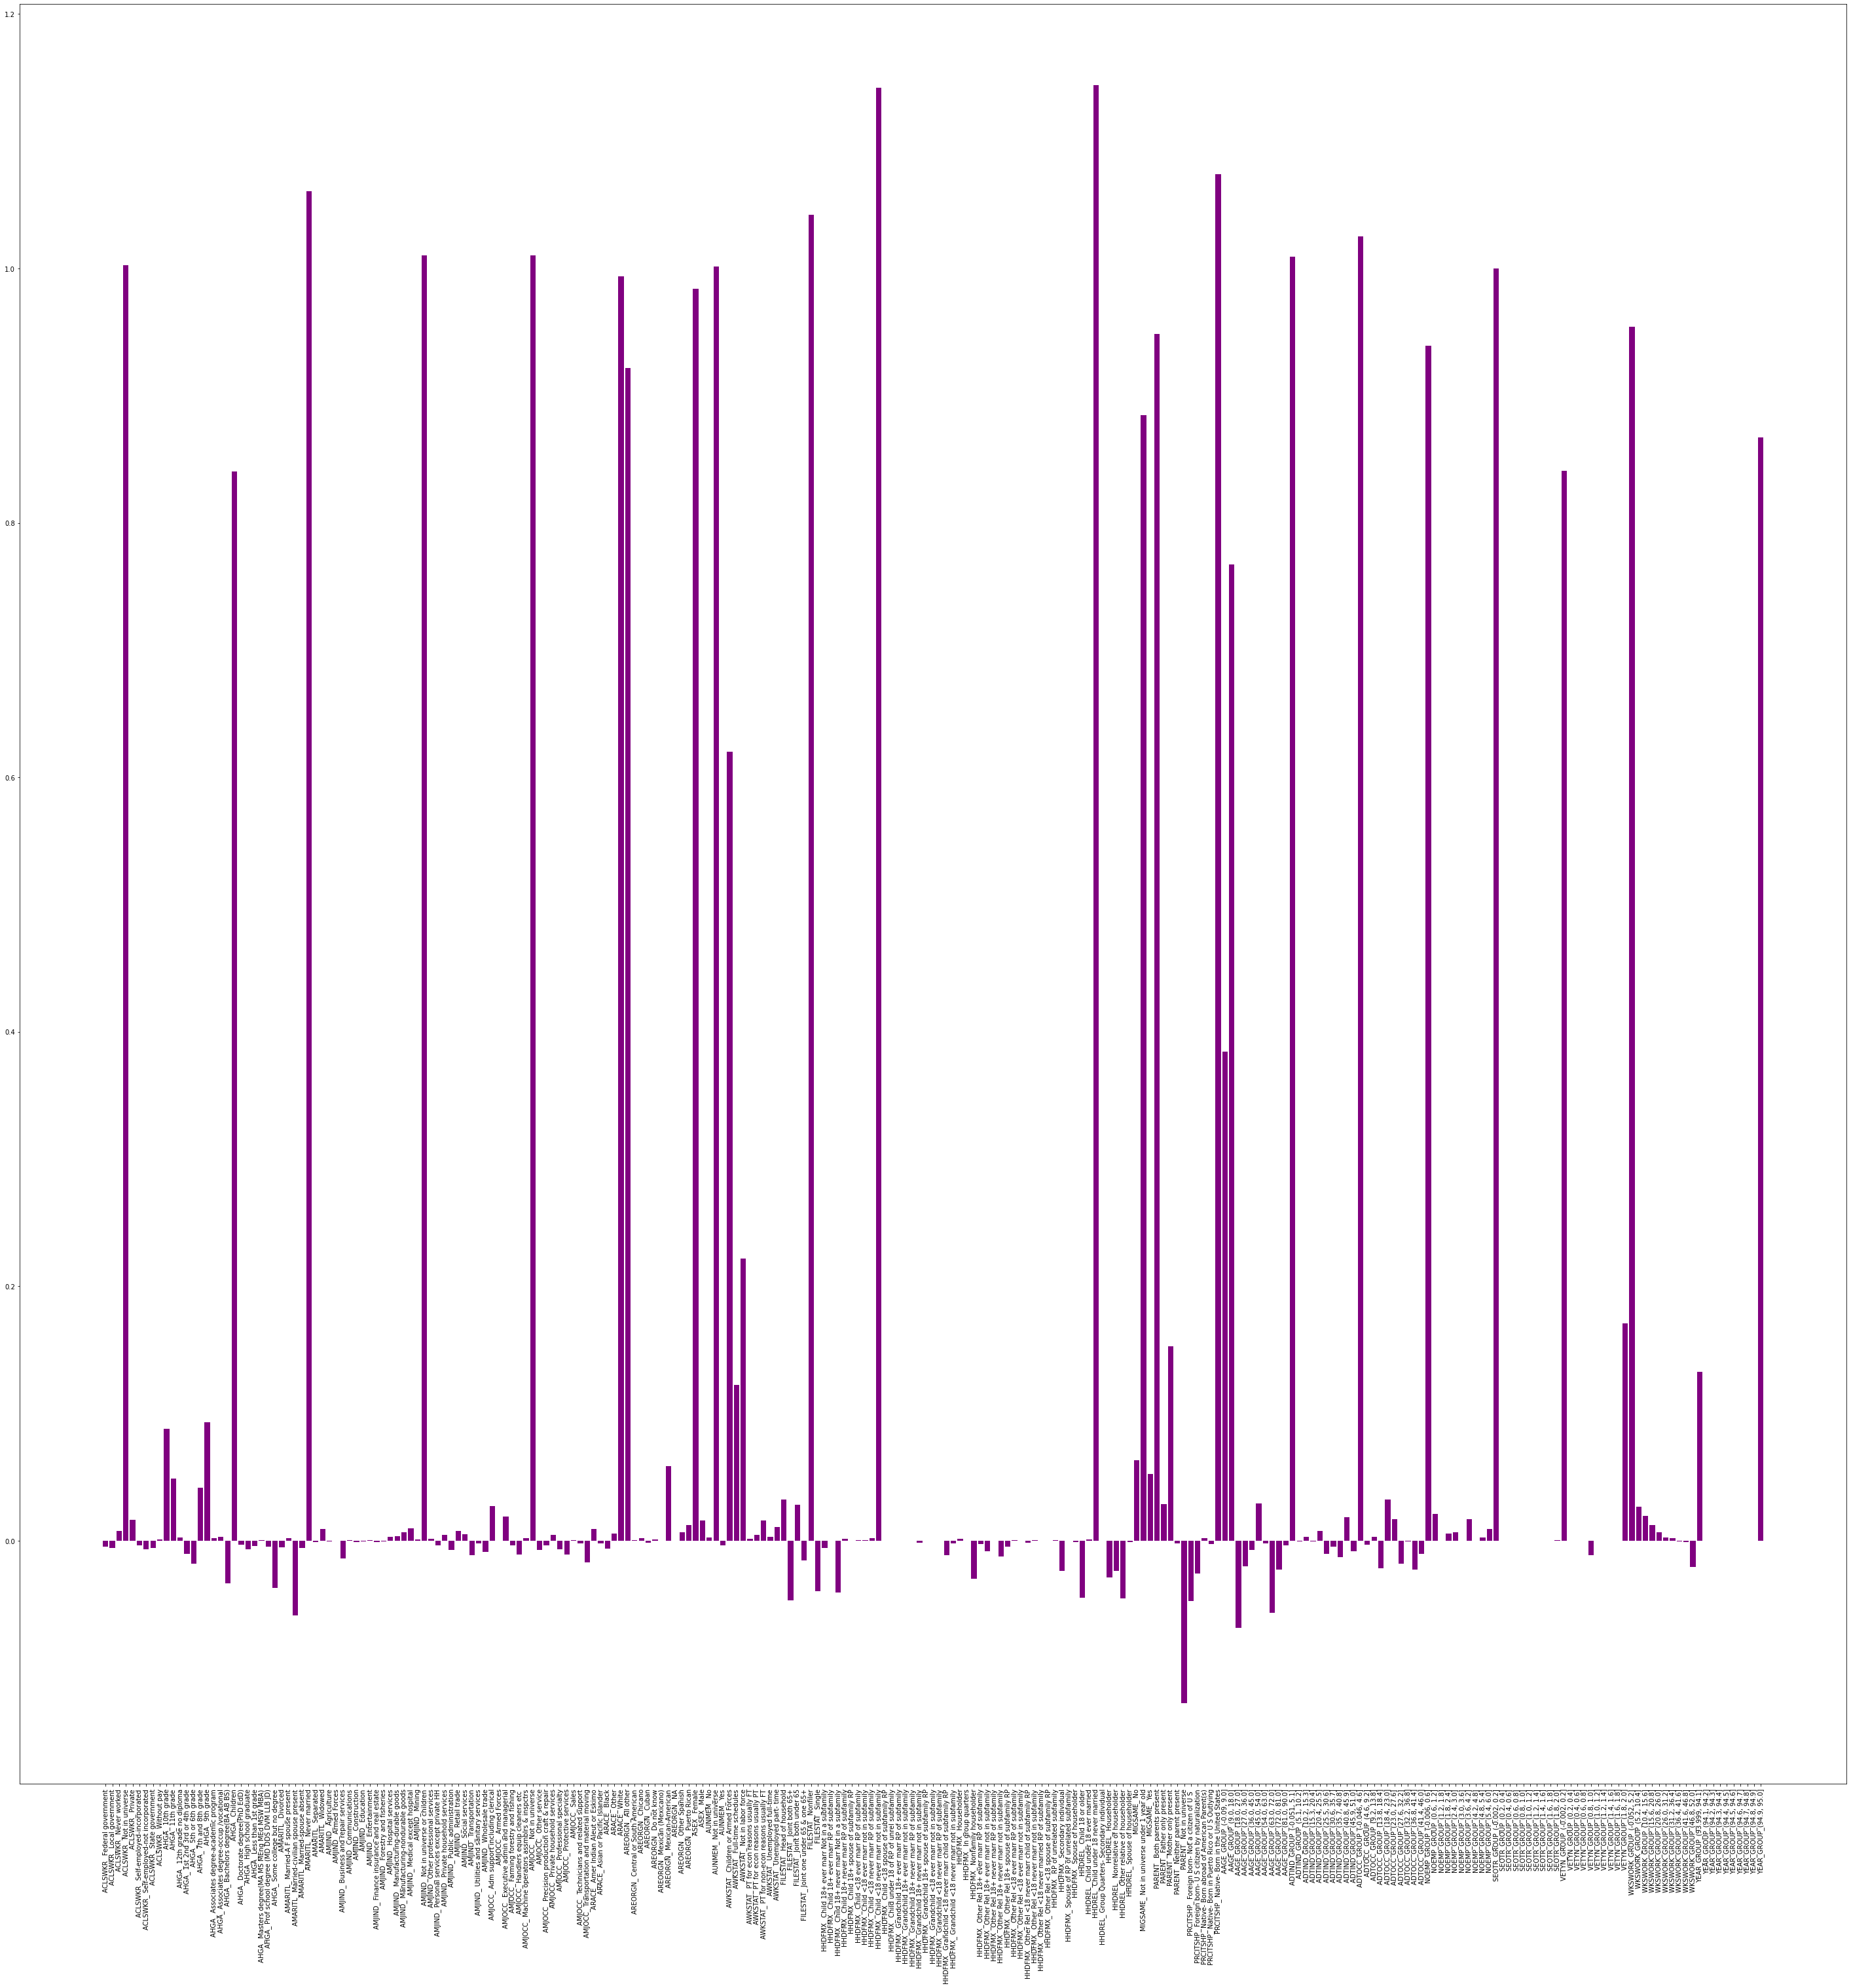

In [168]:
inversePCA = pca.inverse_transform(tmpCluster.get_medians()[clusterPercent.index(max(clusterPercent))])
plt.figure(figsize = (50,50))
plt.bar(df.columns, inversePCA,color = 'purple')
plt.xticks(df.columns, df.columns, rotation=90)
plt.show()

In [169]:
df = pd.read_csv("more_than_50k.csv")
df = df.replace(" ?", np.nan)
df.head()

AAGE                      ACLSWKR  ADTIND  ...  VETYN WKSWORK  YEAR
0    57   Self-employed-incorporated      11  ...      2      52    95
1    44                      Private       3  ...      1      48    94
2    54                      Private      19  ...      2      52    94
3    25                      Private      33  ...      2      52    95
4    26                      Private      11  ...      2      52    95

[5 rows x 40 columns]

<BarContainer object of 8 artists>

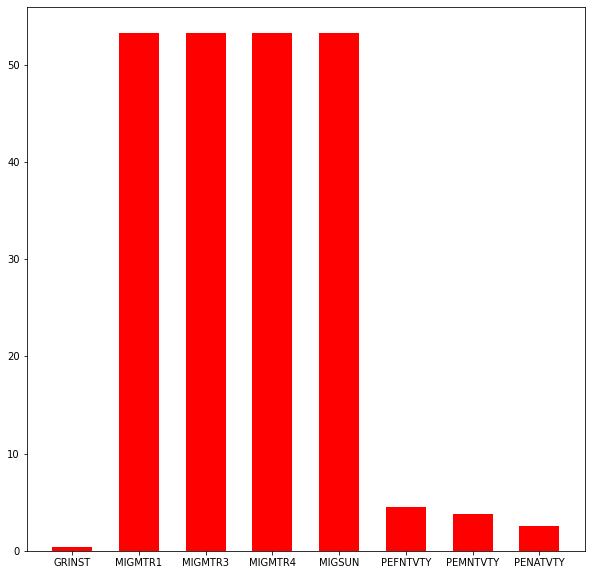

In [170]:
df_columns = list(df.columns)
df_columns
col_nan_vals = []
col_total_vals = []
col_nan_percent = {}


for val in df_columns:
  col_nan_vals.append(df[val].isna().sum())
  col_total_vals.append(len(df[val]))

for i in range(0,len(df_columns)):
  if(col_nan_vals[i] > 0):
    tmpPercent = (col_nan_vals[i]/col_total_vals[i])*100
    col_nan_percent[df_columns[i]] = tmpPercent
fig = plt.figure(figsize = (10, 10))
plt.bar(list(col_nan_percent.keys()),list(col_nan_percent.values()),width=0.6,color = 'red')

In [171]:
cols_to_remove = []
cols_missing_dict = dict(df.isnull().sum())

for key in cols_missing_dict.keys():
  if(cols_missing_dict[key] >= ((40/100)*len(df))):
    cols_to_remove.append(key)

df = df.drop(cols_to_remove,axis=1)

In [172]:
df.head()
len(df)

3580

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e422ff450>,
      dtype=object)

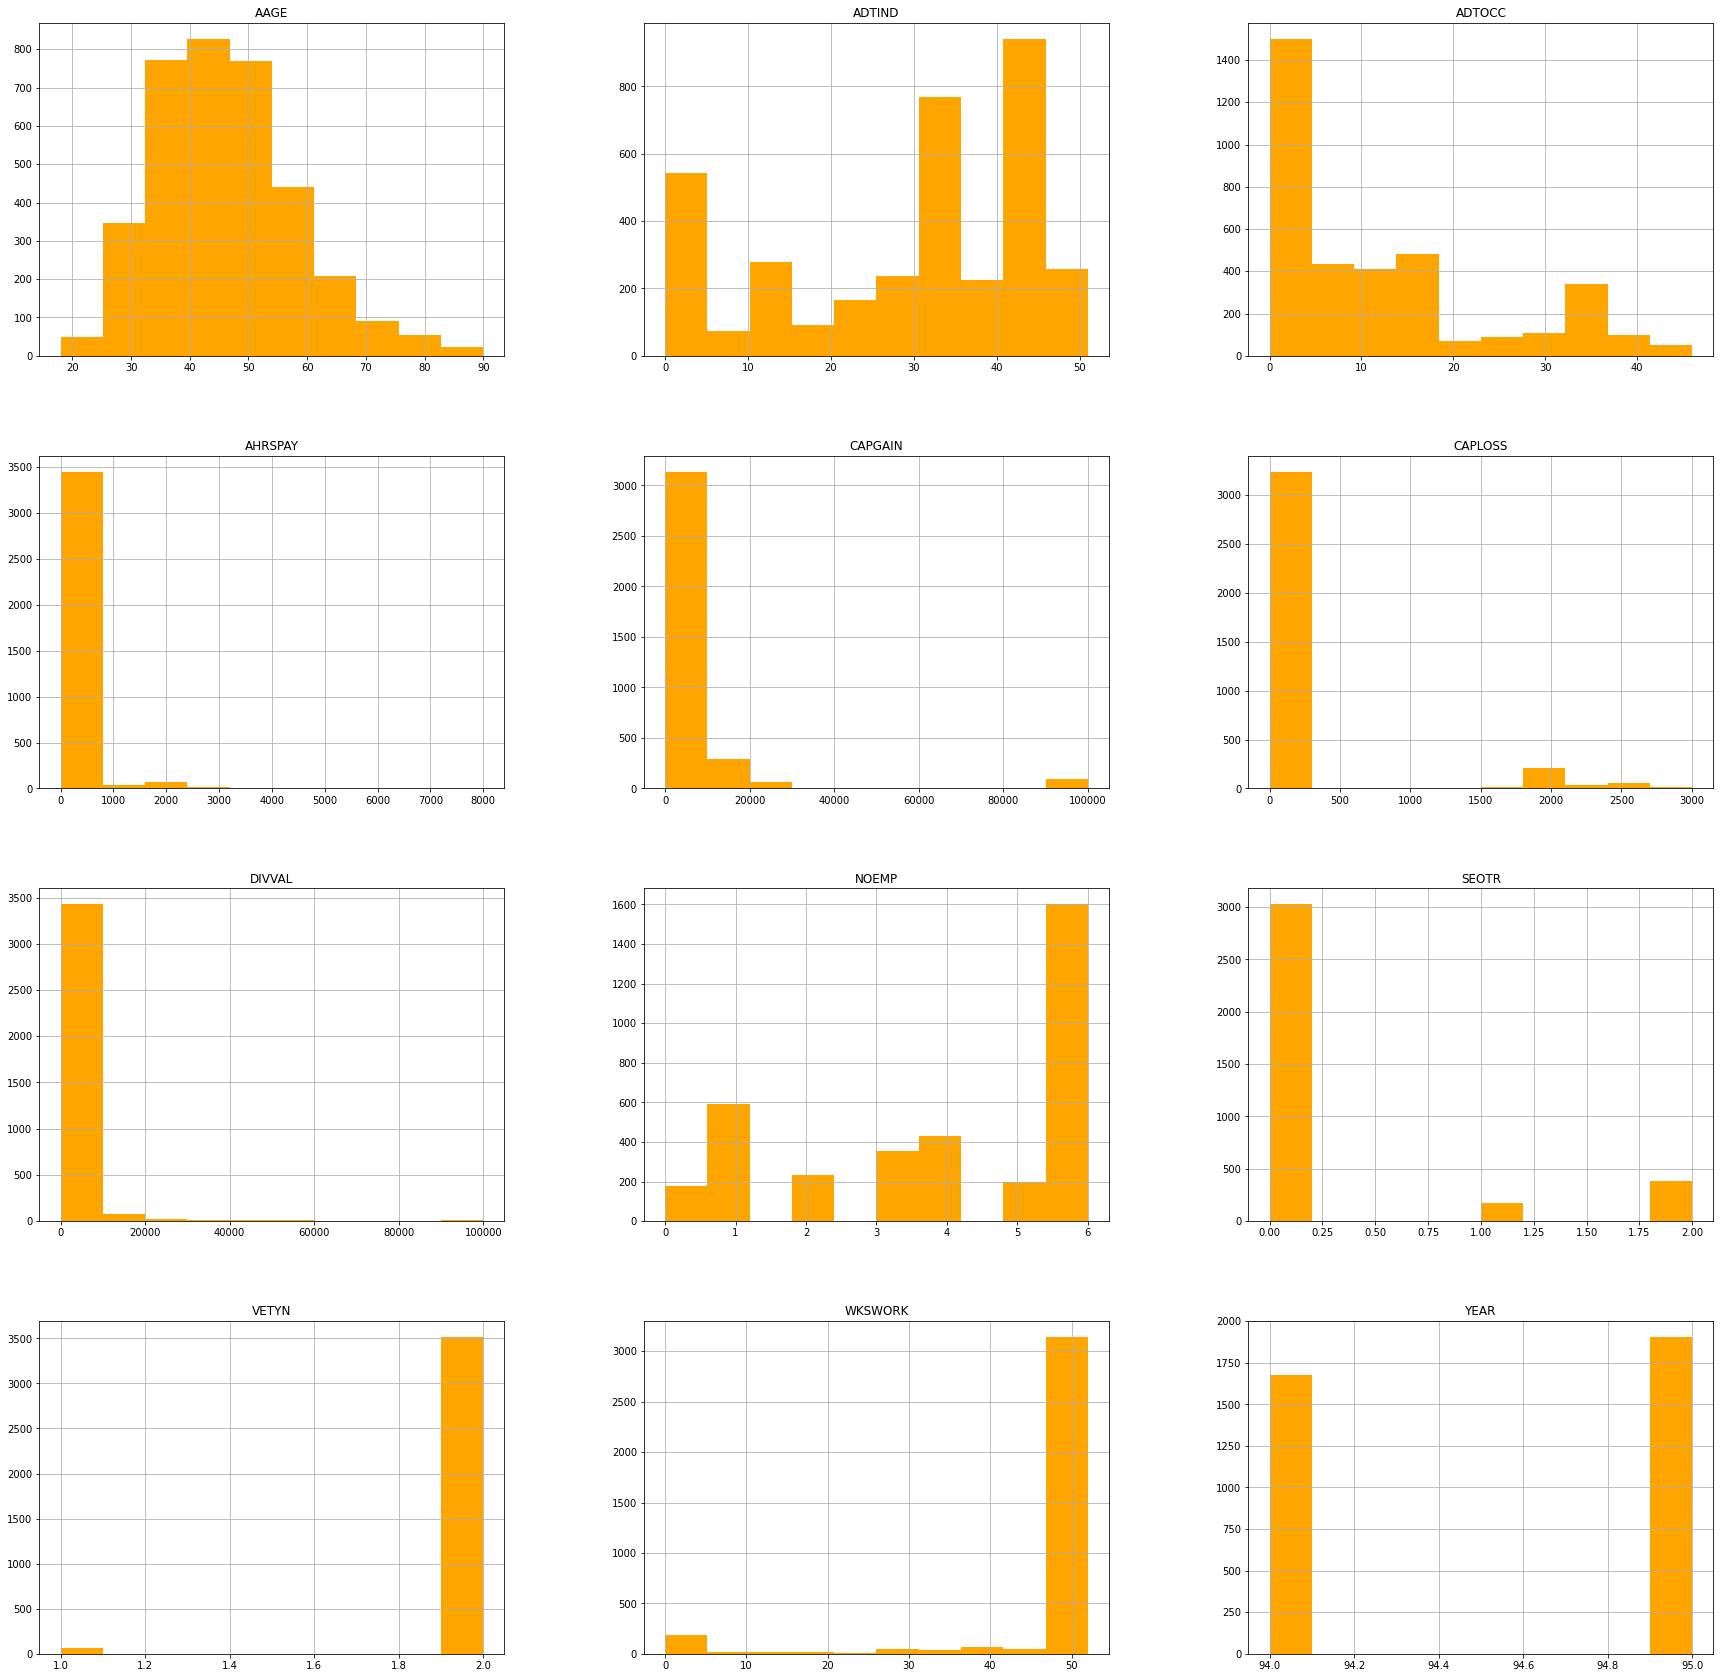

In [173]:
fig = plt.figure(figsize=(30,30))
df.hist(ax=fig.gca(),color= 'orange')

['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

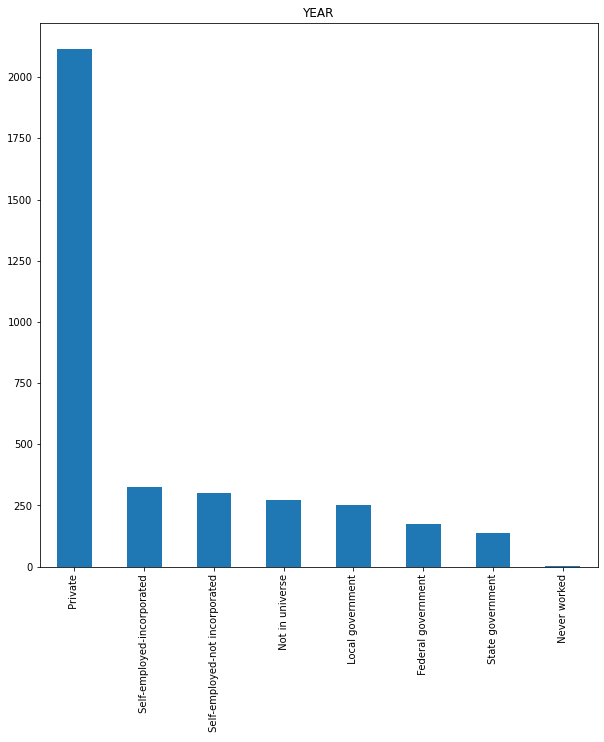

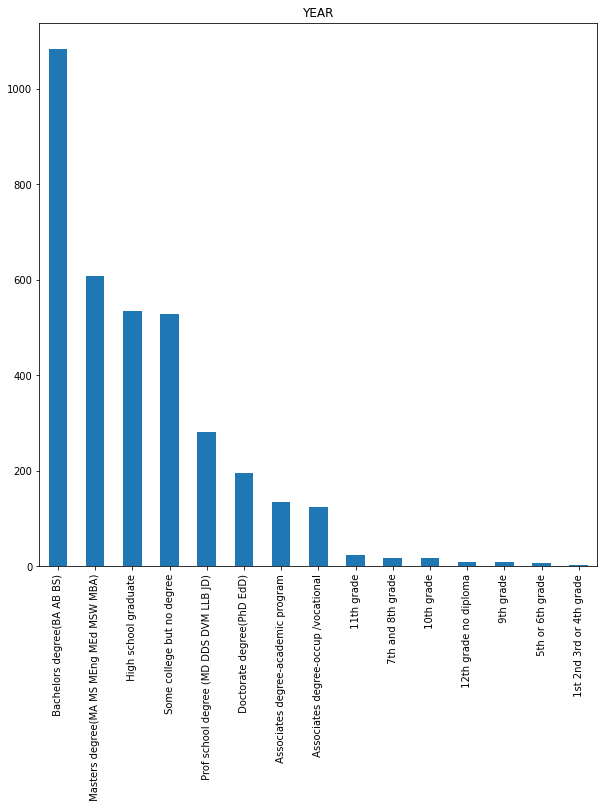

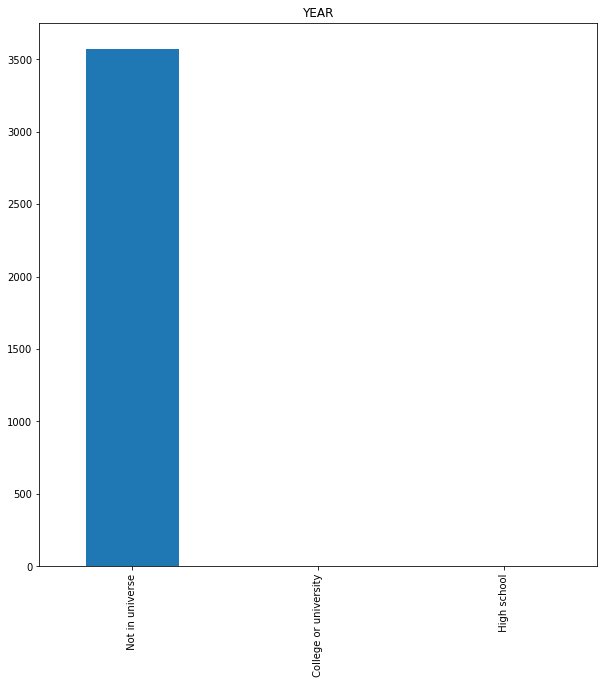

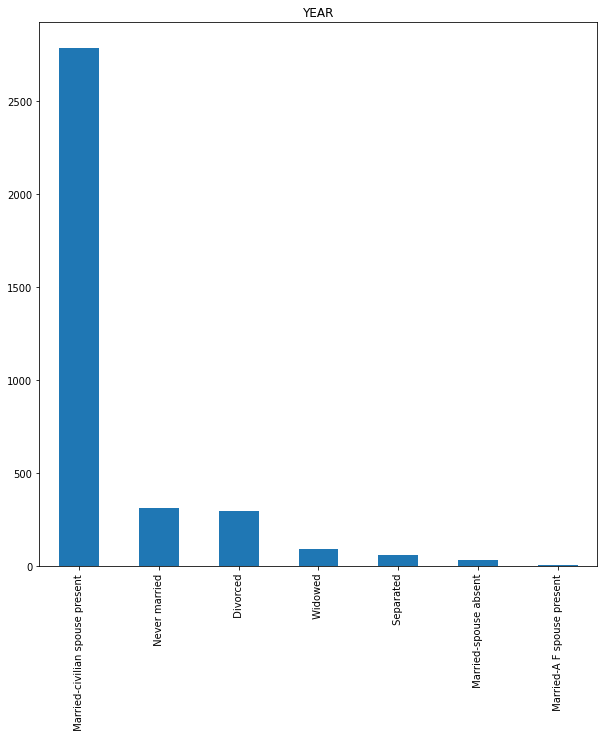

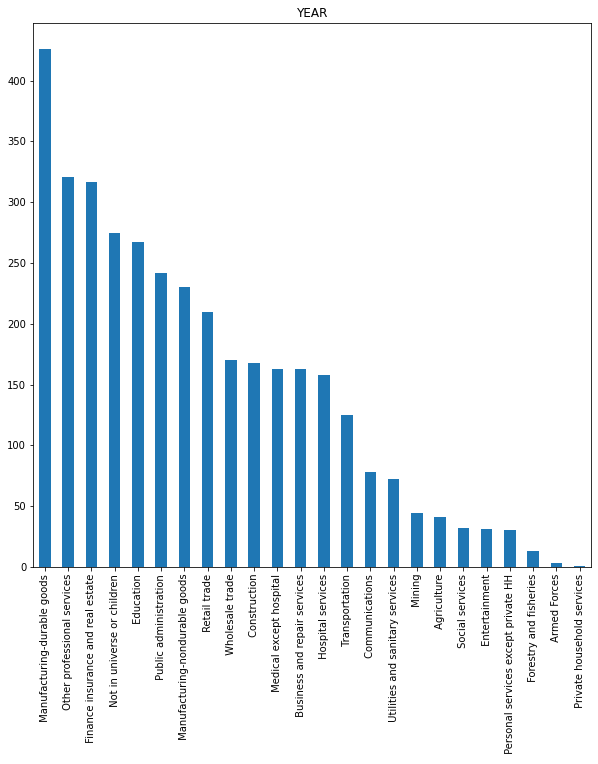

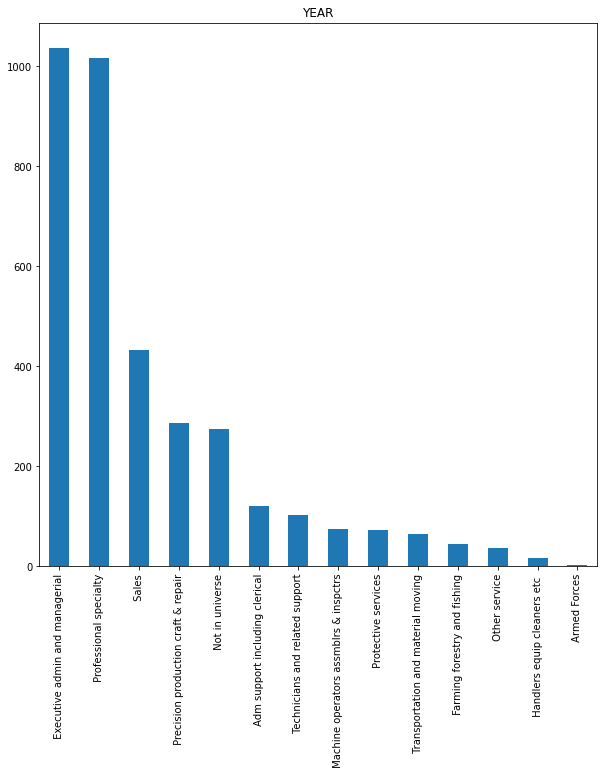

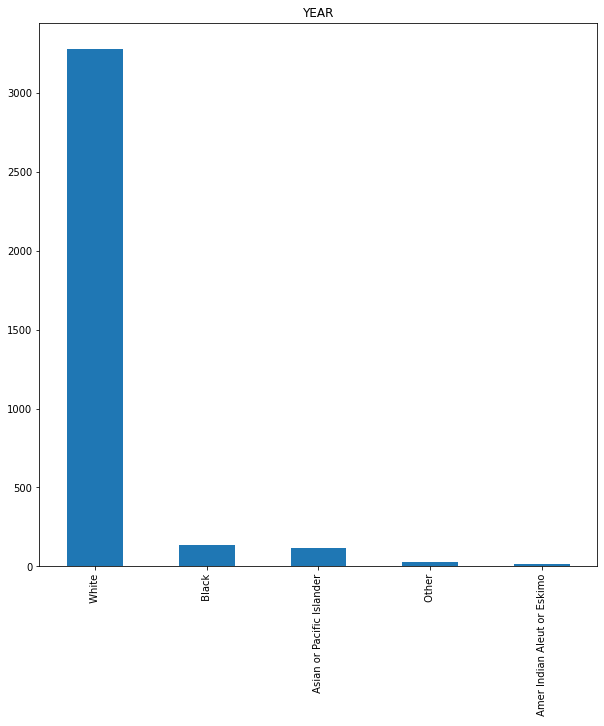

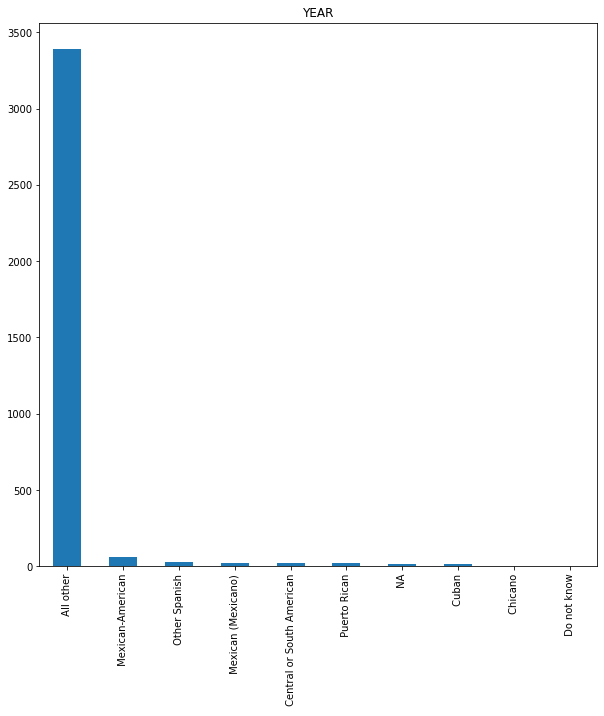

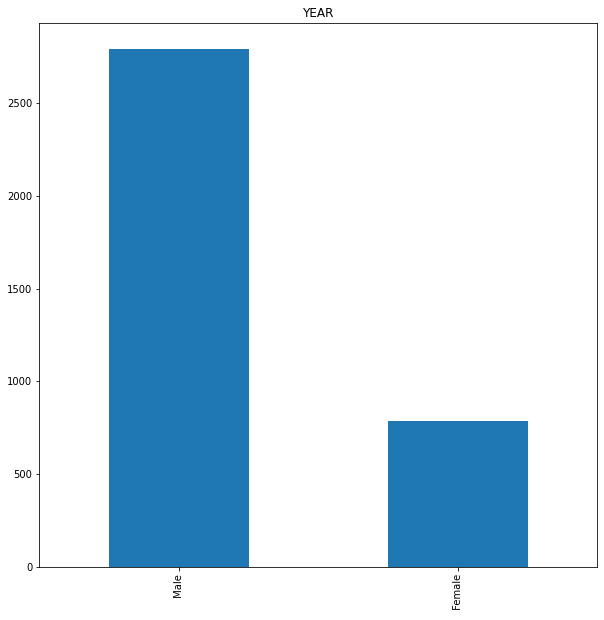

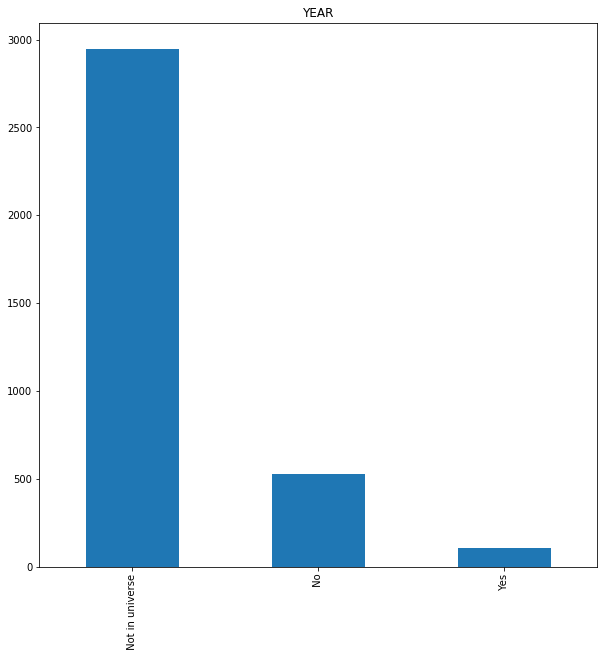

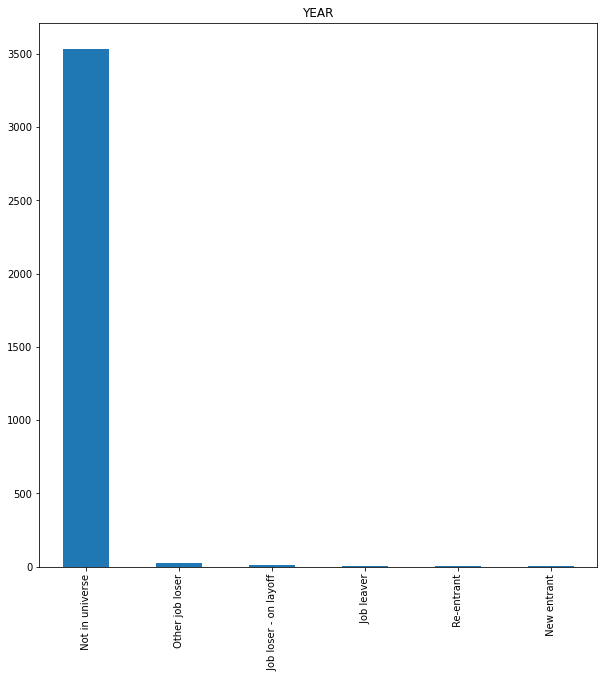

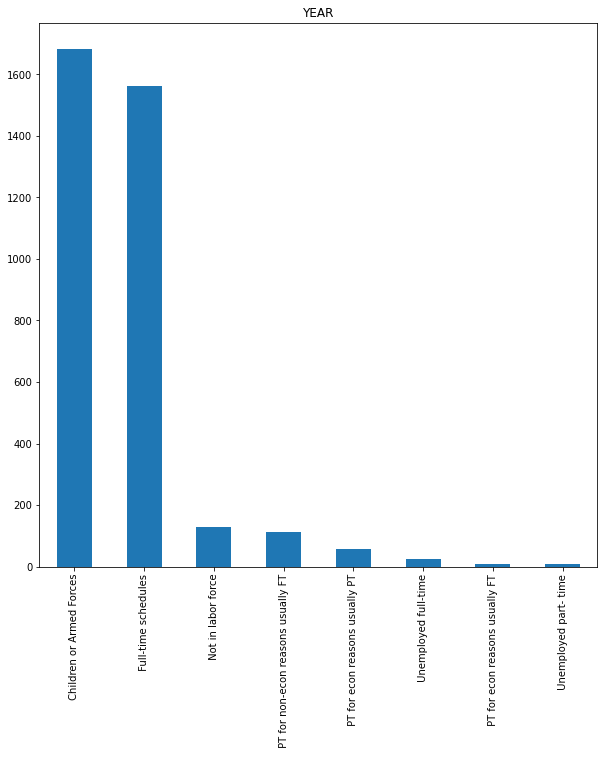

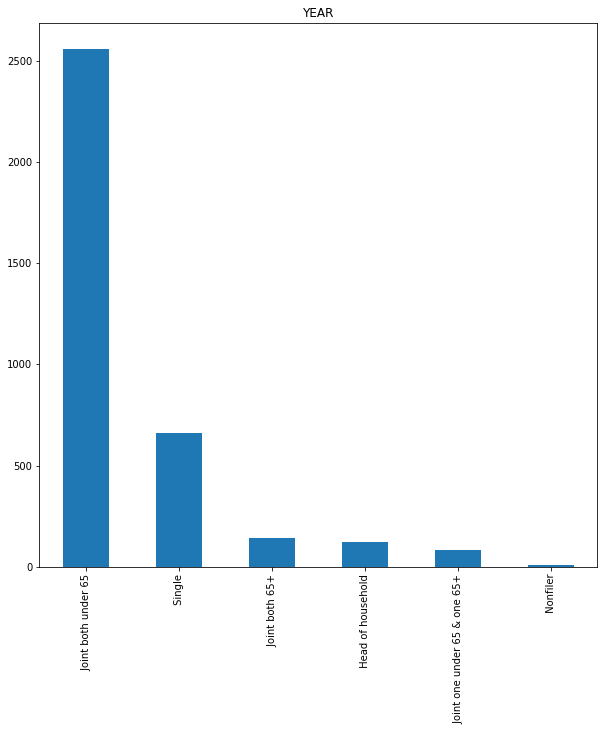

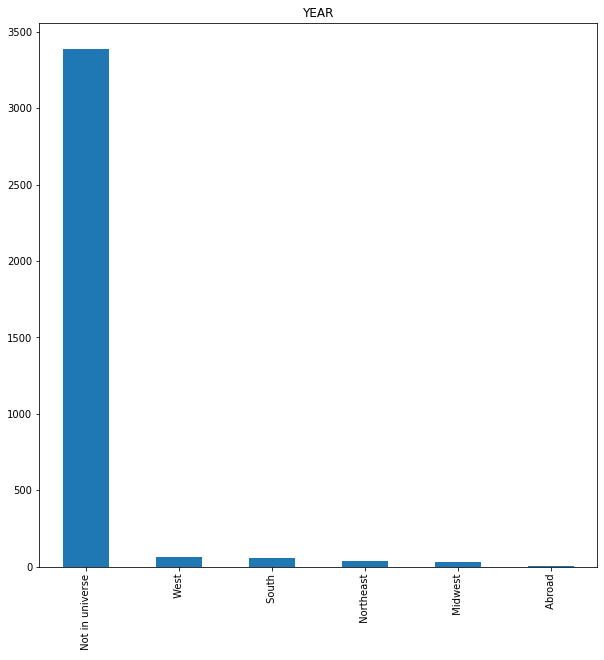

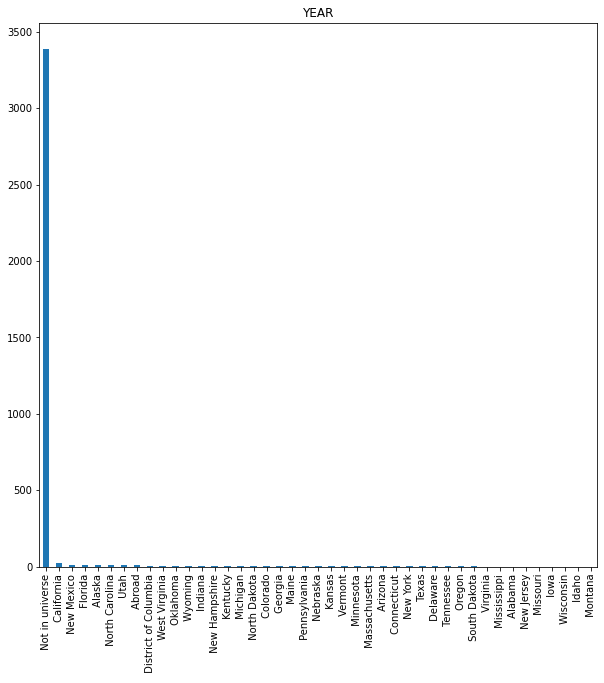

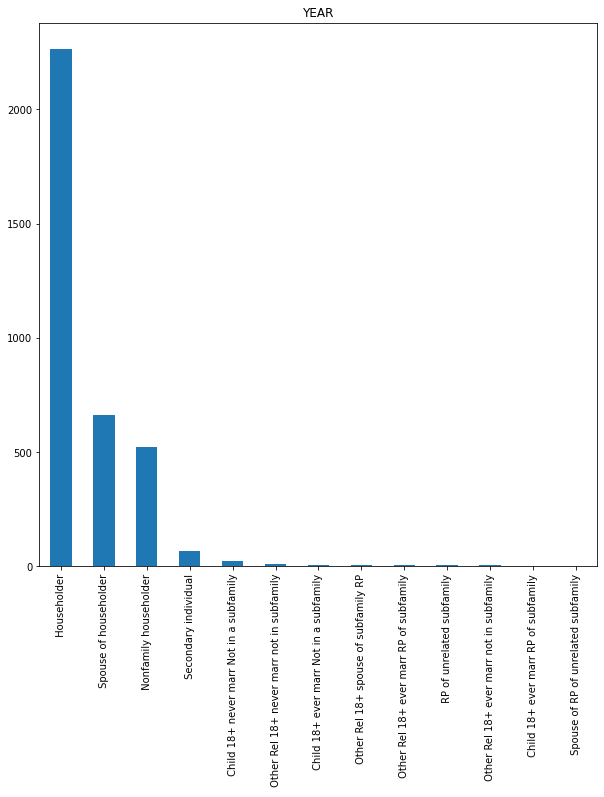

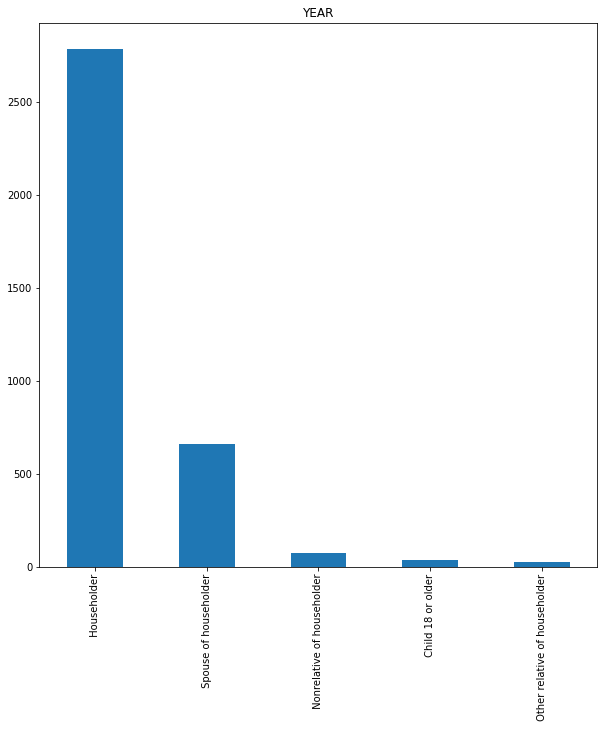

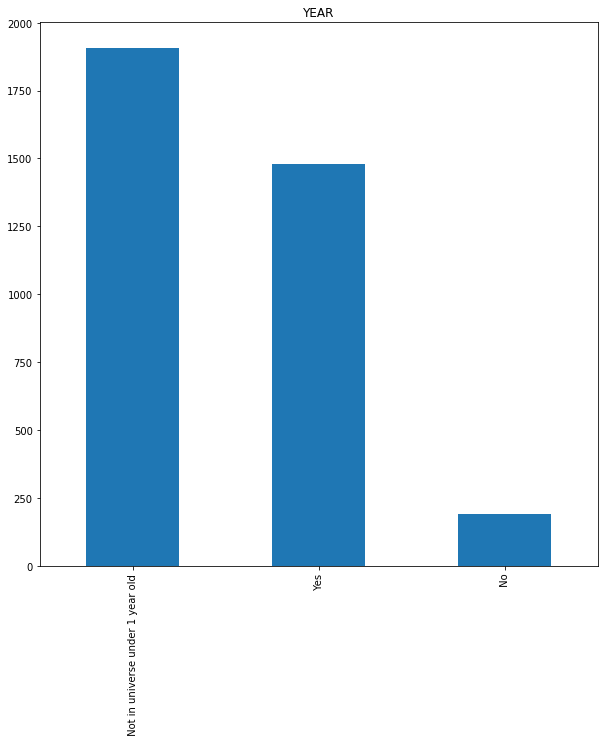

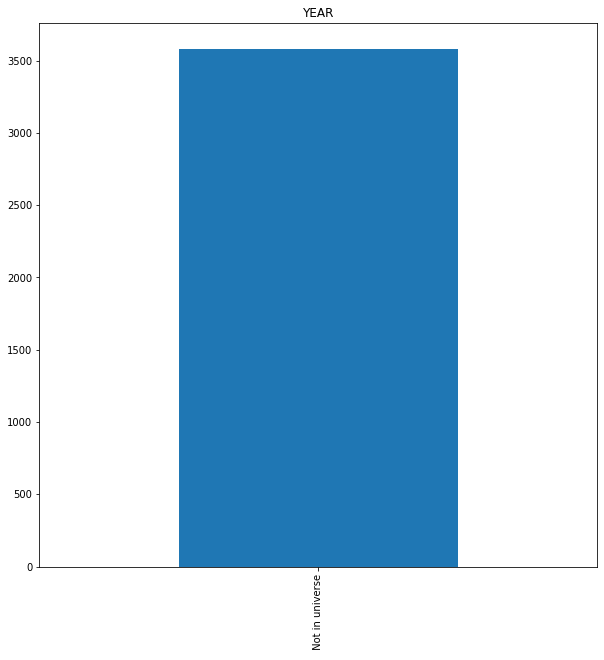

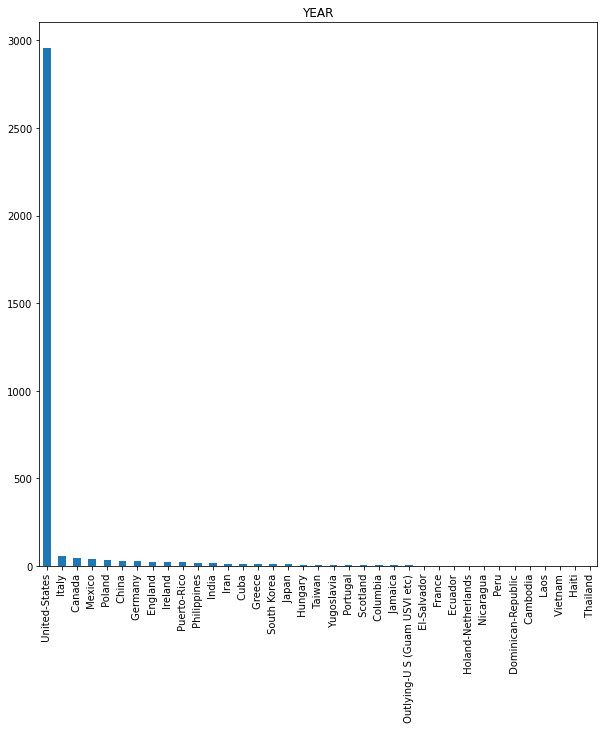

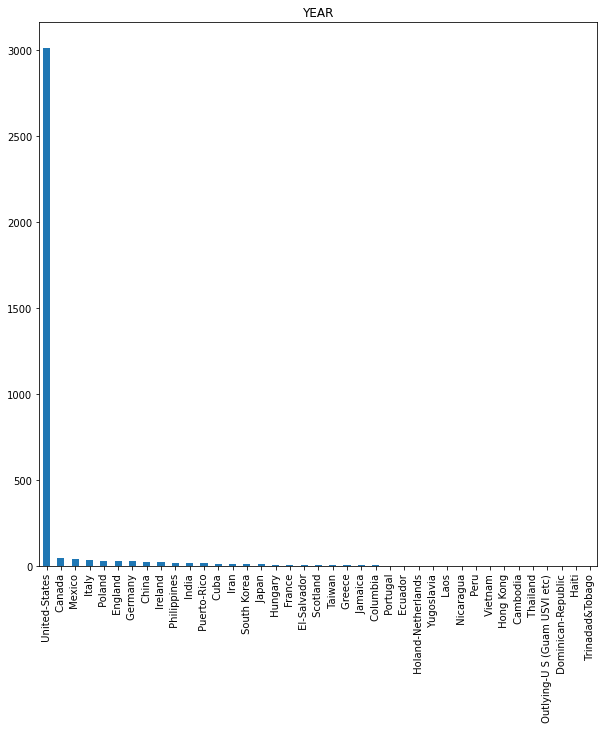

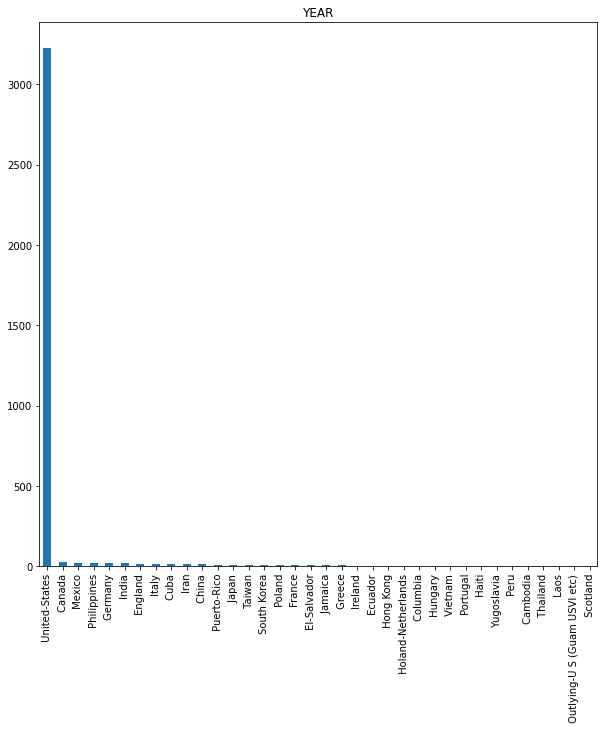

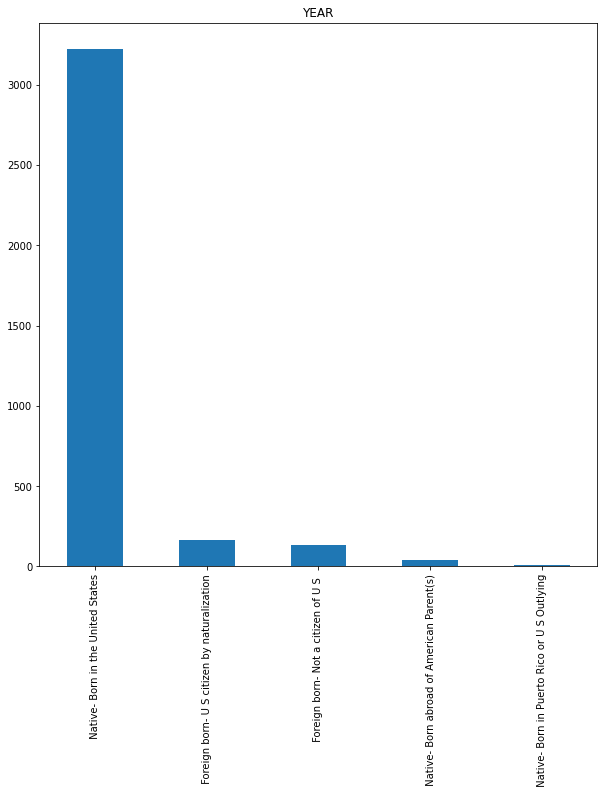

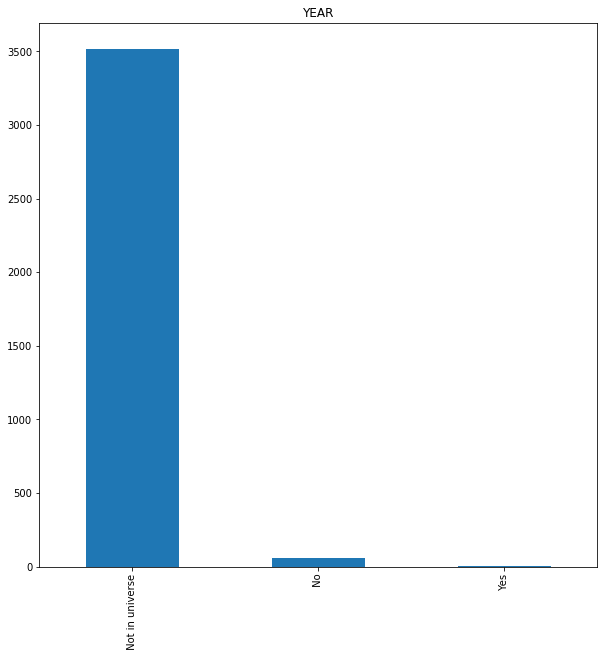

In [174]:
column_names = list(df)
categorical_data_cols = []
for i in range(len(column_names)):
  if type(df.iat[0,i]) == type("abcd"):
    categorical_data_cols.append(column_names[i])

print(categorical_data_cols)

for val in categorical_data_cols:
  fig = plt.figure(figsize=(10,10))
  df[val].value_counts().plot(kind = 'bar',title = column_names[i])

In [175]:
numerical_data_cols =[]
for val in list(df.columns):
  if(type(df.iloc[0][val]) == type(np.int64(0))):
    numerical_data_cols.append(val)

for val in numerical_data_cols:
  tmp_name = val + "_GROUP"
  df[tmp_name] = pd.cut(df[val],10)

df.head()

AAGE                      ACLSWKR  ...  WKSWORK_GROUP      YEAR_GROUP
0    57   Self-employed-incorporated  ...   (46.8, 52.0]    (94.9, 95.0]
1    44                      Private  ...   (46.8, 52.0]  (93.999, 94.1]
2    54                      Private  ...   (46.8, 52.0]  (93.999, 94.1]
3    25                      Private  ...   (46.8, 52.0]    (94.9, 95.0]
4    26                      Private  ...   (46.8, 52.0]    (94.9, 95.0]

[5 rows x 48 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA', 'AAGE_GROUP', 'ADTIND_GROUP', 'ADTOCC_GROUP', 'AHRSPAY_GROUP', 'CAPGAIN_GROUP', 'CAPLOSS_GROUP', 'DIVVAL_GROUP', 'NOEMP_GROUP', 'SEOTR_GROUP', 'VETYN_GROUP', 'WKSWORK_GROUP', 'YEAR_GROUP']


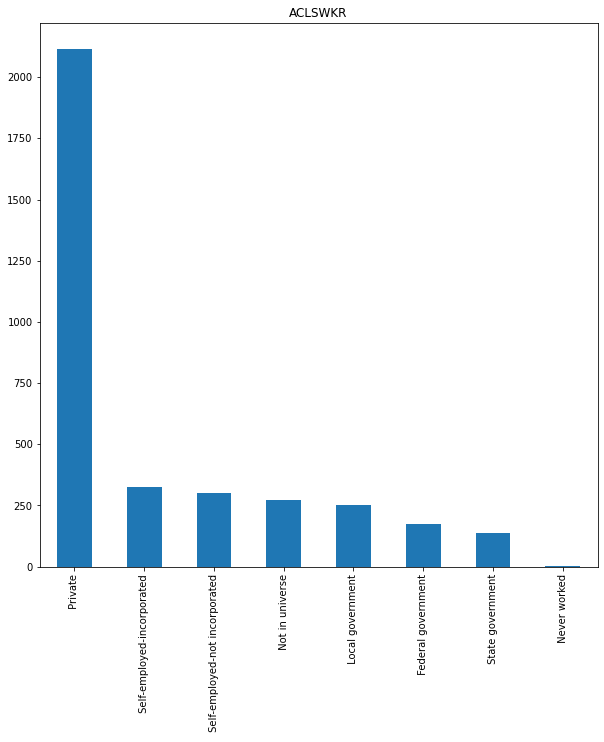

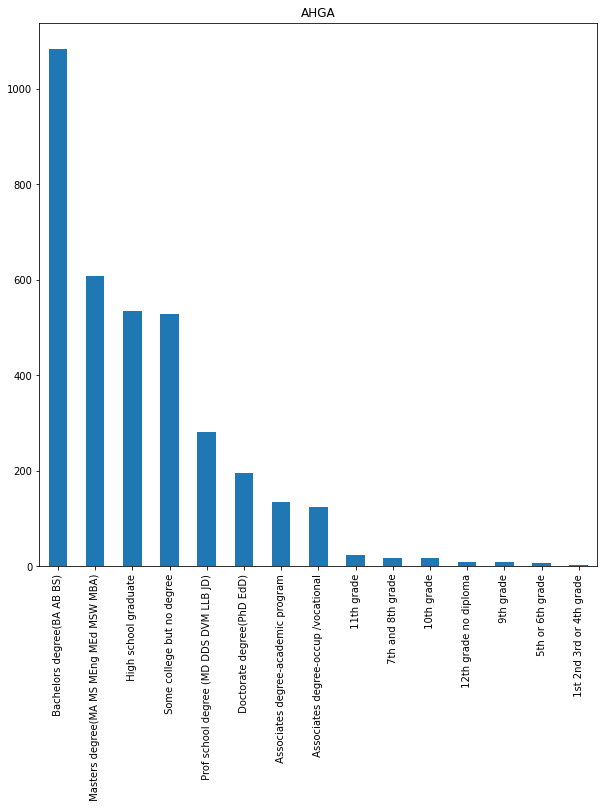

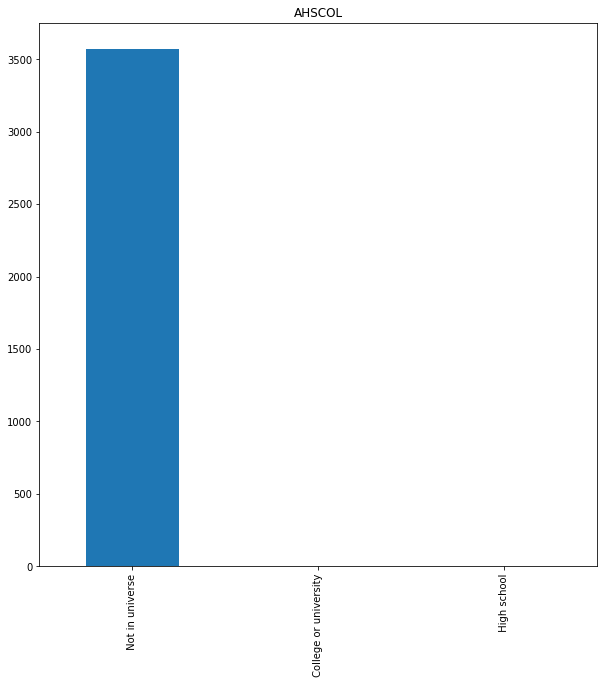

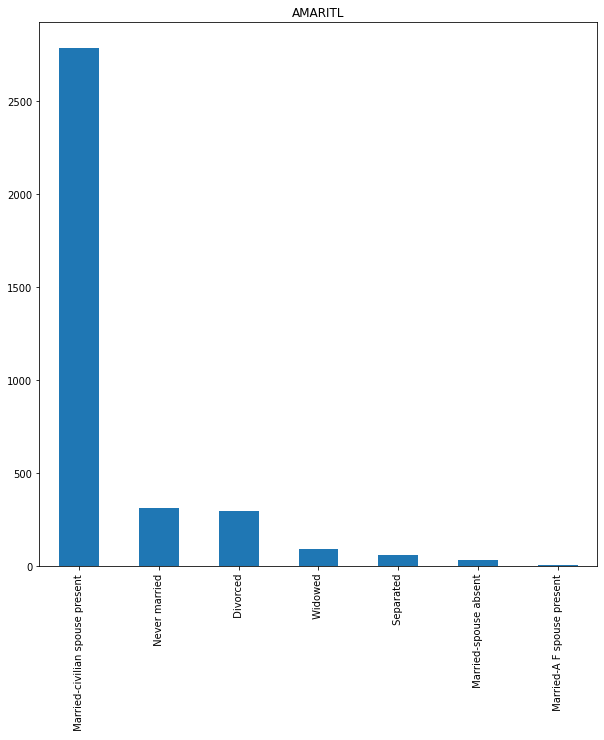

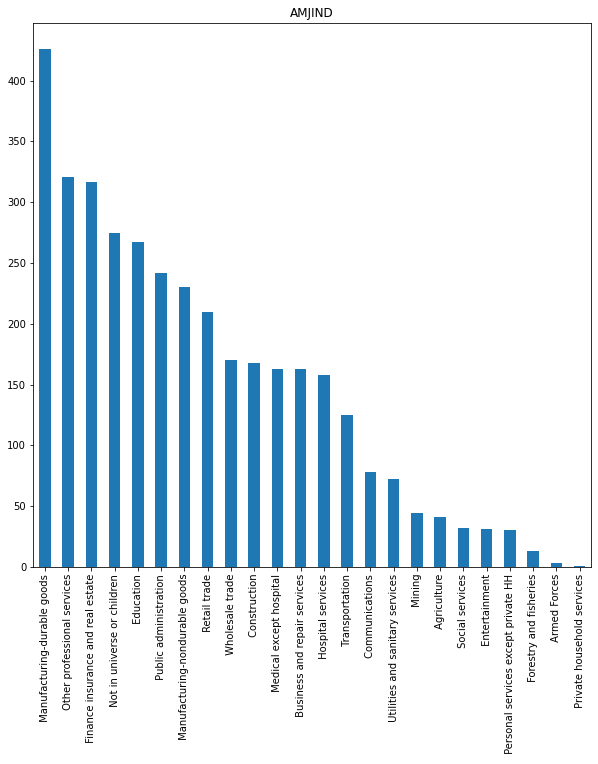

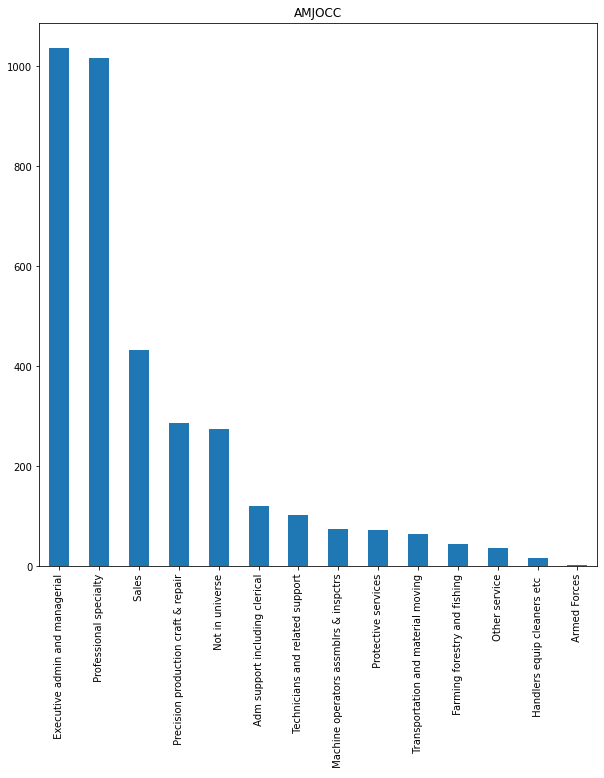

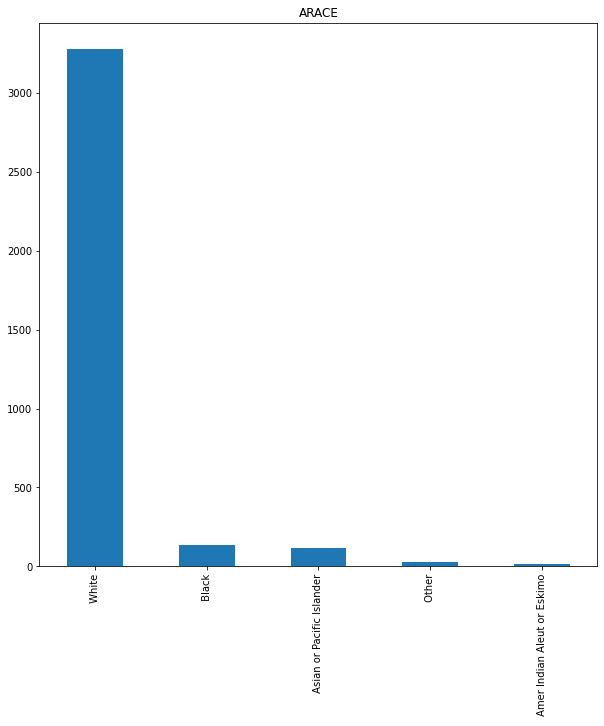

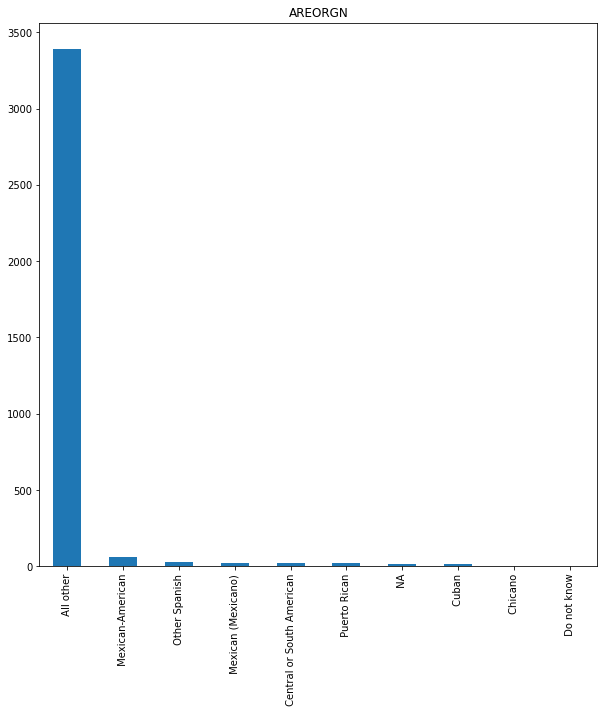

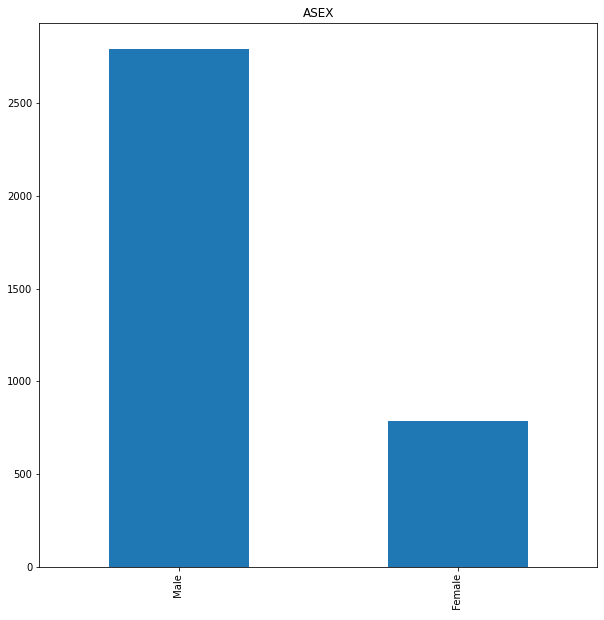

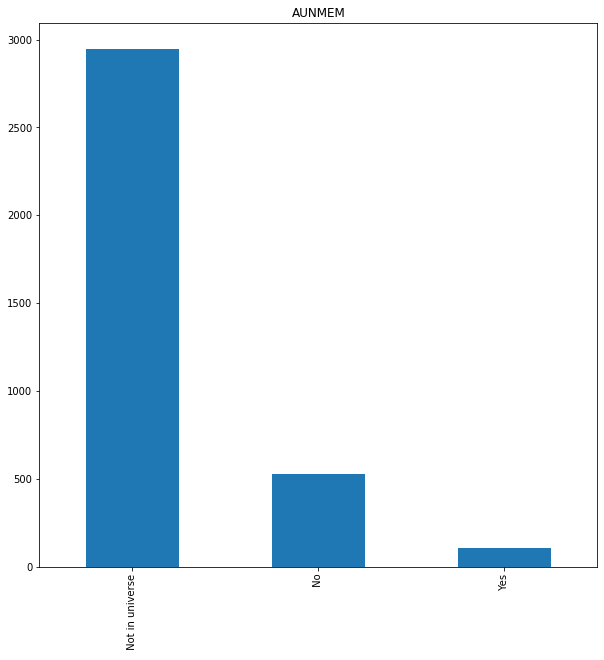

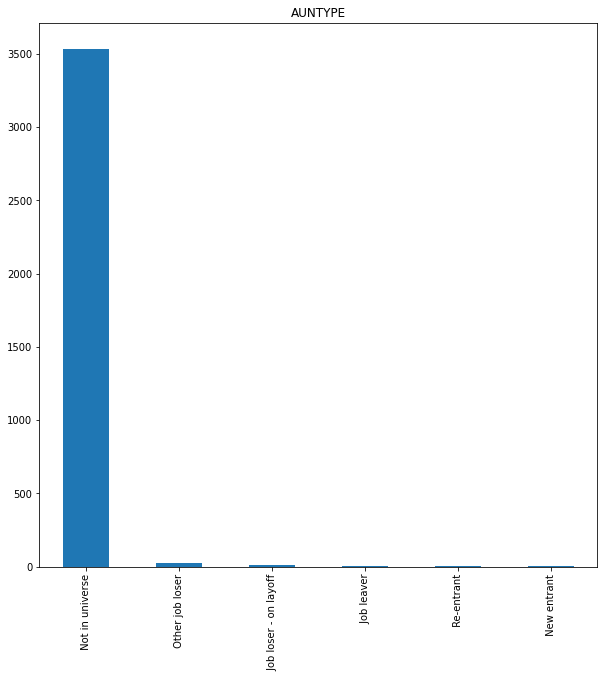

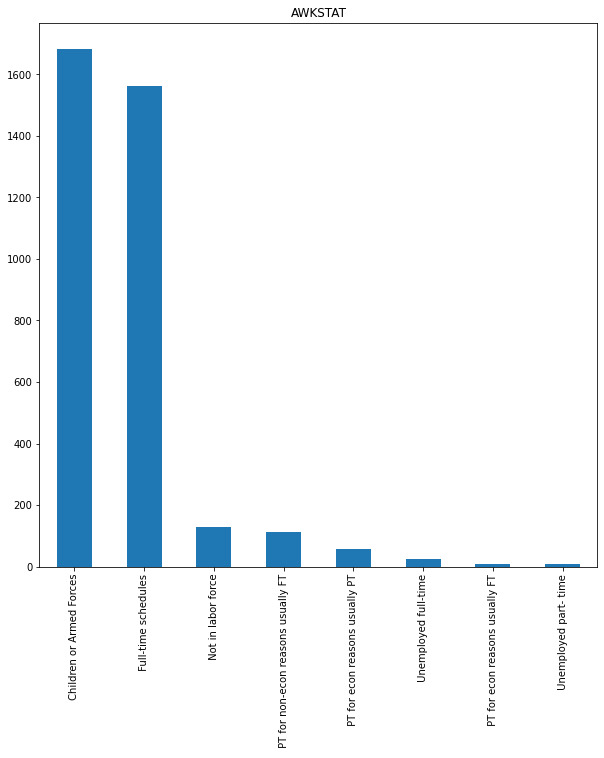

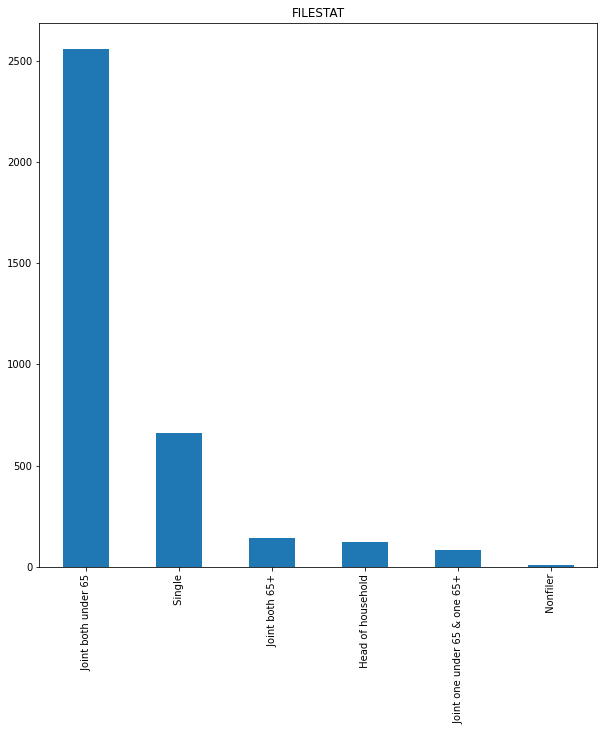

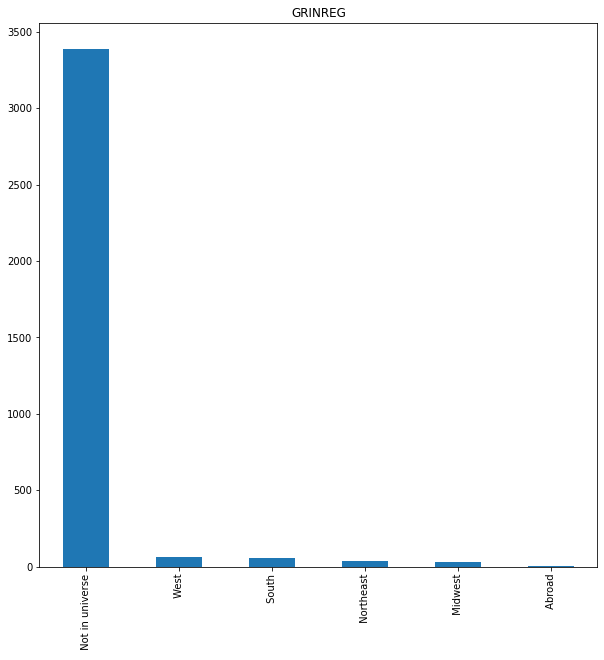

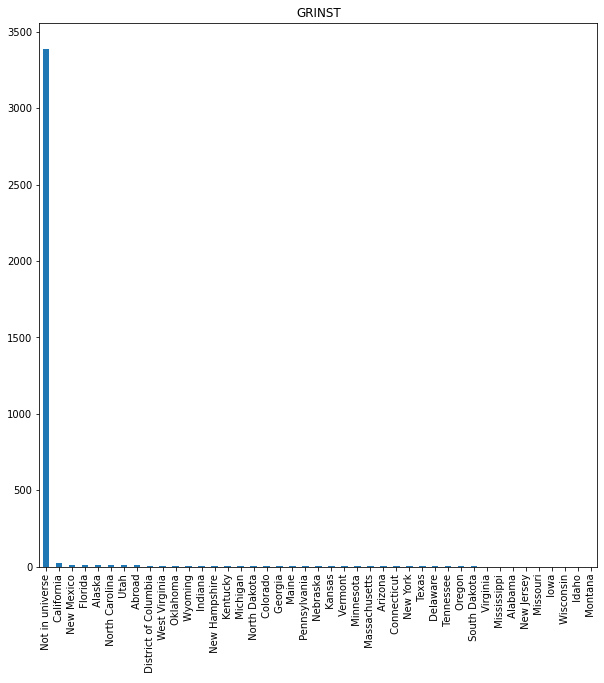

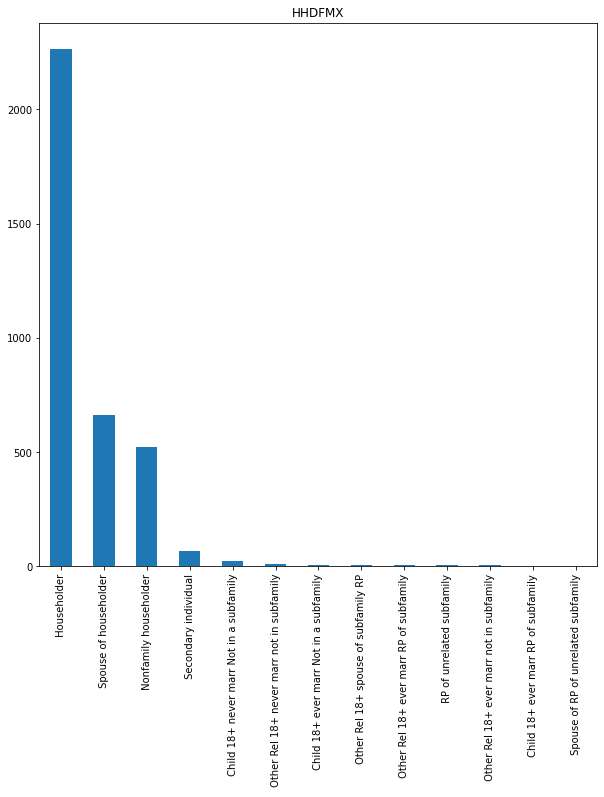

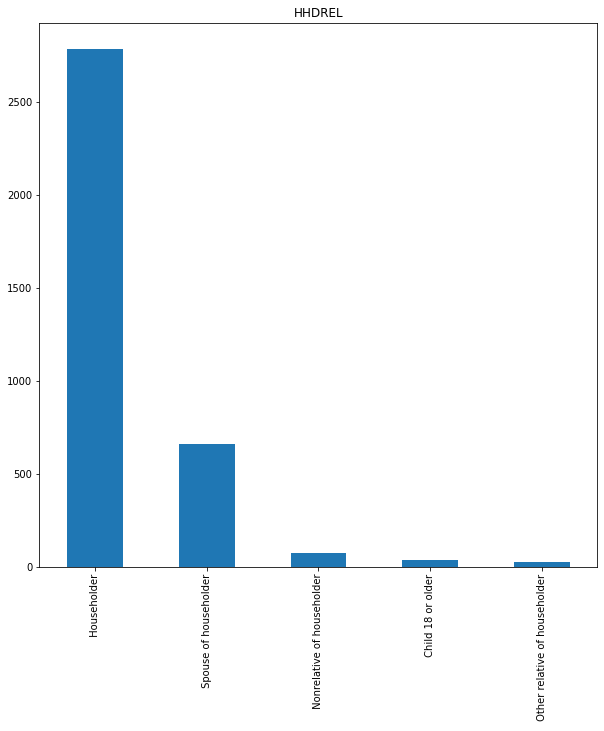

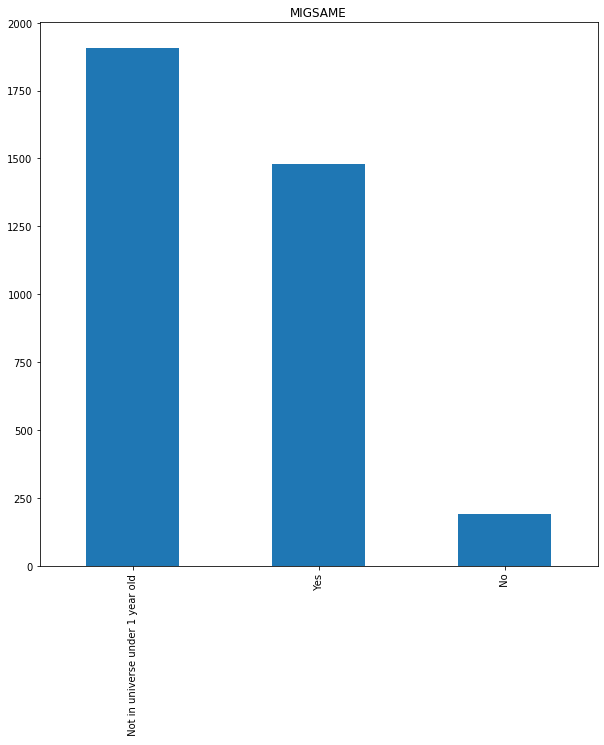

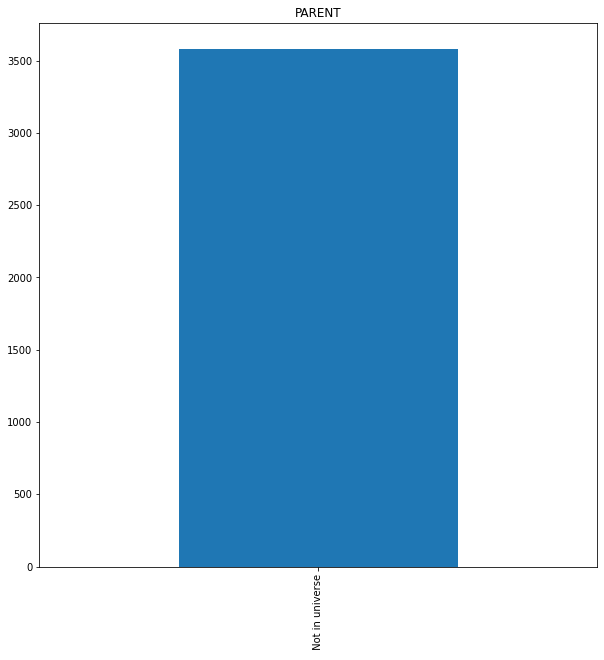

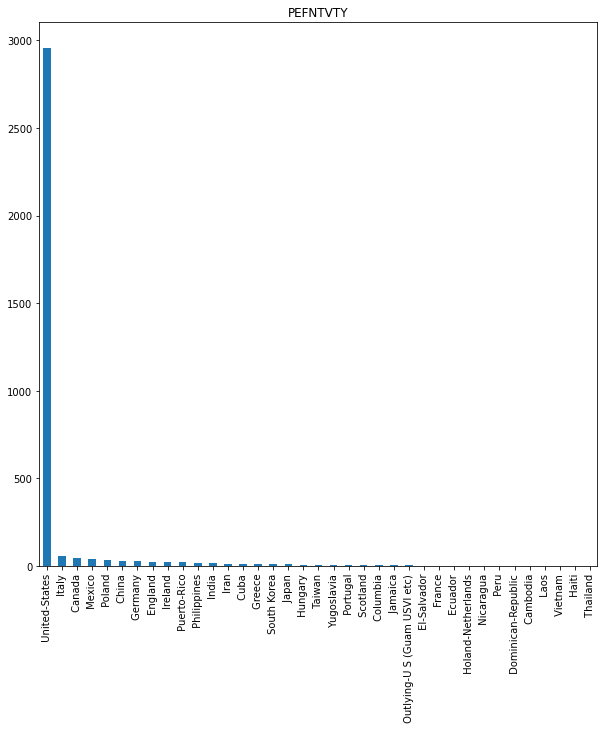

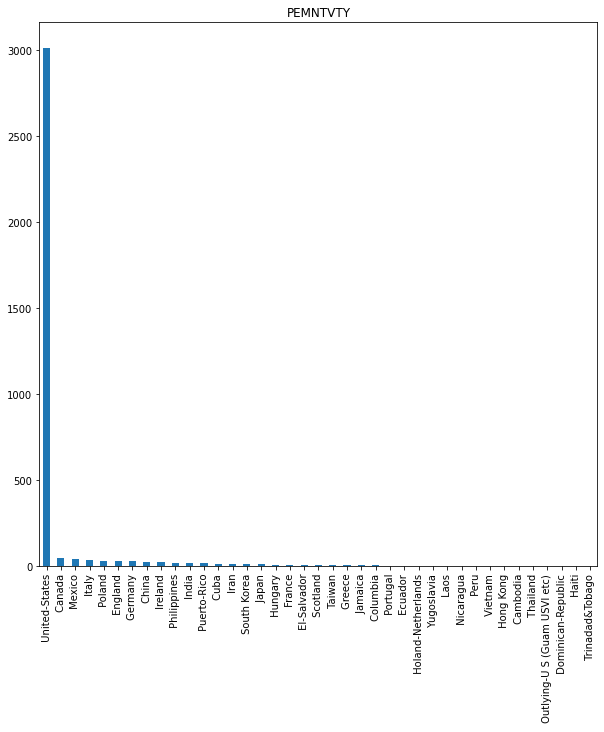

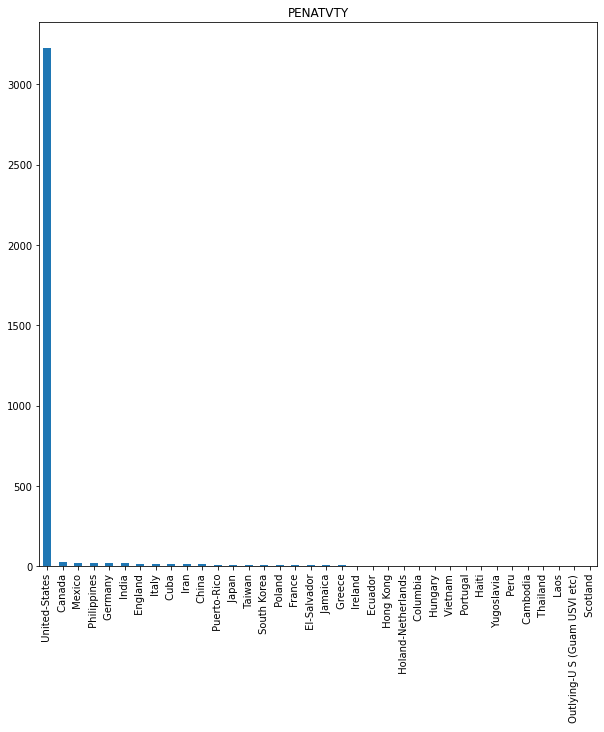

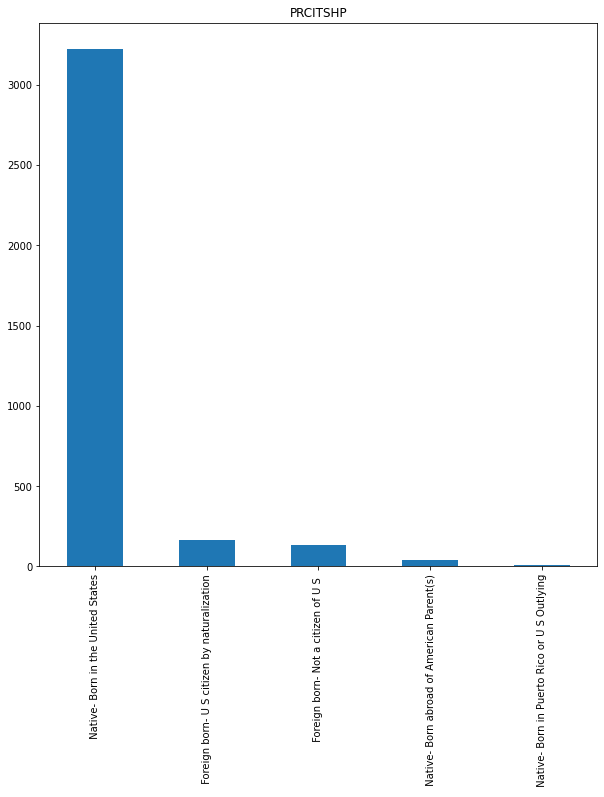

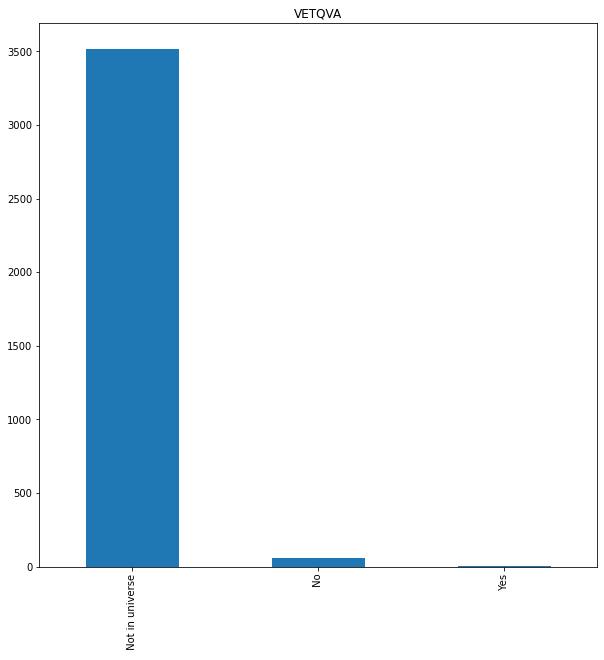

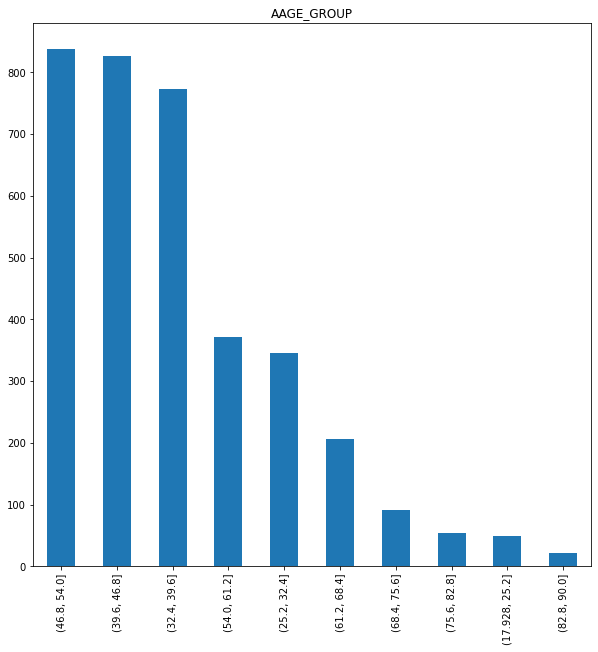

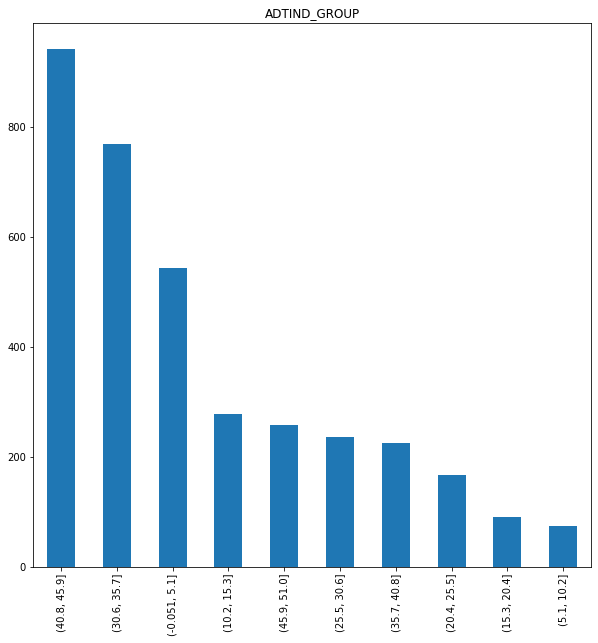

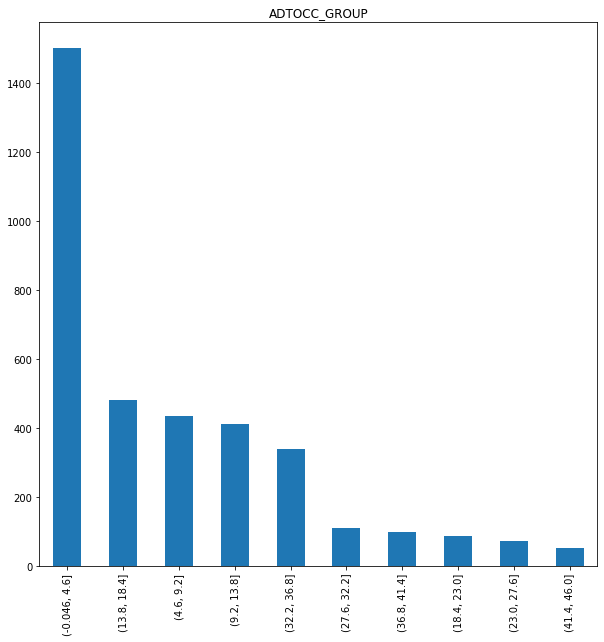

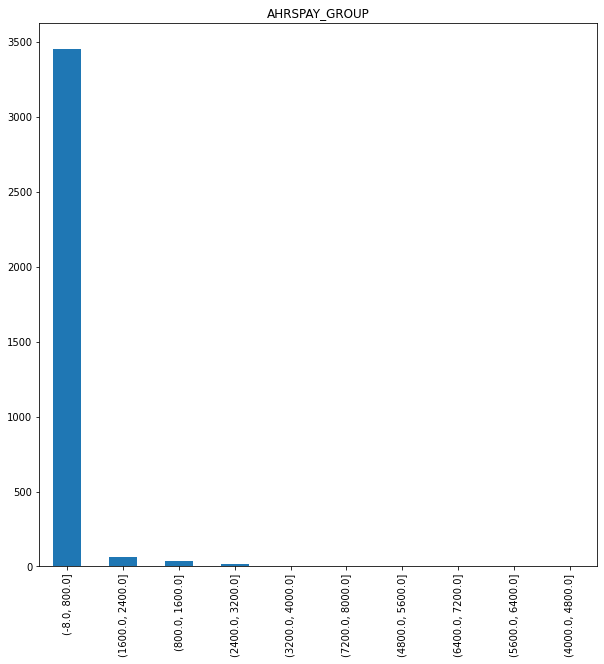

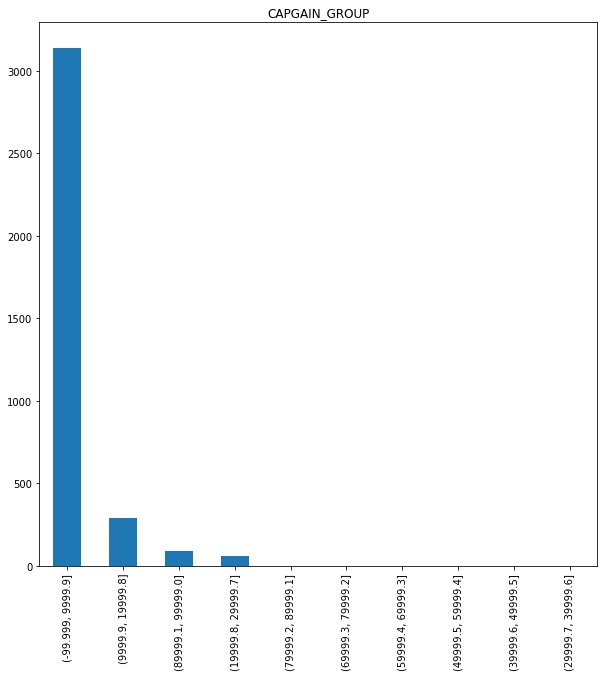

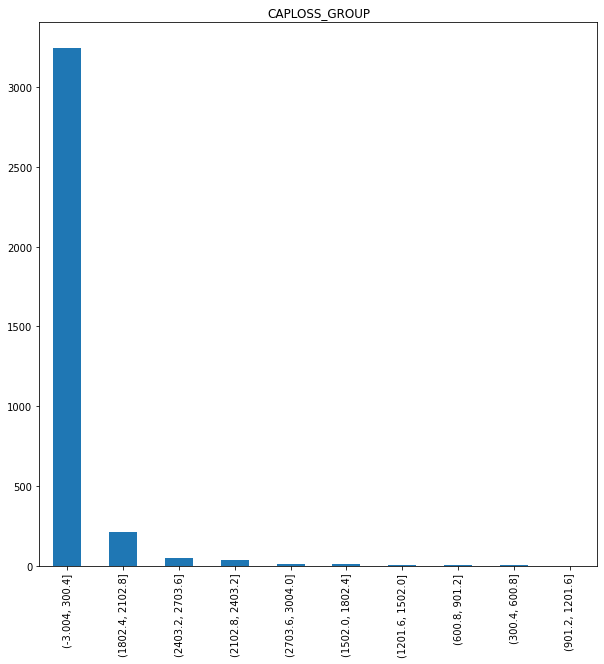

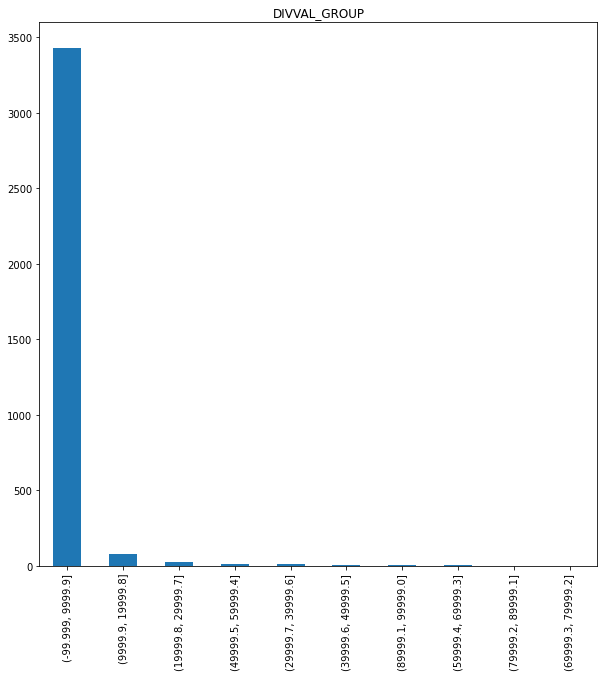

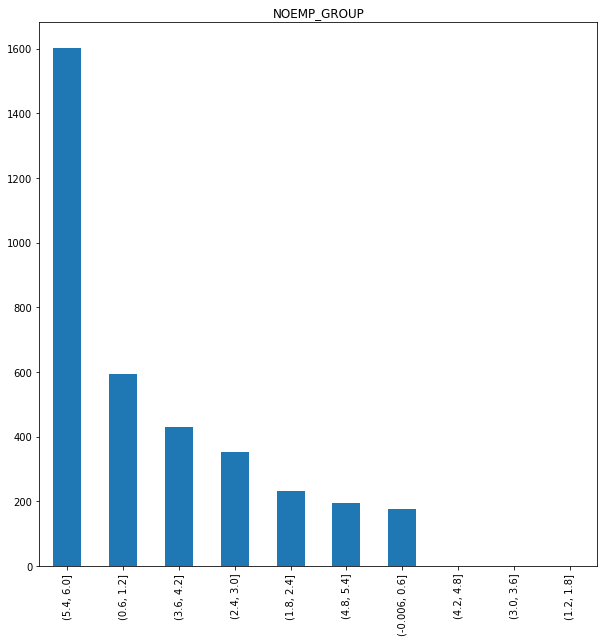

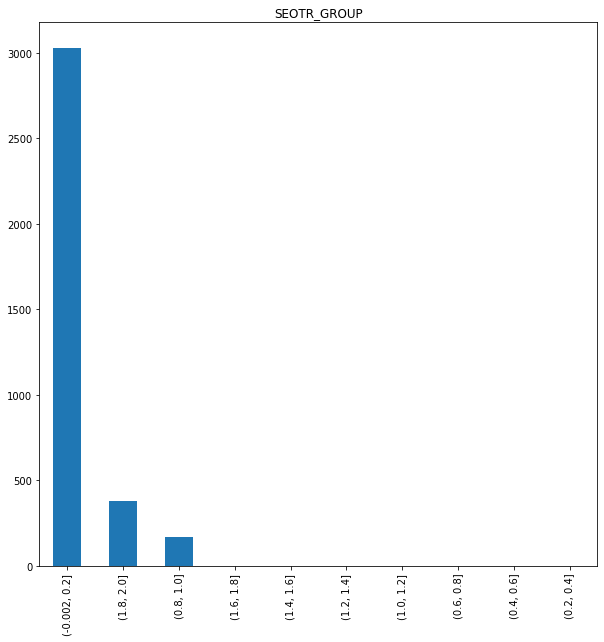

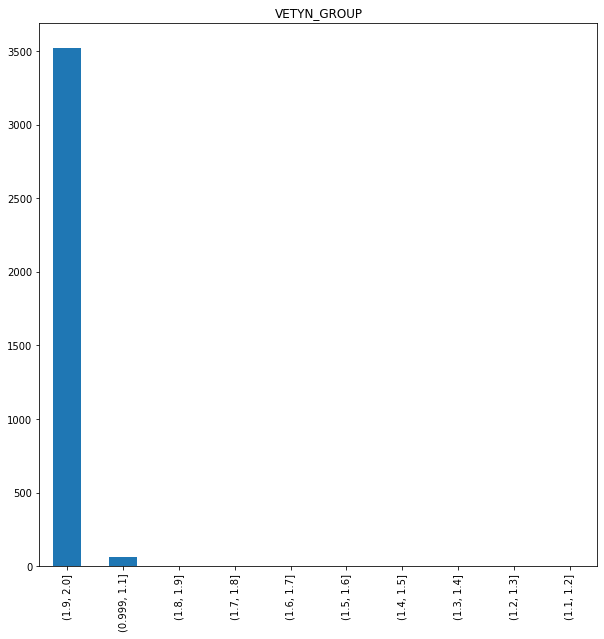

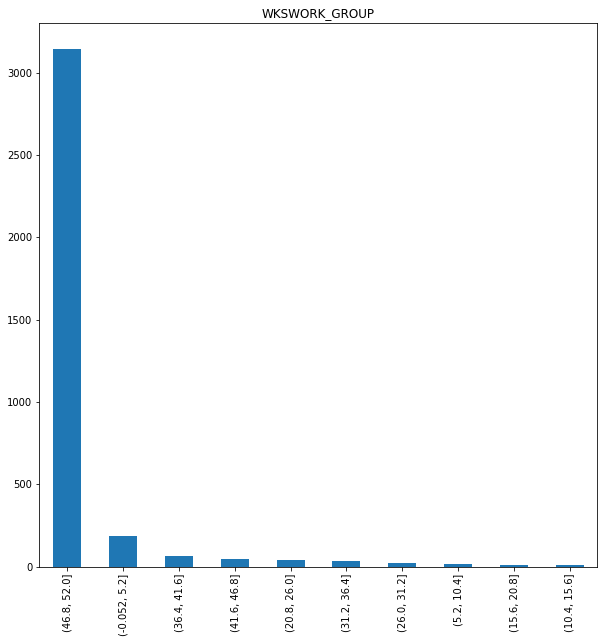

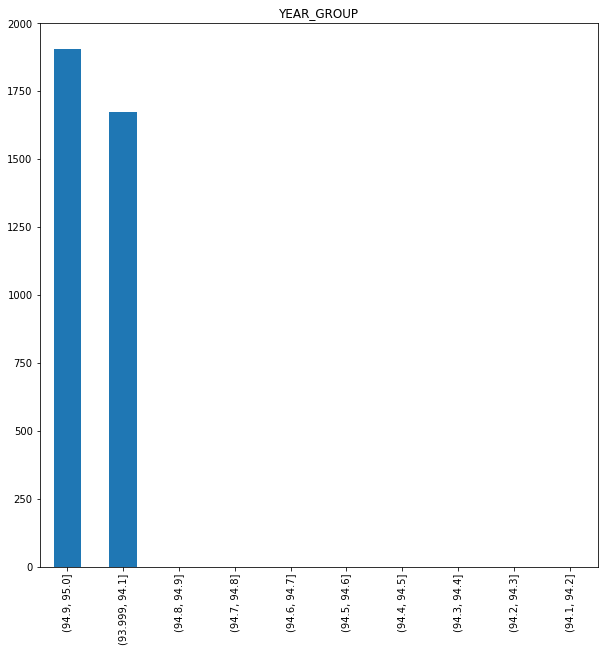

In [176]:
tmp_cols = []
for i in list(df):
  if type(df.iloc[0][i]) == type("abcd") or "_GROUP" in i:
    tmp_cols.append(i)

for val in tmp_cols:
  fig = plt.figure(figsize = (10,10))
  df[val].value_counts().plot(kind='bar', title = val)
print(tmp_cols)

In [177]:
columns_to_drop = ['AUNTYPE', 'GRINST', 'GRINREG','PENATVTY', 'PEFNTVTY','PEMNTVTY', 'VETQVA', 'AHSCOL', 'AHRSPAY_GROUP','AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'CAPGAIN_GROUP', 'CAPLOSS_GROUP', 'DIVVAL_GROUP', 'AAGE', 'ADTIND','ADTOCC', 'NOEMP', 'SEOTR','VETYN','WKSWORK','YEAR']
columns_to_keep = []
for val in list(df.columns):
  if val in columns_to_drop:
    continue
  else:
    columns_to_keep.append(val)

print(columns_to_keep)
df = df[columns_to_keep]

['ACLSWKR', 'AHGA', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT', 'PRCITSHP', 'AAGE_GROUP', 'ADTIND_GROUP', 'ADTOCC_GROUP', 'NOEMP_GROUP', 'SEOTR_GROUP', 'VETYN_GROUP', 'WKSWORK_GROUP', 'YEAR_GROUP']


In [178]:
for val in list(df.columns):
  df[val].fillna(df[val].mode()[0],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/pand

In [179]:
df = pd.get_dummies(df)
df.head()

ACLSWKR_ Federal government  ...  YEAR_GROUP_(94.9, 95.0]
0                            0  ...                        1
1                            0  ...                        0
2                            0  ...                        0
3                            0  ...                        1
4                            0  ...                        1

[5 rows x 209 columns]

In [180]:
pca_vals = []
for var in [0.99, 0.95, 0.9, 0.75, 0.5, 0.45, 0.4, 0.35, 0.25, 0.1]:
  pca = PCA(var)
  pca.fit(df)
  pca_vals.append(pca.n_components_)

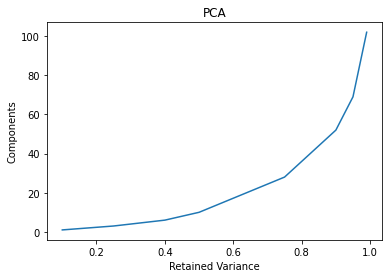

In [181]:
x_vals = [0.99, 0.95, 0.9, 0.75, 0.5, 0.45, 0.4, 0.35, 0.25, 0.1]
plt.xlabel("Retained Variance")
plt.ylabel("Components")
plt.title("PCA")
plt.plot(x_vals,pca_vals)
plt.show()

In [182]:
pca = PCA(0.75)
pca.fit(df)
finalDf = pca.transform(df)

In [183]:
finalDf.shape

(3580, 28)

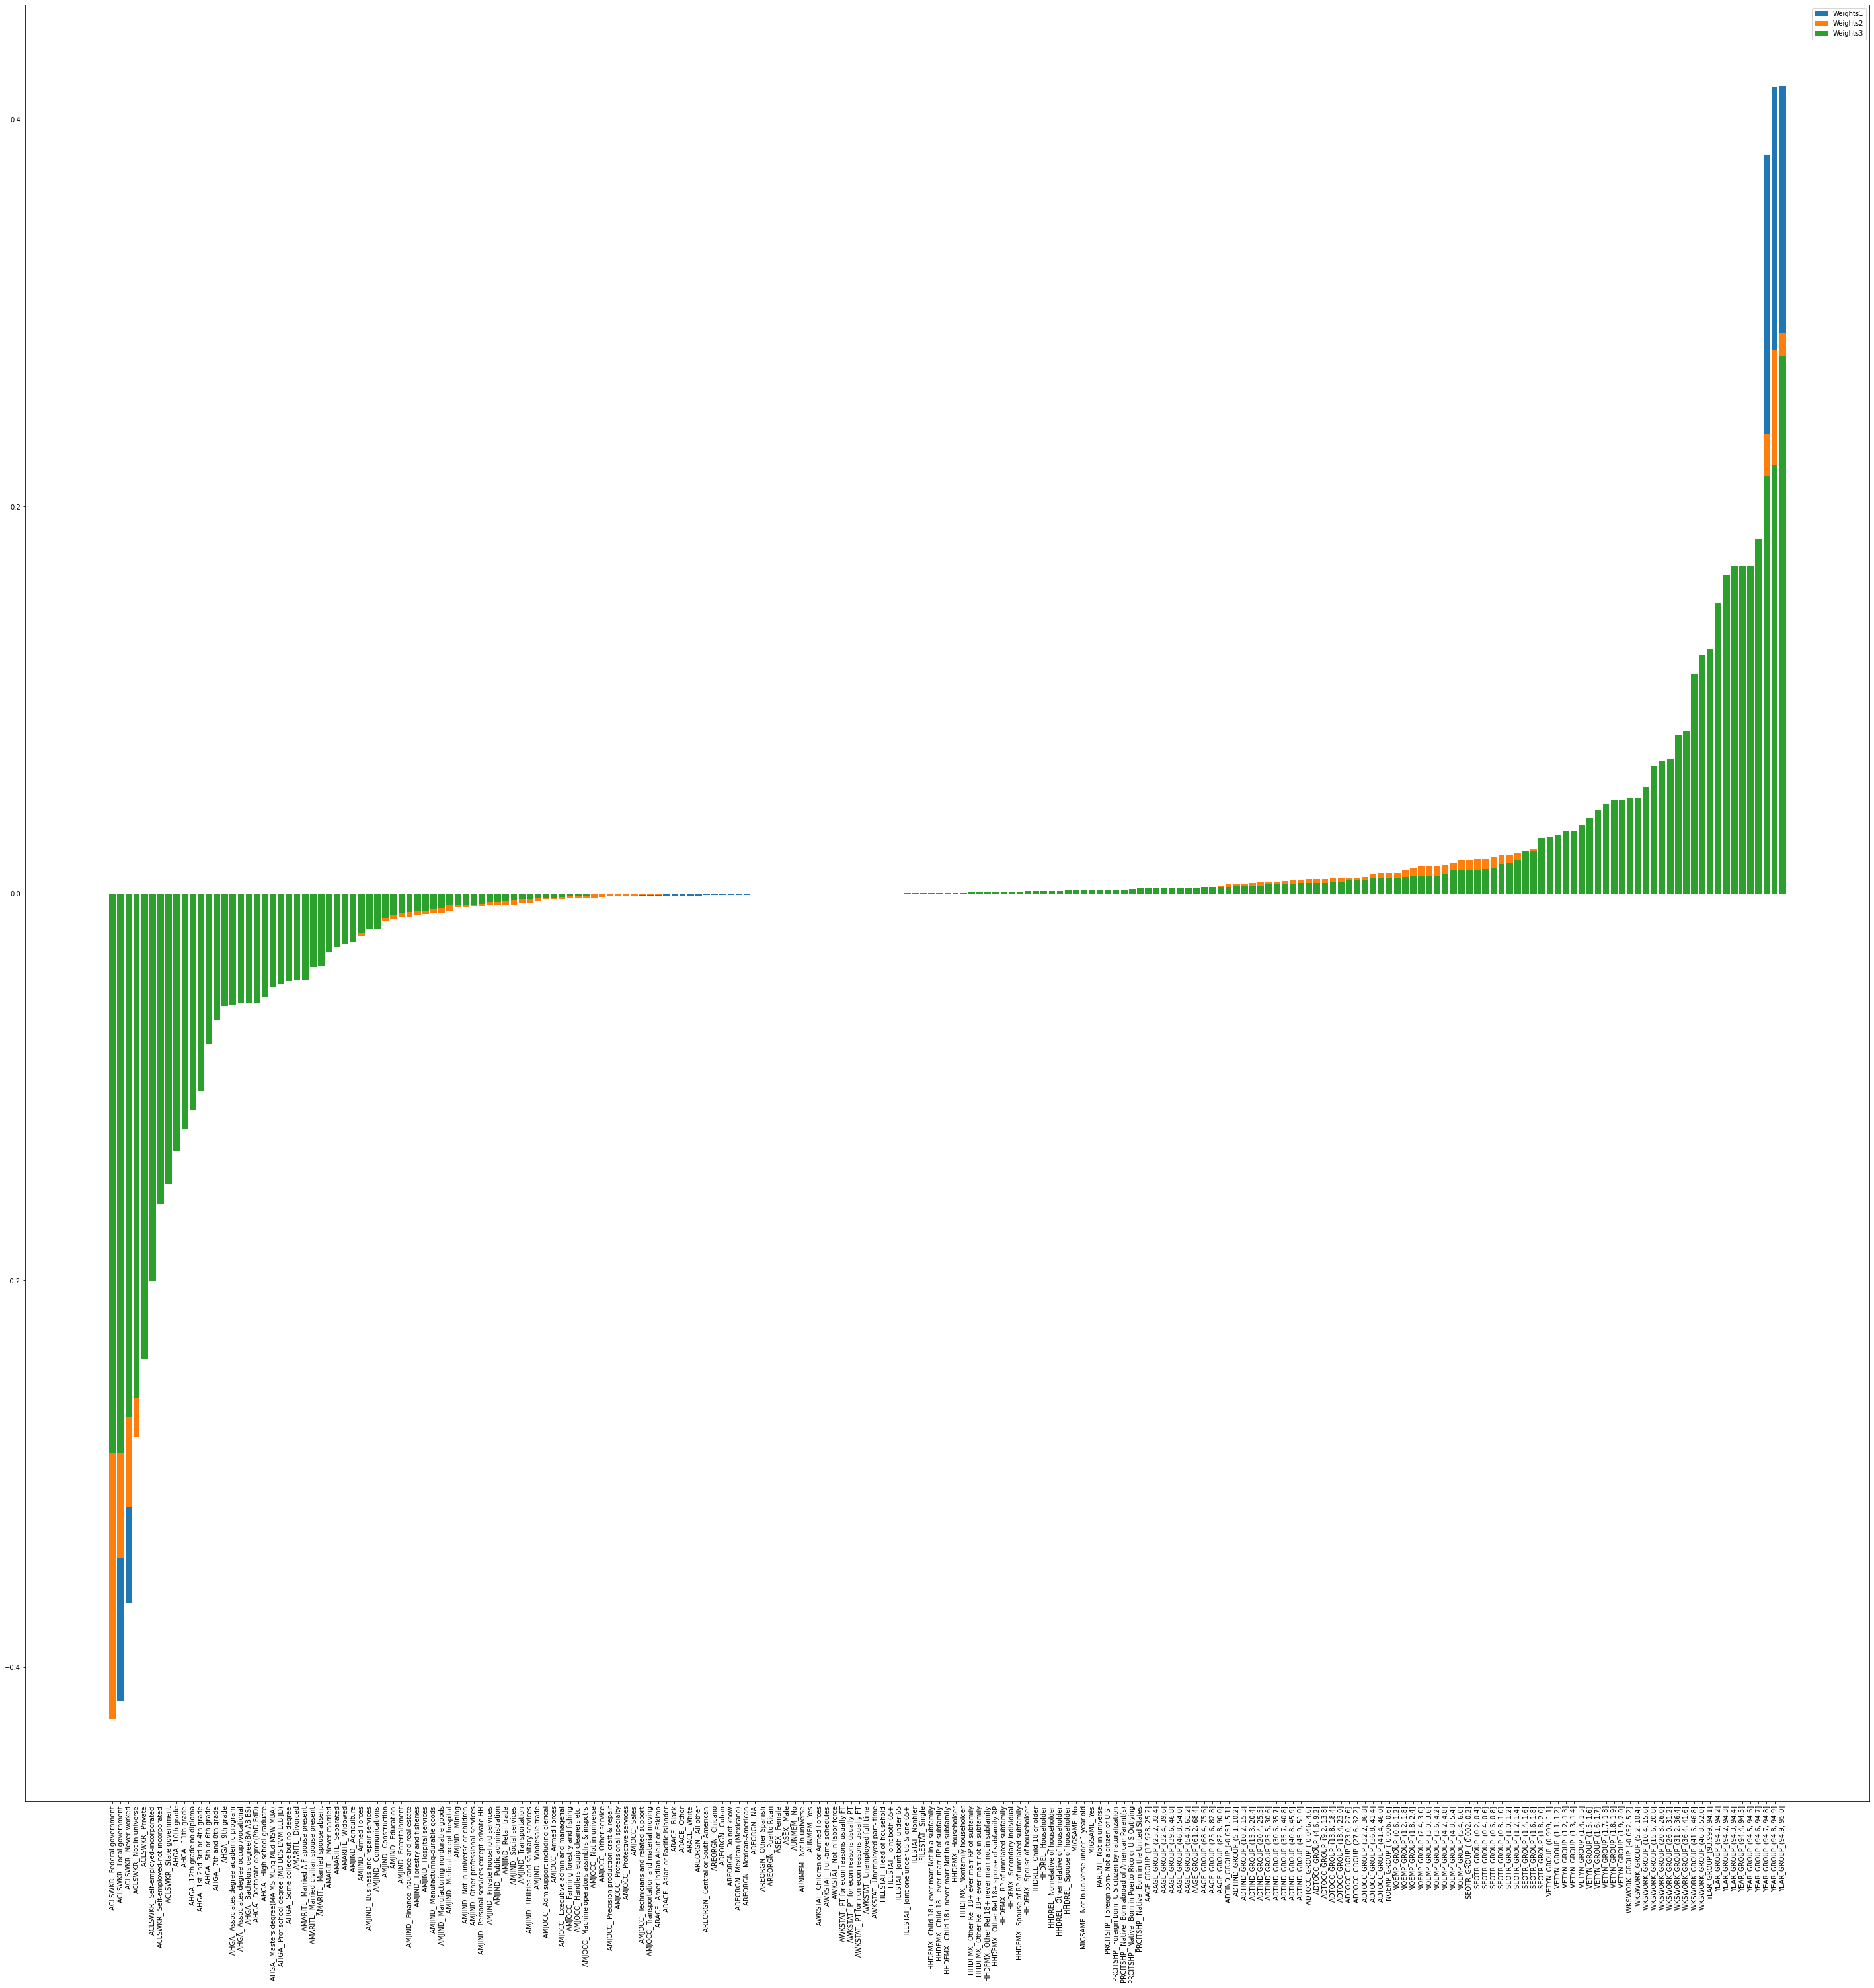

In [184]:
colnames = list(df)
fig = plt.figure(figsize = (50,50))
for val in pca.components_:
  val.sort()
plt.bar(colnames, pca.components_[0], label="Weights1");
plt.bar(colnames, pca.components_[1], label="Weights2");
plt.bar(colnames, pca.components_[2], label="Weights3");
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

In [185]:
avg_dist = []
num_clusters = [n for n in range(10,25)]
for k in range(10,25):
  print(k)
  k_med = kmedians(finalDf, (finalDf[random.sample(range(0,finalDf.shape[0]),k)]))
  k_med.process()
  avg_dist.append(k_med.get_total_wce()/k)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


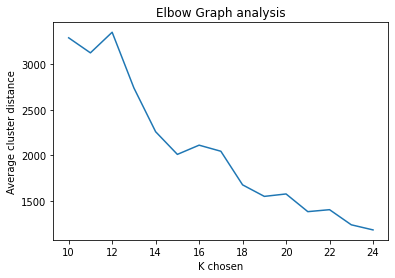

In [186]:
plt.plot(num_clusters, avg_dist)
plt.xlabel('K chosen')
plt.ylabel('Average cluster distance')
plt.title('Elbow Graph analysis')
plt.show()

In [187]:
rand_index = random.sample(range(0,finalDf.shape[0]),18)
initial_medians = finalDf[rand_index]
k_med_instance = kmedians(finalDf, initial_medians)
k_med_instance.process()

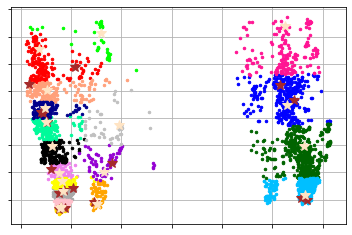

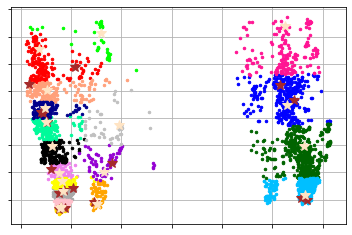

In [188]:
from pyclustering.cluster import cluster_visualizer_multidim

pca = PCA(n_components = 2)
pca.fit(finalDf)
temp_dataset = pca.transform(finalDf)

random_index = random.sample(range(0,temp_dataset.shape[0]),18)
initial_medians = temp_dataset[random_index]
temp_k_median = kmedians(temp_dataset, initial_medians)
temp_k_median.process()

clusters = temp_k_median.get_clusters()
medians = temp_k_median.get_medians()
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, temp_dataset)
visualizer.append_cluster(initial_medians, marker='*', markersize=10)
visualizer.append_cluster(medians, marker='*', markersize=10)
visualizer.show()

In [189]:
pca = PCA(0.75)
finalDfTmp = pca.fit(df).transform(df)
tmpCluster = kmedians(finalDfTmp, (finalDfTmp[random.sample(range(0,finalDfTmp.shape[0]),16)]))
tmpCluster.process()
print(len(tmpCluster.get_clusters()))

16


In [190]:
clusterLst = tmpCluster.get_clusters()
clusterLens = []
totalLength = 0
for val in clusterLst:
  clusterLens.append(len(val))
  totalLength += len(val)

i = 1
totalPerc = 0
clusterPercent = []
for val in clusterLens:
  print("CLUSTER-"+str(i)+": "+str((val/totalLength)*100)+"%")
  clusterPercent.append((val/totalLength)*100)
  totalPerc +=  ((val/totalLength)*100)
  i += 1

print("TOTAL %: "+str(totalPerc)+"%")

CLUSTER-1: 7.932960893854749%
CLUSTER-2: 1.6480446927374302%
CLUSTER-3: 20.391061452513966%
CLUSTER-4: 2.541899441340782%
CLUSTER-5: 13.687150837988826%
CLUSTER-6: 4.860335195530726%
CLUSTER-7: 7.681564245810056%
CLUSTER-8: 5.53072625698324%
CLUSTER-9: 4.4692737430167595%
CLUSTER-10: 3.212290502793296%
CLUSTER-11: 4.329608938547486%
CLUSTER-12: 6.368715083798883%
CLUSTER-13: 3.0446927374301676%
CLUSTER-14: 9.636871508379889%
CLUSTER-15: 0.9217877094972068%
CLUSTER-16: 3.7430167597765367%
TOTAL %: 99.99999999999999%


In [191]:
print("Maximum Value of percentage from all clusters is: "+str(max(clusterPercent))+"% "+" from cluster: "+str(clusterPercent.index(max(clusterPercent))+1))

Maximum Value of percentage from all clusters is: 20.391061452513966%  from cluster: 3


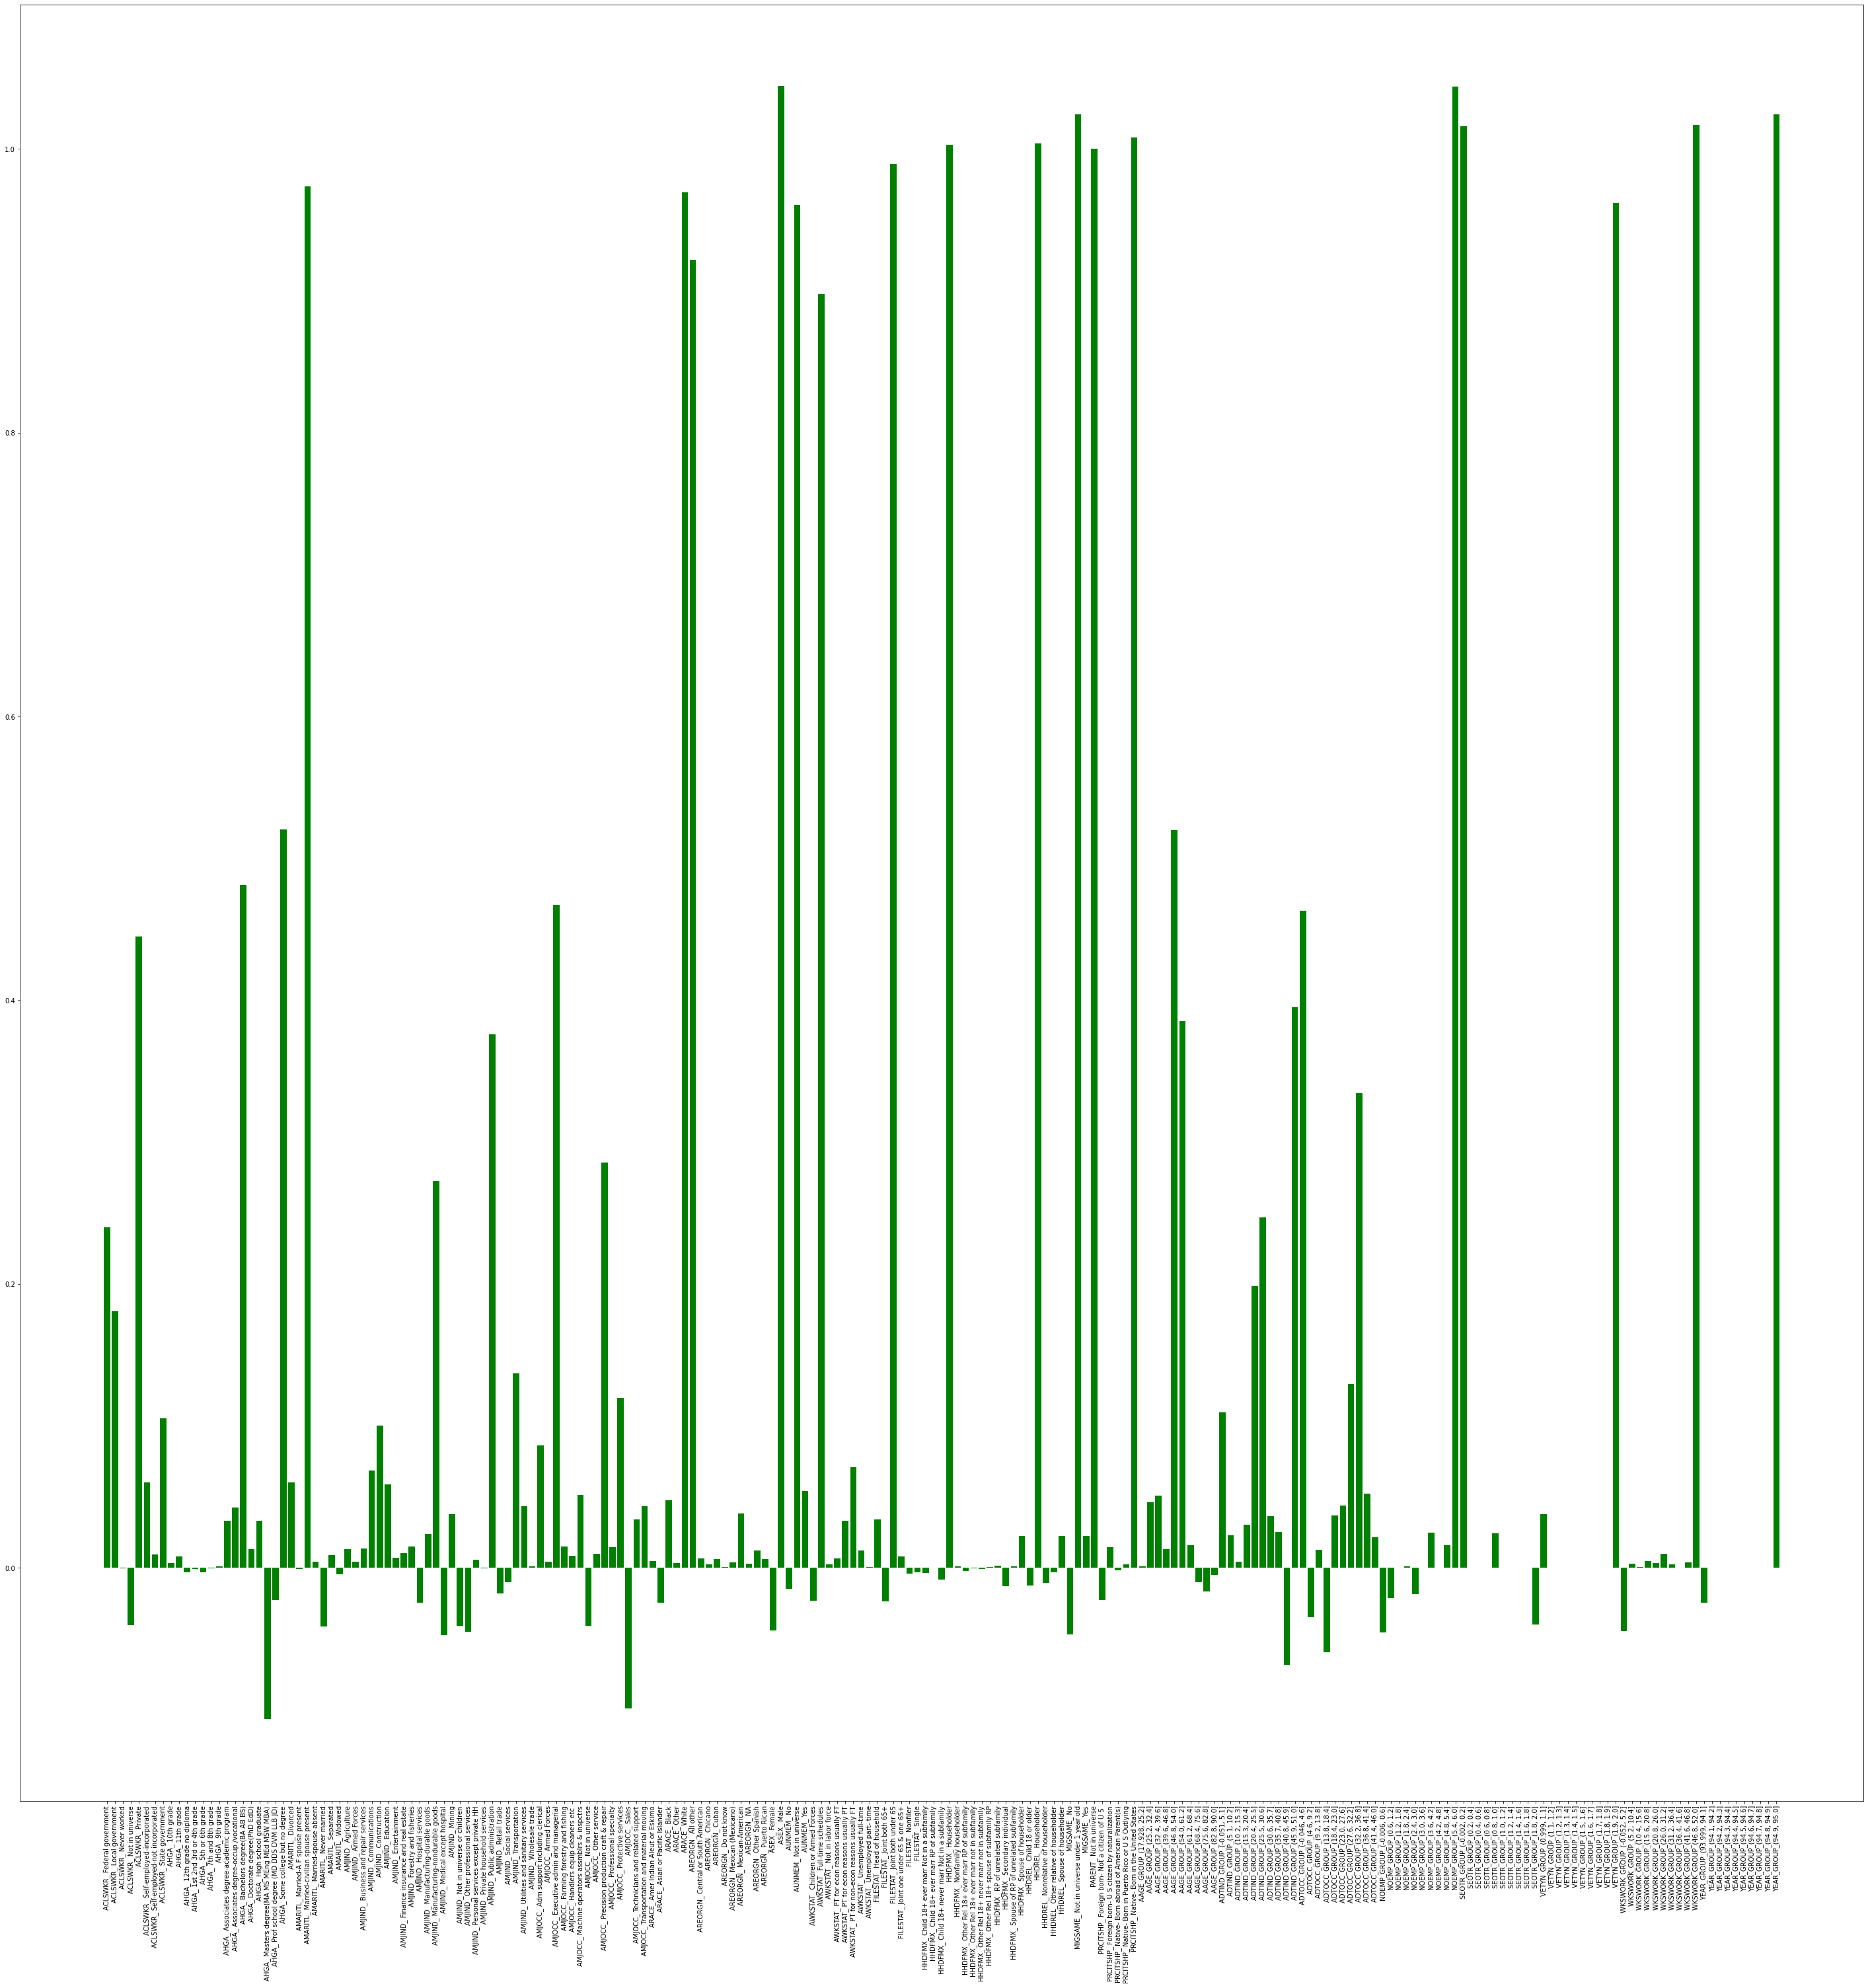

In [192]:
inversePCA = pca.inverse_transform(tmpCluster.get_medians()[clusterPercent.index(max(clusterPercent))])
plt.figure(figsize = (50,50))
plt.bar(df.columns, inversePCA,color = 'green')
plt.xticks(df.columns, df.columns, rotation=90)
plt.show()